# Imports and Installs

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# measure time for ML HyperParams search
import time
from datetime import date

# ML models and utils
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# 0) One DataFrame with Dummies
* including newly defined "month-week_of_month"

## 0.1) Read and truncate data (last 25 years from 2000), define variable sets


In [9]:
?wbdata.get_dataframe

Signature:
wbdata.get_dataframe(
    indicators: Dict[str, str],
    country: Union[str, Sequence[str]] = 'all',
    date: Union[str, datetime.datetime, Tuple[Union[str, datetime.datetime], Union[str, datetime.datetime]], NoneType] = None,
    freq: str = 'Y',
    source: Union[int, str, Sequence[Union[int, str]], NoneType] = None,
    parse_dates: bool = False,
    keep_levels: bool = False,
    skip_cache: bool = False,
) -> wbdata.client.DataFrame
Docstring:
Download a set of indicators and  merge them into a pandas DataFrame.

If pandas is not installed, a RuntimeError will be raised.

Parameters:
    indicators: An dictionary where the keys are desired indicators and the
        values are the desired column names country: a country code,
        sequence of country codes, or "all" (default)
    date: the desired date as a string, datetime object or a 2-tuple
        with start and end dates
    freq: the desired periodicity of the data, one of 'Y' (yearly), 'M'
        (monthly),

In [29]:
import wbdata
import pandas as pd
from datetime import datetime

# Set the date range
data_date = datetime(2000, 1, 1), datetime(2025, 1, 1)

# Define the indicators you want to fetch
indicators = {
    # 'SP.POP.TOTL': 'Total Population',
    'SP.POP.GROW': 'Population Growth (annual %)',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate',
    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'FP.CPI.TOTL.ZG': 'Inflation, Consumer Prices (annual %)',
    'NE.EXP.GNFS.ZS': 'Exports of Goods and Services (% of GDP)',
    # 'EG.ELC.ACCS.ZS': 'Access to Electricity (% of population)',
    'IT.NET.USER.ZS': 'Internet Users (per 100 people)',
    # 'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    # 'SE.XPD.TOTL.GD.ZS': 'Government Expenditure on Education (% of GDP)'
}

# Define the countries you want to fetch data for
countries = ['IN', 'US', 'CN', 'JP', 'GB',]# 'AU']

# Fetch the data for the specified countries and indicators
data = wbdata.get_dataframe(indicators, country=countries, date=data_date)

# Print the retrieved data
data.head()

Population Growth (annual %)  Unemployment Rate  \
country date                                                    
China   2023                     -0.103795               4.67   
        2022                     -0.013100               4.98   
        2021                      0.089252               4.55   
        2020                      0.238041               5.00   
        2019                      0.354741               4.56   

              GDP (current US$)  Inflation, Consumer Prices (annual %)  \
country date                                                             
China   2023       1.779478e+13                               0.234837   
        2022       1.788178e+13                               1.973576   
        2021       1.782046e+13                               0.981015   
        2020       1.468774e+13                               2.419422   
        2019       1.427997e+13                               2.899234   

              Exports of Goods and Services (% of GDP)  \
country date                                             
China   2023                                 19.743073   
        2022                                 20.791482   
        2021                                 19.943974   
        2020                                 18.586139   
        2019                                 18.409992   

              Internet Users (per 100 people)  
country date                                   
China   2023                              NaN  
        2022                        75.611316  
        2021                        73.053241  
        2020                        70.052760  
        2019                        64.080881

In [31]:
data.reset_index().date.value_counts()

date
2023    5
2022    5
2001    5
2002    5
2003    5
2004    5
2005    5
2006    5
2007    5
2008    5
2009    5
2010    5
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
2021    5
2000    5
Name: count, dtype: int64

In [48]:
import yfinance as yf
import pandas as pd

# Define the commodity tickers on Yahoo Finance
commodity_tickers = {
    'Crude Oil': 'CL=F',
    'Gold': 'GC=F',
    'Natural Gas': 'NG=F',
    'Coal': 'QCLN',
    'Copper': 'HG=F',
    'Aluminum': 'ALI=F',
}

# Set the start and end dates for fetching the data
start_date = '2023-01-01'
end_date = '2024-01-01'

# Initialize a dictionary to store the dataframes
data_frames = {}

# Fetch data for each commodity
for name, ticker in commodity_tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    data_frames[name] = data['Close']

# Combine all dataframes into a single dataframe
combined_data = pd.DataFrame(data_frames)

# Print the combined data
print (combined_data.shape)
combined_data.head()

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(251, 6)


,Crude Oil,Gold,Natural Gas,Coal,Copper,Aluminum
Date,,,,,,
2023-01-03,76.930000,1839.699951,3.988,45.840000,3.7660,2325.25
2023-01-04,72.839996,1852.800049,4.172,46.919998,3.7395,2270.00
2023-01-05,73.669998,1834.800049,3.720,45.549999,3.8180,2262.75
2023-01-06,73.769997,1864.199951,3.710,46.610001,3.9085,2285.25
2023-01-09,74.629997,1872.699951,3.910,47.720001,4.0185,2443.25


In [ ]:
forex_tickers = {
    'USD/INR': 'USDINR=X',
    'GBP/INR': 'GBPINR=X',
    'EUR/INR': 'EURINR=X',
    'JPY/INR': 'JPYINR=X',
    'AUD/INR': 'AUDINR=X'
}
crypto_tickers = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Ripple': 'XRP-USD',
    'Litecoin': 'LTC-USD',
    'Bitcoin Cash': 'BCH-USD'
}

In [49]:
import yfinance as yf
import pandas as pd

# Define the cryptocurrency tickers on Yahoo Finance
crypto_tickers = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Ripple': 'XRP-USD',
    'Litecoin': 'LTC-USD',
    'Bitcoin Cash': 'BCH-USD'
}

# Set the start and end dates for fetching the data
start_date = '2023-01-01'
end_date = '2024-01-01'

# Initialize a dictionary to store the dataframes
data_frames = {}

# Fetch data for each cryptocurrency
for name, ticker in crypto_tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    data_frames[name] = data['Close']

# Combine all dataframes into a single dataframe
combined_data = pd.DataFrame(data_frames)

# Print the combined data
print (combined_data.shape)
combined_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(365, 5)


,Bitcoin,Ethereum,Ripple,Litecoin,Bitcoin Cash
Date,,,,,
2023-01-01,16625.080078,1200.964844,0.338763,70.815659,96.955070
2023-01-02,16688.470703,1214.656616,0.348556,74.862907,99.310051
2023-01-03,16679.857422,1214.778809,0.343824,75.602722,99.649353
2023-01-04,16863.238281,1256.526611,0.347794,75.433907,101.482735
2023-01-05,16836.736328,1250.438599,0.338039,74.250809,101.084549


In [61]:
import yfinance as yf
import pandas as pd

# Define the forex tickers
forex_tickers = {
    'USD/INR': 'USDINR=X',
    'GBP/INR': 'GBPINR=X',
    'EUR/INR': 'EURINR=X',
    'JPY/INR': 'JPYINR=X',
    'AUD/INR': 'AUDINR=X'
}

# Set the start and end dates for fetching the data
start_date = '2023-01-01'
end_date = '2024-01-01'

# Initialize a dictionary to store the dataframes
data_frames = {}

# Fetch data for each forex pair
for name, ticker in forex_tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    data_frames[name] = data['Close']

# Combine all dataframes into a single dataframe
combined_data = pd.DataFrame(data_frames)

# Print the combined data
print(combined_data.shape)
combined_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CNYINR=X']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-01-01)')


$CNYINR=X: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-01-01)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(260, 6)


,USD/INR,GBP/INR,EUR/INR,CNY/INR,JPY/INR,AUD/INR
Date,,,,,,
2023-01-02 00:00:00,82.749802,100.098244,88.482002,NaN,0.630583,56.353672
2023-01-03 00:00:00,82.706001,99.730774,88.300003,NaN,0.632252,56.279499
2023-01-04 00:00:00,82.785698,99.083443,87.219002,NaN,0.630018,55.619396
2023-01-05 00:00:00,82.666496,99.680939,87.605003,NaN,0.624514,56.398914
2023-01-06 00:00:00,82.645203,98.436172,86.827003,NaN,0.618926,55.750359


In [96]:
# import requests
# from bs4 import BeautifulSoup


# url = "https://tradingeconomics.com/india/indicators"
# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
# }

# response = requests.get(url, headers=headers)


# # Check if the request was successful (status code 200)
# if response.status_code == 200:
#     # Parse the HTML content of the webpage
#     soup = BeautifulSoup(response.content, "html.parser")

#     # You need to be able to find this table tag and read all behind it
#     # Find the div with class "table-responsive"
#     table_div = soup.find("div", class_="table-responsive")

#     # Extract the table within the div
#     table = table_div.find("table")

#     # Use pandas to read the table into a DataFrame
#     df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

#     # Display the DataFrame
#     print(df)
# else:
#     print("Failed to retrieve data from the webpage.")

In [84]:
import yfinance as yf
import pandas as pd

def fetch_historical_events(ticker):
    # Fetch the stock data
    stock = yf.Ticker(ticker)
    
    # Get earnings dates
    earnings_dates = stock.earnings_dates
    # print (earnings_dates.columns)

    # Get dividends
    dividends = stock.dividends
    
    # Get stock splits
    splits = stock.splits

    # Combine all events into a single DataFrame
    events = pd.DataFrame()
    

    
    if not dividends.empty:
        dividends = dividends.reset_index()
        dividends['Event'] = 'Dividends'
        events = pd.concat([events, dividends.rename(columns={'Dividends': 'Value'})])
    
    if not splits.empty:
        splits = splits.reset_index()
        splits['Event'] = 'Stock Splits'
        events = pd.concat([events, splits.rename(columns={'Stock Splits': 'Value'})])

    # if not earnings_dates.empty:
    #     earnings_dates = earnings_dates.reset_index()
    #     earnings_dates['Event'] = 'Earnings'
    #     events = pd.concat([events.set_index('Date'), earnings_dates.set_index('Earnings Date')])
    
    # Sort events by date
    events = events.sort_values(by='Date')#.reset_index(drop=True)
    
    return events

# Example usage
ticker = 'AAPL'
events = fetch_historical_events(ticker)
print(events.shape)
events.head()

Index(['EPS Estimate', 'Reported EPS', 'Surprise(%)'], dtype='object')
(88, 3)


,Date,Value,Event
0,1987-05-11 00:00:00-04:00,0.000536,Dividends
0,1987-06-16 00:00:00-04:00,2.000000,Stock Splits
1,1987-08-10 00:00:00-04:00,0.000536,Dividends
2,1987-11-17 00:00:00-05:00,0.000714,Dividends
3,1988-02-12 00:00:00-05:00,0.000714,Dividends


In [97]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

global_stocks = pd.read_csv("global_stocks.csv")
print (global_stocks.shape)

CSV file downloaded successfully.
(8714, 6)


In [182]:
dfFltr1 = global_stocks[(global_stocks.country=="India")&
                        ((global_stocks.marketcap > 121000000)&(global_stocks.marketcap < 610000000))&
                        (global_stocks['price (USD)'] > (0/82))]
dfFltr1.Symbol.unique().tolist()

['KSCL.NS',
 'VRLLOG.NS',
 'GTLINFRA.NS',
 'AARTIDRUGS.NS',
 'LUXIND.NS',
 'JISLDVREQS.NS',
 'WSTCSTPAPR.NS',
 'SUBROS.NS',
 'PFOCUS.NS',
 'TINPLATE.NS',
 'HIKAL.NS',
 'KKCL.NS',
 'KSL.NS',
 'HGS.NS',
 'IMAGICAA.NS',
 'HONDAPOWER.NS',
 'HATHWAY.NS',
 'ASHIANA.NS',
 'SKIPPER.NS',
 'GREENPLY.NS',
 'TIDEWATER.NS',
 'IMFA.NS',
 'GREENPANEL.NS',
 'DELTACORP.NS',
 'NUCLEUS.NS',
 'MAHLOG.NS',
 'TATASTLLP.NS',
 'CIGNITITEC.NS',
 'PRAKASH.NS',
 'MPSLTD.NS',
 'VSTTILLERS.NS',
 'ANUP.NS',
 'GEPIL.NS',
 'REPCOHOME.NS',
 'POLYPLEX.NS',
 'AVALON.NS',
 'JINDALPOLY.NS',
 'ALEMBICLTD.NS',
 'KCP.NS',
 'TCNSBRANDS.NS',
 'PFS.NS',
 'CARERATING.NS',
 'SANDHAR.NS',
 'SOMANYCERA.NS',
 'SEQUENT.NS',
 'SPICEJET.BO',
 'AUTOAXLES.NS',
 'INDOCO.NS',
 'WENDT.NS',
 'SHALBY.NS',
 'MMFL.NS',
 'VADILALIND.NS',
 'KINGFA.NS',
 'DOLLAR.NS',
 'UNITECH.NS',
 'SMLISUZU.NS',
 'HUHTAMAKI.NS',
 'NILKAMAL.NS',
 'DISHTV.NS',
 'HINDOILEXP.NS',
 'INDIAGLYCO.NS',
 'ASTEC.NS',
 'SASKEN.NS',
 'QUICKHEAL.NS',
 'LUMAXIND.NS',
 'CONFIPE

In [288]:
dftmp = pd.read_excel("MCAP28032024.xlsx")
dftmp = dftmp[(dftmp['Market capitalization as on March 28, 2024\n(In lakhs)'] != '*Not available for trading as on March 28, 2024')]
dftmp = dftmp[(dftmp['Market capitalization as on March 28, 2024\n(In lakhs)'] <= 2500000)&
              (dftmp['Market capitalization as on March 28, 2024\n(In lakhs)'] >= 5000)]
dftmp.Symbol = dftmp.Symbol + ".NS"
print (dftmp.shape)
dftmp.head()
dftmp.Symbol.unique().tolist()

(1835, 4)


['MOTILALOFS.NS',
 'ITI.NS',
 '360ONE.NS',
 'CARBORUNIV.NS',
 'AARTIIND.NS',
 'SUNTV.NS',
 'KIOCL.NS',
 'ISEC.NS',
 'RADICO.NS',
 'SUNDRMFAST.NS',
 'CREDITACC.NS',
 'COCHINSHIP.NS',
 'HATSUN.NS',
 'MANYAVAR.NS',
 'CYIENT.NS',
 'GET&D.NS',
 'BRIGADE.NS',
 'TIMKEN.NS',
 'NBCC.NS',
 'JBMA.NS',
 'GILLETTE.NS',
 'KANSAINER.NS',
 'LAURUSLABS.NS',
 'GRINDWELL.NS',
 'FIVESTAR.NS',
 'SWANENERGY.NS',
 'CHOLAHLDNG.NS',
 'IRCON.NS',
 'SKFINDIA.NS',
 'BSOFT.NS',
 'ASTERDM.NS',
 'RELAXO.NS',
 'SONATSOFTW.NS',
 'GSPL.NS',
 'RATNAMANI.NS',
 'ABFRL.NS',
 'APLLTD.NS',
 'PFIZER.NS',
 'RAMCOCEM.NS',
 'SIGNATURE.NS',
 'PEL.NS',
 'ELGIEQUIP.NS',
 'LALPATHLAB.NS',
 'EMAMILTD.NS',
 'SANOFI.NS',
 'JYOTICNC.NS',
 'TRIDENT.NS',
 'CASTROLIND.NS',
 'KAJARIACER.NS',
 'KAYNES.NS',
 'CENTURYTEX.NS',
 'CHALET.NS',
 'DEVYANI.NS',
 'CDSL.NS',
 'KEC.NS',
 'SCHNEIDER.NS',
 'IDFC.NS',
 'BATAINDIA.NS',
 'CIEINDIA.NS',
 'KPIL.NS',
 'RRKABEL.NS',
 'SUMICHEM.NS',
 'NATCOPHARM.NS',
 'SUVENPHAR.NS',
 'CROMPTON.NS',
 'TRITURBINE.

In [289]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the stock tickers you want to screen
# tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']  # Add more tickers as needed
tickers = dftmp.Symbol.unique().tolist() #dfFltr1.Symbol.unique().tolist()

# Initialize an empty list to store the data
screener_data = []

# Function to calculate the required metrics for each ticker
def get_fundamental_data(ticker):
    try:
        stock = yf.Ticker(ticker)

        # Fetch financial data
        
        try:
            info = pd.DataFrame(stock.info).T
        except:
            info = pd.DataFrame([stock.info]).T
        financials = stock.financials
        # balance_sheet = stock.balance_sheet
        cashflow = stock.cashflow

        # Calculate metrics
        try:
            promoter_holding = float(info.loc['heldPercentInsiders'][0] + info.loc['heldPercentInstitutions'][0])
        except:
            promoter_holding = np.nan
        try:
            revenue_growth = float(info.loc['revenueGrowth'][0])
        except:
            revenue_growth = np.nan
        try:
            earnings_growth = float(financials.loc['Net Income'].pct_change(periods=-1, fill_method=None).iloc[0])
        except:
            earnings_growth = np.nan
        try:
            op_profit_margin = float(info.loc['operatingMargins'][0])
        except:
            op_profit_margin = np.nan
        try:
            roe = float(info.loc['returnOnEquity'][0])
        except:
            roe = np.nan
        try:
            roa = float(info.loc['returnOnAssets'][0])
        except:
            roa = np.nan
        try:
            debt_to_equity = float(info.loc['debtToEquity'][0])
        except:
            debt_to_equity = np.nan
        try:
            pe_ratio = float(info.loc['trailingPE'][0])
        except:
            pe_ratio = np.nan
        try:
            pb_ratio = float(info.loc['priceToBook'][0])
        except:
            pb_ratio = np.nan
        try:
            opCashFlow = float(cashflow.loc['Operating Cash Flow'].pct_change(periods=-1, fill_method=None).iloc[0])
        except:
            opCashFlow = np.nan

        # Append data to the list
        screener_data.append({
            'Ticker': ticker,
            'Promoter holding percent': promoter_holding,
            'Revenue Growth': revenue_growth,
            'Earnings Growth': earnings_growth,
            'Operating Profit Margin': op_profit_margin,
            'ROE': roe,
            'ROA': roa,
            'Debt to Equity': debt_to_equity,
            'P/E': pe_ratio,
            'P/B': pb_ratio,
            'Operating Cash Flow Change': opCashFlow
        })
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")

# Fetch data for each ticker
for ticker in tickers:
    get_fundamental_data(ticker)

# Convert the list to a DataFrame
screener_df = pd.DataFrame(screener_data)

# Print the screener data
# print(screener_df)
print (screener_df.shape)
screener_df.head()


(1835, 11)


,Ticker,Promoter holding percent,Revenue Growth,Earnings Growth,Operating Profit Margin,ROE,ROA,Debt to Equity,P/E,P/B,Operating Cash Flow Change
0,MOTILALOFS.NS,0.84405,1.060,1.620035,0.49903,0.32496,0.08919,156.757,13.262217,3.649172,-0.885860
1,ITI.NS,0.97992,-0.224,0.580992,-0.31265,-0.27361,-0.02437,100.656,NaN,16.456923,-4.317532
2,360ONE.NS,0.82791,0.960,0.222334,0.50433,0.24458,0.07848,274.570,45.661232,10.487882,-0.644532
3,CARBORUNIV.NS,0.81052,0.001,0.114157,0.13003,0.15327,0.08448,5.265,69.931076,10.190337,0.398308
4,AARTIIND.NS,0.68748,0.071,-0.236697,0.10434,0.08147,0.04108,61.274,61.348510,4.802709,-0.087187


In [290]:
screener_df.dtypes

Ticker                         object
Promoter holding percent      float64
Revenue Growth                float64
Earnings Growth               float64
Operating Profit Margin       float64
ROE                           float64
ROA                           float64
Debt to Equity                float64
P/E                           float64
P/B                           float64
Operating Cash Flow Change    float64
dtype: object

In [299]:

# Apply any filtering criteria as needed, for example:
filtered_df = screener_df[
    ((screener_df['Promoter holding percent'] > 0.50)|(screener_df['Promoter holding percent'].isna())) &
    ((screener_df['Revenue Growth'] > 0)|(screener_df['Revenue Growth'].isna())) &
    ((screener_df['Earnings Growth'] > 0.1)|(screener_df['Earnings Growth'].isna())) &
    ((screener_df['Operating Profit Margin'] > 0.1)|(screener_df['Operating Profit Margin'].isna())) &
    ((screener_df['ROE'] > 0.10)|(screener_df['ROE'].isna())) &
    # ((screener_df['ROA'] > 0.10)|(screener_df['ROA'].isna())) &
    ((screener_df['Debt to Equity'] < 1.5)|(screener_df['Debt to Equity'].isna())) &
    # ((screener_df['P/E'] < 60)|(screener_df['P/E'].isna())) &
    # ((screener_df['P/B'] < 60)|(screener_df['P/B'].isna())) &
    ((screener_df['Operating Cash Flow Change'] > 0.1)|(screener_df['Operating Cash Flow Change'].isna()))
]

# Print the filtered screener data
print("Filtered Screener Data:")
print(filtered_df.set_index('Ticker').dropna(how='all').shape)
filtered_df.set_index('Ticker').dropna(how='all')

Filtered Screener Data:
(33, 10)


,Promoter holding percent,Revenue Growth,Earnings Growth,Operating Profit Margin,ROE,ROA,Debt to Equity,P/E,P/B,Operating Cash Flow Change
Ticker,,,,,,,,,,
CDSL.NS,NaN,0.960,0.518835,0.62260,0.30355,0.21505,0.090,57.140550,16.403633,0.551054
TRITURBINE.NS,0.87789,0.239,0.397839,0.18457,0.31288,0.12445,0.325,74.613100,20.756748,0.384946
ACE.NS,0.72347,0.362,0.912243,0.14712,0.30506,0.12603,0.362,53.199852,13.758227,0.580304
FINCABLES.NS,0.80293,0.144,0.292318,0.10725,0.13990,0.06410,0.365,37.595566,4.926198,0.619096
J&KBANK.NS,0.70957,0.690,0.500373,0.48841,0.16037,0.01179,NaN,6.461074,0.967311,1.094203
KARURVYSYA.NS,NaN,0.330,0.450886,0.43091,0.17234,0.01640,NaN,9.801738,1.536835,1.426911
CAPLIPOINT.NS,0.77114,0.160,0.214798,0.28425,0.21693,0.12733,0.084,25.188679,5.202597,0.173269
VOLTAMP.NS,0.82377,0.147,0.537243,0.19789,0.24980,0.14303,0.237,41.494392,9.241426,0.287756
UJJIVANSFB.NS,0.82334,0.187,0.165085,0.40302,0.26093,0.03476,NaN,6.921418,1.567451,0.493197


In [304]:
len(filtered_df.set_index('Ticker').dropna(how='all').index.tolist())


33

In [282]:
filtered_df.isna().sum()

Ticker                          0
Promoter holding percent      229
Revenue Growth                223
Earnings Growth               218
Operating Profit Margin       222
ROE                           225
ROA                           224
Debt to Equity                234
P/E                           221
P/B                           223
Operating Cash Flow Change    218
dtype: int64

In [81]:
def calcYearlyRatio(tckr, yr):
    dfTckr = yf.download(tickers = tckr,
                     period = "max",
                     interval = "1d")
    mx = dfTckr.loc[dfTckr.index.year==yr, 'Adj Close'].max()
    mn = dfTckr.loc[dfTckr.index.year==yr, 'Adj Close'].min()
    return (np.round((1 - (mn/mx)),2))

for tck in ['2222.SR','BRK-B','AAPL','MSFT','GOOG','JPM']:
    print (tck, calcYearlyRatio(tck, 2023))

,Date,Value,Event,EPS Estimate,Reported EPS,Surprise(%)
2024-05-02 16:00:00-04:00,NaT,NaN,Earnings,1.50,1.53,0.0197
2024-02-01 16:00:00-05:00,NaT,NaN,Earnings,2.10,2.18,0.0390
2023-11-02 16:00:00-04:00,NaT,NaN,Earnings,1.39,1.46,0.0492
2023-08-03 16:00:00-04:00,NaT,NaN,Earnings,1.19,1.26,0.0549
2023-05-04 16:00:00-04:00,NaT,NaN,Earnings,1.43,1.52,0.0603
2023-02-02 16:00:00-05:00,NaT,NaN,Earnings,1.94,1.88,-0.0288
2022-10-27 16:00:00-04:00,NaT,NaN,Earnings,1.27,1.29,0.0155
2022-07-28 16:00:00-04:00,NaT,NaN,Earnings,1.16,1.20,0.0325


In [3]:
# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']
# https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']
# https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

ALL_TICKERS: list[str] = US_STOCKS  + EU_STOCKS + INDIA_STOCKS



In [ ]:
def fetch(self, min_date = None):
    '''Fetch all data from APIs'''

    print('Fetching Tickers info from YFinance')
    self.fetch_tickers(min_date=min_date)
    print('Fetching Indexes info from YFinance')
    self.fetch_indexes(min_date=min_date)
    print('Fetching Macro info from FRED (Pandas_datareader)')
    self.fetch_macro(min_date=min_date)

def fetch_tickers(self, min_date=None):
    '''Fetch Tickers data from the Yfinance API'''
    if min_date is None:
      min_date = "1970-01-01"
    else:
      min_date = pd.to_datetime(min_date)   

    print(f'Going download data for this tickers: {self.ALL_TICKERS[0:3]}')
    tq = tqdm(self.ALL_TICKERS)
    for i,ticker in enumerate(tq):
      tq.set_description(ticker)

      # Download stock prices from YFinance
      historyPrices = yf.download(tickers = ticker,
                          # period = "max",
                          start=min_date,
                          interval = "1d")

      # generate features for historical prices, and what we want to predict

      if ticker in US_STOCKS:
        historyPrices['ticker_type'] = 'US'
      elif ticker in EU_STOCKS:
        historyPrices['ticker_type'] = 'EU'
      elif ticker in INDIA_STOCKS:
        historyPrices['ticker_type'] = 'INDIA'
      else:
        historyPrices['ticker_type'] = 'ERROR'

      historyPrices['Ticker'] = ticker
      historyPrices['Year']= historyPrices.index.year
      historyPrices['Month'] = historyPrices.index.month
      historyPrices['Weekday'] = historyPrices.index.weekday
      historyPrices['Date'] = historyPrices.index.date

      # historical returns
      for i in [1,3,7,30,90,365]:
          historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
      historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']

      # Technical indicators
      # SimpleMovingAverage 10 days and 20 days
      historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
      historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
      historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
      historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Adj Close']

      # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
      historyPrices['volatility'] =   historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)

      # what we want to predict
      historyPrices['is_positive_growth_5d_future'] = np.where(historyPrices['growth_future_5d'] > 1, 1, 0)

      # sleep 1 sec between downloads - not to overload the API server
      time.sleep(1)

      if self.ticker_df is None:
        self.ticker_df = historyPrices
      else:
        self.ticker_df = pd.concat([self.ticker_df, historyPrices], ignore_index=True)

In [ ]:
  def fetch_indexes(self, min_date=None):
    '''Fetch Indexes data from the Yfinance API'''

    if min_date is None:
      min_date = "1970-01-01"
    else:
      min_date = pd.to_datetime(min_date)   
    
    # https://finance.yahoo.com/quote/^INDIAVIX/
    # India VIX
    indiaVIX = yf.download(tickers = "^INDIAVIX",
                        start = min_date,    
                        # period = "max",
                        interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # https://finance.yahoo.com/quote/^BSESN/
    # bse
    bse = yf.download(tickers = "^BSESN",
                        start = min_date,    
                        # period = "max",
                        interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # https://finance.yahoo.com/quote/^NSEI/
    # nse
    nse = yf.download(tickers = "^NSEI",
                        start = min_date,    
                        # period = "max",
                        interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # https://finance.yahoo.com/quote/^CNXCMDT/
    # nifty commodity
    cmdt = yf.download(tickers = "^CNXCMDT",
                        start = min_date,    
                        # period = "max",
                        interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # https://finance.yahoo.com/quote/%5EGDAXI/
    # DAX PERFORMANCE-INDEX
    dax_daily = yf.download(tickers = "^GDAXI",
                        start = min_date,    
                        # period = "max",
                        interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)
    
    # https://finance.yahoo.com/quote/%5EGSPC/
    # SNP - SNP Real Time Price. Currency in USD
    snp500_daily = yf.download(tickers = "^GSPC",
                     start = min_date,          
                    #  period = "max",
                     interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)
    
    # https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
    # Dow Jones Industrial Average
    dji_daily = yf.download(tickers = "^DJI",
                     start = min_date,       
                    #  period = "max",
                     interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)
    
    # https://finance.yahoo.com/quote/EPI/history?p=EPI
    # WisdomTree India Earnings Fund (EPI) : NYSEArca - Nasdaq Real Time Price (USD)
    epi_etf_daily = yf.download(tickers = "EPI",
                     start = min_date,            
                    #  period = "max",
                     interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)
    
    # VIX - Volatility Index
    # https://finance.yahoo.com/quote/%5EVIX/
    vix = yf.download(tickers = "^VIX",
                        start = min_date, 
                        # period = "max",
                        interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)
    
    # GOLD
    # https://finance.yahoo.com/quote/GC%3DF
    gold = yf.download(tickers = "GC=F",
                     start = min_date,   
                    #  period = "max",
                     interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)
    
    # WTI Crude Oil
    # https://uk.finance.yahoo.com/quote/CL=F/
    crude_oil = yf.download(tickers = "CL=F",
                     start = min_date,          
                    #  period = "max",
                     interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # Brent Oil
    # WEB: https://uk.finance.yahoo.com/quote/BZ=F/
    brent_oil = yf.download(tickers = "BZ=F",
                            start = min_date,
                            # period = "max",
                            interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # Natural Gas
    # WEB: https://uk.finance.yahoo.com/quote/NG=F/
    natural_gas = yf.download(tickers = "NG=F",
                            start = min_date,
                            # period = "max",
                            interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # Coal
    # WEB: https://uk.finance.yahoo.com/quote/QCLN/
    coal = yf.download(tickers = "QCLN",
                            start = min_date,
                            # period = "max",
                            interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # Copper
    # WEB: https://uk.finance.yahoo.com/quote/HG=F/
    copper = yf.download(tickers = "HG=F",
                            start = min_date,
                            # period = "max",
                            interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # Aluminium
    # WEB: https://uk.finance.yahoo.com/quote/ALI=F/
    aluminium = yf.download(tickers = "ALI=F",
                            start = min_date,
                            # period = "max",
                            interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # BTC_USD
    # WEB: https://finance.yahoo.com/quote/BTC-USD/
    btc_usd =  yf.download(tickers = "BTC-USD",
                           start = min_date,
                          #  period = "max",
                           interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)
    
    # Ethereum
    # WEB: https://finance.yahoo.com/quote/ETH-USD/
    eth_usd =  yf.download(tickers = "ETH-USD",
                           start = min_date,
                          #  period = "max",
                           interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # Ripple
    # WEB: https://finance.yahoo.com/quote/XRP-USD/
    xrp_usd =  yf.download(tickers = "XRP-USD",
                           start = min_date,
                          #  period = "max",
                           interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # BCH_USD
    # WEB: https://finance.yahoo.com/quote/BCH-USD/
    bch_usd =  yf.download(tickers = "BCH-USD",
                           start = min_date,
                          #  period = "max",
                           interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # USD
    # WEB: https://finance.yahoo.com/quote/USDINR=X/
    usdinr =  yf.download(tickers = "USDINR=X",
                           start = min_date,
                          #  period = "max",
                           interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # GBP
    # WEB: https://finance.yahoo.com/quote/GBPINR=X/
    gbpinr =  yf.download(tickers = "GBPINR=X",
                           start = min_date,
                          #  period = "max",
                           interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # EUR
    # WEB: https://finance.yahoo.com/quote/EURINR=X/
    eurinr =  yf.download(tickers = "EURINR=X",
                           start = min_date,
                          #  period = "max",
                           interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # JPY
    # WEB: https://finance.yahoo.com/quote/JPYINR=X/
    jpyinr =  yf.download(tickers = "JPYINR=X",
                           start = min_date,
                          #  period = "max",
                           interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # AUD
    # WEB: https://finance.yahoo.com/quote/AUDINR=X/
    audinr =  yf.download(tickers = "AUDINR=X",
                           start = min_date,
                          #  period = "max",
                           interval = "1d")
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # Prepare to merge
    dax_daily_to_merge = self._get_growth_df(dax_daily, 'dax')
    snp500_daily_to_merge = self._get_growth_df(snp500_daily, 'snp500')
    dji_daily_to_merge = self._get_growth_df(dji_daily, 'dji')
    epi_etf_daily_to_merge = self._get_growth_df(epi_etf_daily, 'epi')
    vix_to_merge = vix.rename(columns={'Adj Close':'vix_adj_close'})[['vix_adj_close']]
    gold_to_merge = self._get_growth_df(gold, 'gold')
    crude_oil_to_merge = self._get_growth_df(crude_oil,'wti_oil')
    brent_oil_to_merge = self._get_growth_df(brent_oil,'brent_oil')
    btc_usd_to_merge = self._get_growth_df(btc_usd,'btc_usd')

    indiaVIX_to_merge = self._get_growth_df(indiaVIX,'indiaVIX')
    nse_to_merge = self._get_growth_df(nse,'nse')
    bse_to_merge = self._get_growth_df(bse,'bse')
    cmdt_to_merge = self._get_growth_df(cmdt,'cmdt')
    natural_gas_to_merge = self._get_growth_df(natural_gas,'natural_gas')
    coal_to_merge = self._get_growth_df(coal,'coal')
    copper_to_merge = self._get_growth_df(copper,'copper')
    aluminium_to_merge = self._get_growth_df(aluminium,'aluminium')
    eth_usd_to_merge = self._get_growth_df(eth_usd,'eth_usd')
    xrp_usd_to_merge = self._get_growth_df(xrp_usd,'xrp_usd')
    bch_usd_to_merge = self._get_growth_df(bch_usd,'bch_usd')
    usdinr_to_merge = self._get_growth_df(usdinr,'usdinr')
    gbpinr_to_merge = self._get_growth_df(gbpinr,'gbpinr')
    eurinr_to_merge = self._get_growth_df(eurinr,'eurinr')
    jpyinr_to_merge = self._get_growth_df(jpyinr,'jpyinr')
    audinr_to_merge = self._get_growth_df(audinr,'audinr')

    # Merging
    m2 = pd.merge(snp500_daily_to_merge,
                               dax_daily_to_merge,
                               left_index=True,
                               right_index=True,
                               how='left',
                               validate='one_to_one') \
          .merge(dji_daily_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(epi_etf_daily_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(vix_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(gold_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(crude_oil_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(brent_oil_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(btc_usd_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(indiaVIX_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(nse_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(bse_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(cmdt_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(natural_gas_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
          .merge(coal_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(copper_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(aluminium_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(eth_usd_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(xrp_usd_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(bch_usd_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(usdinr_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(gbpinr_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(eurinr_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(jpyinr_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one') \
        .merge(audinr_to_merge,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one')   



    self.indexes_df = m2

In [ ]:
def fetch_macro(self, min_date=None):
    '''Fetch Macro data from FRED (using Pandas datareader)'''

    if min_date is None:
      min_date = "1970-01-01"
    else:
      min_date = pd.to_datetime(min_date)

    # Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
    # https://fred.stlouisfed.org/series/GDPPOT
    gdppot = pdr.DataReader("GDPPOT", "fred", start=min_date)
    gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
    gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(1)

    # # "Core CPI index", MONTHLY
    # https://fred.stlouisfed.org/series/CPILFESL
    # The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
    # is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
    # This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
    cpilfesl = pdr.DataReader("CPILFESL", "fred", start=min_date)
    cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
    cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1    
    time.sleep(1)

    # Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
    fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=min_date)
    time.sleep(1)


    # https://fred.stlouisfed.org/series/DGS1
    dgs1 = pdr.DataReader("DGS1", "fred", start=min_date)
    time.sleep(1)

    # https://fred.stlouisfed.org/series/DGS5
    dgs5 = pdr.DataReader("DGS5", "fred", start=min_date)
    time.sleep(1)

    # https://fred.stlouisfed.org/series/DGS10
    dgs10 = pdr.DataReader("DGS10", "fred", start=min_date)
    time.sleep(1)

    # gold volatility
    gold_volatility = pdr.DataReader("GVZCLS", "fred", start=min_date)
    time.sleep(1)


    gdppot_to_merge = gdppot[['gdppot_us_yoy','gdppot_us_qoq']]
    cpilfesl_to_merge = cpilfesl[['cpi_core_yoy','cpi_core_mom']]


    # Merging - start from daily stats (dgs1)
    m2 = pd.merge(dgs1,
                  dgs5,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one')
    
    m2['Date'] = m2.index

    # gdppot_to_merge is Quarterly (but m2 index is daily)
    m2['Quarter'] = m2.Date.dt.to_period('Q').dt.to_timestamp()

    m3 = pd.merge(m2,
                  gdppot_to_merge,
                  left_on='Quarter',
                  right_index=True,
                  how='left',
                  validate='many_to_one')

    # gdppot_to_merge is Quarterly
    # m3.index = pd.to_datetime(m3.index) # Ensure the index is a DatetimeIndex
    m3['Month'] = m2.Date.dt.to_period('M').dt.to_timestamp()

    m4 = pd.merge(m3,
                  fedfunds,
                  left_on='Month',
                  right_index=True,
                  how='left',
                  validate='many_to_one')
    
    m5 = pd.merge(m4,
                  cpilfesl_to_merge,
                  left_on='Month',
                  right_index=True,
                  how='left',
                  validate='many_to_one')
       
    m6 = pd.merge(m5,
                  dgs10,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one')
    
    m7 = pd.merge(m6,
                  gold_volatility,
                  left_index=True,
                  right_index=True,
                  how='left',
                  validate='one_to_one')
    
    fields_to_fill = ['cpi_core_yoy',	'cpi_core_mom','FEDFUNDS','DGS1','DGS5','DGS10','GVZCLS']
    # Fill missing values in selected fields with the last defined value
    for field in fields_to_fill:
      m7[field] = m7[field].ffill()

    self.macro_df =  m7   

In [286]:
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=pd.to_datetime('1/1/2023'))
gold_volatility

,GVZCLS
DATE,
2023-01-02,NaN
2023-01-03,17.26
2023-01-04,17.35
2023-01-05,16.78
2023-01-06,16.44
...,...
2024-07-03,14.89
2024-07-04,NaN
2024-07-05,15.62


In [247]:
# truncated
# df = pd.read_parquet("/content/stocks_df_combined_trunc_2014_2023.parquet.brotli", )

# full dataset for 33 stocks
df_full = pd.read_parquet("/content/stocks_df_combined_2024_05_07.parquet.brotli", )

In [248]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221142 entries, 0 to 5426
Columns: 202 entries, Open to growth_btc_usd_365d
dtypes: datetime64[ns](3), float64(128), int32(64), int64(5), object(2)
memory usage: 288.5+ MB


In [249]:
# growth indicators (but not future growth)
GROWTH = [g for g in df_full.keys() if (g.find('growth_')==0)&(g.find('future')<0)]
GROWTH

['growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_365d',
 'growth_dax_1d',
 'growth_dax_3d',
 'growth_dax_7d',
 'growth_dax_30d',
 'growth_dax_90d',
 'growth_dax_365d',
 'growth_snp500_1d',
 'growth_snp500_3d',
 'growth_snp500_7d',
 'growth_snp500_30d',
 'growth_snp500_90d',
 'growth_snp500_365d',
 'growth_dji_1d',
 'growth_dji_3d',
 'growth_dji_7d',
 'growth_dji_30d',
 'growth_dji_90d',
 'growth_dji_365d',
 'growth_epi_1d',
 'growth_epi_3d',
 'growth_epi_7d',
 'growth_epi_30d',
 'growth_epi_90d',
 'growth_epi_365d',
 'growth_gold_1d',
 'growth_gold_3d',
 'growth_gold_7d',
 'growth_gold_30d',
 'growth_gold_90d',
 'growth_gold_365d',
 'growth_wti_oil_1d',
 'growth_wti_oil_3d',
 'growth_wti_oil_7d',
 'growth_wti_oil_30d',
 'growth_wti_oil_90d',
 'growth_wti_oil_365d',
 'growth_brent_oil_1d',
 'growth_brent_oil_3d',
 'growth_brent_oil_7d',
 'growth_brent_oil_30d',
 'growth_brent_oil_90d',
 'growth_brent_oil_365d',
 'growth_btc_usd_1d',
 'growth_btc_usd_3d',


In [250]:
# leaving only Volume ==> generate ln(Volume)
OHLCV = ['Open','High','Low','Close','Adj Close_x','Volume']

In [251]:
CATEGORICAL = ['Month', 'Weekday', 'Ticker', 'ticker_type']

In [252]:
df_full.growth_future_5d.describe()

count    220977.000000
mean          1.004630
std           0.051592
min           0.412383
25%           0.979594
50%           1.003802
75%           1.028273
max           3.018887
Name: growth_future_5d, dtype: float64

In [253]:
# 54% of data records have positive future growth>0
df_full.is_positive_growth_5d_future.mean()

0.5411319423718697

In [254]:
# moving to strong growth (54% -> ~ 32%)
df_full.growth_future_5d.quantile(0.68)

1.0202201074172228

In [255]:
# TODO HA4 Q2: Define new variable 'is_strong_positive_growth_5d_future' : it should be equal to '1' only if growth_future_5d is >1.002 (>0.2%)


In [256]:
TO_PREDICT = [g for g in df_full.keys() if (g.find('future')>=0)]
TO_PREDICT

['growth_future_5d', 'is_positive_growth_5d_future']

In [257]:
TO_DROP = ['Year','Date','index_x', 'index_y', 'index', 'Quarter','Adj Close_y'] + CATEGORICAL + OHLCV
TO_DROP

['Year',
 'Date',
 'index_x',
 'index_y',
 'index',
 'Quarter',
 'Adj Close_y',
 'Month',
 'Weekday',
 'Ticker',
 'ticker_type',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close_x',
 'Volume']

In [258]:
# let's define on more custom numerical features
df_full['ln_volume'] = df_full.Volume.apply(lambda x: np.log(x))

In [259]:
# manually defined features
CUSTOM_NUMERICAL = ['SMA10', 'SMA20', 'growing_moving_average', 'high_minus_low_relative','volatility', 'ln_volume']

In [260]:
# All Supported Ta-lib indicators: https://github.com/TA-Lib/ta-lib-python/blob/master/docs/funcs.md

TECHNICAL_INDICATORS = ['adx', 'adxr', 'apo', 'aroon_1','aroon_2', 'aroonosc',
 'bop', 'cci', 'cmo','dx', 'macd', 'macdsignal', 'macdhist', 'macd_ext',
 'macdsignal_ext', 'macdhist_ext', 'macd_fix', 'macdsignal_fix',
 'macdhist_fix', 'mfi', 'minus_di', 'mom', 'plus_di', 'dm', 'ppo',
 'roc', 'rocp', 'rocr', 'rocr100', 'rsi', 'slowk', 'slowd', 'fastk',
 'fastd', 'fastk_rsi', 'fastd_rsi', 'trix', 'ultosc', 'willr',
 'ad', 'adosc', 'obv', 'atr', 'natr', 'ht_dcperiod', 'ht_dcphase',
 'ht_phasor_inphase', 'ht_phasor_quadrature', 'ht_sine_sine', 'ht_sine_leadsine',
 'ht_trendmod', 'avgprice', 'medprice', 'typprice', 'wclprice']

In [261]:
TECHNICAL_PATTERNS = [g for g in df_full.keys() if g.find('cdl')>=0]
print(f'Technical patterns count = {len(TECHNICAL_PATTERNS)}, examples = {TECHNICAL_PATTERNS[0:5]}')

Technical patterns count = 61, examples = ['cdl2crows', 'cdl3blackrows', 'cdl3inside', 'cdl3linestrike', 'cdl3outside']


In [262]:
MACRO = ['gdppot_us_yoy', 'gdppot_us_qoq', 'cpi_core_yoy', 'cpi_core_mom', 'FEDFUNDS',
 'DGS1', 'DGS5', 'DGS10']

In [263]:
NUMERICAL = GROWTH + TECHNICAL_INDICATORS + TECHNICAL_PATTERNS + CUSTOM_NUMERICAL + MACRO

In [264]:
# CHECK: NO OTHER INDICATORS LEFT
OTHER = [k for k in df_full.keys() if k not in OHLCV + CATEGORICAL + NUMERICAL + TO_DROP + TO_PREDICT]
OTHER

[]

In [265]:
df_full.Ticker.nunique()

33

In [266]:
# truncated df_full with 25 years of data (and defined growth variables)
df = df_full[df_full.Date>='2000-01-01']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182675 entries, 3490 to 5426
Columns: 203 entries, Open to ln_volume
dtypes: datetime64[ns](3), float64(129), int32(64), int64(5), object(2)
memory usage: 239.7+ MB


## 0.2) Dummies

In [267]:
# dummy variables can't be generated from Date and numeric variables ==> convert to STRING (to define groups for Dummies)
df.loc[:,'Month'] = df.Month.dt.strftime('%B')
df.loc[:,'Weekday'] = df.Weekday.astype(str)

### 0.2.1) Create a new string column 'month_wom' (month_week_of_month)

In [268]:
# define week of month
df.loc[:,'wom'] = df.Date.apply(lambda d: (d.day-1)//7 + 1)
# convert to string
df.loc[:,'wom'] = df.loc[:,'wom'].astype(str)

In [269]:
# check values for week-of-month (should be between 1 and 5)
df.wom.value_counts()

wom
2    42817
3    42007
4    41715
1    41490
5    14646
Name: count, dtype: int64

In [270]:
df.loc[:,'month_wom'] = df.Month + '_w' + df.wom

In [271]:
# examples of encoding
df.month_wom.value_counts()[0:2]

month_wom
February_w1    3705
January_w2     3686
Name: count, dtype: int64

In [272]:
# del wom temp variable
del df['wom']

### 0.2.2) Generate all dummies

In [273]:
# what are the categorical features?
CATEGORICAL.append('month_wom')
CATEGORICAL

['Month', 'Weekday', 'Ticker', 'ticker_type', 'month_wom']

In [274]:
# Generate dummy variables (no need for bool, let's have int32 instead)
dummy_variables = pd.get_dummies(df[CATEGORICAL], dtype='int32')

In [275]:
dummy_variables.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182675 entries, 3490 to 5426
Columns: 115 entries, Month_April to month_wom_September_w5
dtypes: int32(115)
memory usage: 81.5 MB


In [276]:
# get dummies names in a list
DUMMIES = dummy_variables.keys().to_list()
DUMMIES

['Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September',
 'Weekday_0',
 'Weekday_1',
 'Weekday_2',
 'Weekday_3',
 'Weekday_4',
 'Weekday_5',
 'Weekday_6',
 'Ticker_AAPL',
 'Ticker_ACN',
 'Ticker_AMZN',
 'Ticker_ASML',
 'Ticker_AVGO',
 'Ticker_BHARTIARTL.NS',
 'Ticker_BRK-B',
 'Ticker_CDI.PA',
 'Ticker_GOOG',
 'Ticker_HDB',
 'Ticker_HINDUNILVR.NS',
 'Ticker_IBN',
 'Ticker_IDEXY',
 'Ticker_INFY',
 'Ticker_ITC.NS',
 'Ticker_JPM',
 'Ticker_LICI.NS',
 'Ticker_LLY',
 'Ticker_LT.NS',
 'Ticker_MC.PA',
 'Ticker_META',
 'Ticker_MSFT',
 'Ticker_NVDA',
 'Ticker_NVO',
 'Ticker_OR.PA',
 'Ticker_RELIANCE.NS',
 'Ticker_RMS.PA',
 'Ticker_SAP',
 'Ticker_SBIN.NS',
 'Ticker_SIE.DE',
 'Ticker_TCS.NS',
 'Ticker_TTE',
 'Ticker_V',
 'ticker_type_EU',
 'ticker_type_INDIA',
 'ticker_type_US',
 'month_wom_April_w1',
 'month_wom_April_w2',
 'month_wom_April_w3',
 'mo

In [277]:
len(DUMMIES)

115

In [278]:
# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df, dummy_variables], axis=1)

In [279]:
df_with_dummies[NUMERICAL+DUMMIES].info()

<class 'pandas.core.frame.DataFrame'>
Index: 182675 entries, 3490 to 5426
Columns: 299 entries, growth_1d to month_wom_September_w5
dtypes: float64(121), int32(177), int64(1)
memory usage: 294.8 MB


### 0.2.3 Define "DUMMIES_SHORT"

In [280]:
# TODO HA4 Q2: Define DUMMIES_SHORT from DUMMIES -- all elements: without month_* and Ticker_*
DUMMIES_SHORT=[]

In [281]:
# now check the size of the dataset
df_with_dummies[NUMERICAL+DUMMIES_SHORT].info()

<class 'pandas.core.frame.DataFrame'>
Index: 182675 entries, 3490 to 5426
Columns: 184 entries, growth_1d to DGS10
dtypes: float64(121), int32(62), int64(1)
memory usage: 214.6 MB


### 0.2.4) Temporal split

In [282]:
def temporal_split(df, min_date, max_date, train_prop=0.7, val_prop=0.15, test_prop=0.15):
    """
    Splits a DataFrame into three buckets based on the temporal order of the 'Date' column.

    Args:
        df (DataFrame): The DataFrame to split.
        min_date (str or Timestamp): Minimum date in the DataFrame.
        max_date (str or Timestamp): Maximum date in the DataFrame.
        train_prop (float): Proportion of data for training set (default: 0.7).
        val_prop (float): Proportion of data for validation set (default: 0.15).
        test_prop (float): Proportion of data for test set (default: 0.15).

    Returns:
        DataFrame: The input DataFrame with a new column 'split' indicating the split for each row.
    """
    # Define the date intervals
    train_end = min_date + pd.Timedelta(days=(max_date - min_date).days * train_prop)
    val_end = train_end + pd.Timedelta(days=(max_date - min_date).days * val_prop)

    # Assign split labels based on date ranges
    split_labels = []
    for date in df['Date']:
        if date <= train_end:
            split_labels.append('train')
        elif date <= val_end:
            split_labels.append('validation')
        else:
            split_labels.append('test')

    # Add 'split' column to the DataFrame
    df['split'] = split_labels

    return df

In [283]:
min_date_df = df_with_dummies.Date.min()
max_date_df = df_with_dummies.Date.max()

df_with_dummies = temporal_split(df_with_dummies,
                                 min_date = min_date_df,
                                 max_date = max_date_df)

In [284]:
# the split is approximate!
  # as tickers can have a different history
df_with_dummies['split'].value_counts()/len(df_with_dummies)

split
train         0.675834
test          0.163290
validation    0.160876
Name: count, dtype: float64

In [285]:
# remove the "segmentation" problem (warning message on df performance after many joins and data transformations)
new_df = df_with_dummies.copy()

In [286]:
# EXACT DATES for the split:
# time split on train/validation/test: FIXED dates of split, approx. 70%, 15%, 15% split
new_df.groupby(['split'])['Date'].agg({'min','max','count'})

,count,max,min
split,,,
test,29829,2024-05-07,2020-09-14
train,123458,2017-01-16,2000-01-03
validation,29388,2020-09-11,2017-01-17


In [287]:
# Full dataframe (transformed and truncated to 25 years)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182675 entries, 3490 to 5426
Columns: 320 entries, Open to split
dtypes: datetime64[ns](2), float64(129), int32(178), int64(5), object(6)
memory usage: 323.3+ MB


In [288]:
# check one record: it has abs. values, text, and numbers
new_df.head(1)

,Open,High,Low,Close,Adj Close_x,Volume,Ticker,Year,Month,Weekday,...,month_wom_October_w2,month_wom_October_w3,month_wom_October_w4,month_wom_October_w5,month_wom_September_w1,month_wom_September_w2,month_wom_September_w3,month_wom_September_w4,month_wom_September_w5,split
3490,58.6875,59.3125,56.0,58.28125,36.065567,53228400.0,MSFT,2000,January,0,...,0,0,0,0,0,0,0,0,0,train


In [289]:
# what do we try to predict
new_df[TO_PREDICT].head(1)

,growth_future_5d,is_positive_growth_5d_future
3490,0.963003,0


### 0.2.5 Define dataframes for Modeling (ML) and cleane them

In [290]:
# Features to be used in predictions (incl. new dummies)

# TODO HA4 Q2: use correct dummies here : DUMMIES_SMALL

features_list = NUMERICAL+DUMMIES


# What we're trying to predict?

# TODO HA4 Q3: use correct feature to predict 'is_strong_positive_growth_5d_future'

to_predict = 'is_positive_growth_5d_future'

train_df = new_df[new_df.split.isin(['train'])].copy(deep=True)
valid_df = new_df[new_df.split.isin(['validation'])].copy(deep=True)
train_valid_df = new_df[new_df.split.isin(['train','validation'])].copy(deep=True)

test_df =  new_df[new_df.split.isin(['test'])].copy(deep=True)

# ONLY numerical Separate features and target variable for training and testing sets
X_train = train_df[features_list+[to_predict]]
X_valid = valid_df[features_list+[to_predict]]

X_train_valid = train_valid_df[features_list+[to_predict]]

X_test = test_df[features_list+[to_predict]]

# this to be used for predictions and join to the original dataframe new_df
X_all =  new_df[features_list+[to_predict]].copy(deep=True)

print(f'length: X_train {X_train.shape},  X_validation {X_valid.shape}, X_test {X_test.shape}, X_train_valid = {X_train_valid.shape},  all combined: X_all {X_all.shape}')

length: X_train (123458, 300),  X_validation (29388, 300), X_test (29829, 300), X_train_valid = (152846, 300),  all combined: X_all (182675, 300)


In [291]:
# Prepare a dataframe for ML:
  # +-inf to NaN, all NaNs to 0s
def clean_dataframe_from_inf_and_nan(df:pd.DataFrame):
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df.fillna(0, inplace=True)
  return df

In [292]:
# Clean from +-inf and NaNs:

X_train = clean_dataframe_from_inf_and_nan(X_train)
X_valid = clean_dataframe_from_inf_and_nan(X_valid)
X_train_valid = clean_dataframe_from_inf_and_nan(X_train_valid)
X_test = clean_dataframe_from_inf_and_nan(X_test)
X_all = clean_dataframe_from_inf_and_nan(X_all)

In [293]:
y_train = X_train[to_predict]

y_valid = X_valid[to_predict]

y_train_valid = X_train_valid[to_predict]
y_test = X_test[to_predict]
y_all =  X_all[to_predict]

# remove y_train, y_test from X_ dataframes
del X_train[to_predict]
del X_valid[to_predict]
del X_train_valid[to_predict]

del X_test[to_predict]

del X_all[to_predict]

# 1) Modeling

## 1.1) Manual 'rule of thumb' predictions
* (pred0) CCI>200 (binary, on technical indicator CCI)
* (pred1) growth_1d>1
* (pred2) (growth_1d>1) & (growth_snp500_1d>1)
* (pred3) (gdppot_us_yoy <= 0.027) & (fastd >= 0.251)
* (pred4) (gdppot_us_yoy >= 0.027) & (growth_wti_oil_30d <= 1.005)

In [294]:
# generate manual predictions
# Let's label all prediction features with prefix "pred"
new_df['pred0_manual_cci'] = (new_df.cci>200).astype(int)
new_df['pred1_manual_prev_g1'] = (new_df.growth_1d>1).astype(int)
new_df['pred2_manual_prev_g1_and_snp'] = ((new_df['growth_1d'] > 1) & (new_df['growth_snp500_1d'] > 1)).astype(int)
new_df['pred3_manual_gdp_and_fastd'] = ((new_df['gdppot_us_yoy'] <= 0.027) & (new_df['fastd'] >=0.251)).astype(int)
new_df['pred4_manual_gdp_and_wti30d'] = ((new_df['gdppot_us_yoy'] >= 0.027) & (new_df['growth_wti_oil_30d'] <= 1.005)).astype(int)

In [295]:
# example output manual predictions:
new_df[['cci','growth_1d','growth_snp500_1d','pred0_manual_cci','pred1_manual_prev_g1','pred2_manual_prev_g1_and_snp','pred3_manual_gdp_and_fastd','pred4_manual_gdp_and_wti30d', to_predict]]

,cci,growth_1d,growth_snp500_1d,pred0_manual_cci,pred1_manual_prev_g1,pred2_manual_prev_g1_and_snp,pred3_manual_gdp_and_fastd,pred4_manual_gdp_and_wti30d,is_positive_growth_5d_future
3490,26.847237,0.998394,0.990451,0,0,0,0,0,0
3491,-34.319663,0.966220,0.961655,0,0,0,0,0,0
3492,-97.318008,1.010544,1.001922,0,1,1,0,0,0
3493,-169.947507,0.966502,1.000956,0,0,0,0,0,0
3494,-142.142685,1.013068,1.027090,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
5422,-29.424989,0.988994,0.984269,0,0,0,1,0,0
5423,-26.657181,1.001447,1.009128,0,1,1,1,0,0
5424,-123.785473,0.972302,1.012557,0,0,0,1,0,0
5425,-181.986224,0.989571,1.010326,0,0,0,1,0,0


In [296]:
# Function to find all predictions (starting from 'pred'), generate is_correct (correctness of each prediction)
# and precision on TEST dataset (assuming there is df["split"] column with values 'train','validation','test'

# returns 2 lists of features: PREDICTIONS and IS_CORRECT

def get_predictions_correctness(df:pd.DataFrame, to_predict:str):
  PREDICTIONS = [k for k in df.keys() if k.startswith('pred')]
  print(f'Prediction columns founded: {PREDICTIONS}')

  # add columns is_correct_
  for pred in PREDICTIONS:
    part1 = pred.split('_')[0] # first prefix before '_'
    df[f'is_correct_{part1}'] =  (new_df[pred] == new_df[to_predict]).astype(int)

  # IS_CORRECT features set
  IS_CORRECT =  [k for k in df.keys() if k.startswith('is_correct_')]
  print(f'Created columns is_correct: {IS_CORRECT}')

  print('Precision on TEST set for each prediction:')
  # define "Precision" for ALL predictions on a Test dataset (~4 last years of trading)
  for i,column in enumerate(IS_CORRECT):
    prediction_column = PREDICTIONS[i]
    is_correct_column = column
    filter = (new_df.split=='test') & (new_df[prediction_column]==1)
    print(f'Prediction column:{prediction_column} , is_correct_column: {is_correct_column}')
    print(new_df[filter][is_correct_column].value_counts())
    print(new_df[filter][is_correct_column].value_counts()/len(new_df[filter]))
    print('---------')

  return PREDICTIONS, IS_CORRECT

In [297]:
PREDICTIONS, IS_CORRECT = get_predictions_correctness(df = new_df, to_predict= to_predict)

Prediction columns founded: ['pred0_manual_cci', 'pred1_manual_prev_g1', 'pred2_manual_prev_g1_and_snp', 'pred3_manual_gdp_and_fastd', 'pred4_manual_gdp_and_wti30d']
Created columns is_correct: ['is_correct_pred0', 'is_correct_pred1', 'is_correct_pred2', 'is_correct_pred3', 'is_correct_pred4']
Precision on TEST set for each prediction:
Prediction column:pred0_manual_cci , is_correct_column: is_correct_pred0
is_correct_pred0
1    455
0    344
Name: count, dtype: int64
is_correct_pred0
1    0.569462
0    0.430538
Name: count, dtype: float64
---------
Prediction column:pred1_manual_prev_g1 , is_correct_column: is_correct_pred1
is_correct_pred1
1    8621
0    6980
Name: count, dtype: int64
is_correct_pred1
1    0.552593
0    0.447407
Name: count, dtype: float64
---------
Prediction column:pred2_manual_prev_g1_and_snp , is_correct_column: is_correct_pred2
is_correct_pred2
1    5726
0    4729
Name: count, dtype: int64
is_correct_pred2
1    0.547681
0    0.452319
Name: count, dtype: float64
-

In [298]:
# TODO HA4 Q2: run prediction correctness for 'is_positive_growth_5d_future' (should be lower correct values)

In [299]:
new_df[PREDICTIONS+IS_CORRECT+[to_predict]]

,pred0_manual_cci,pred1_manual_prev_g1,pred2_manual_prev_g1_and_snp,pred3_manual_gdp_and_fastd,pred4_manual_gdp_and_wti30d,is_correct_pred0,is_correct_pred1,is_correct_pred2,is_correct_pred3,is_correct_pred4,is_positive_growth_5d_future
3490,0,0,0,0,0,1,1,1,1,1,0
3491,0,0,0,0,0,1,1,1,1,1,0
3492,0,1,1,0,0,1,0,0,1,1,0
3493,0,0,0,0,0,1,1,1,1,1,0
3494,0,1,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5422,0,0,0,1,0,1,1,1,0,1,0
5423,0,1,1,1,0,1,0,0,0,1,0
5424,0,0,0,1,0,1,1,1,0,1,0
5425,0,0,0,1,0,1,1,1,0,1,0


## 1.2) Decision Tree Classifier

### 1.2.1) Defining Functions to clean_df(), fit_decision_tree(), predict_decision_tree()
* here we discuss only the Decision Tree Classifier for binary predictions (and not the Regressor)

In [300]:
# Estimation/fit function (using dataframe of features X and what to predict y) --> optimising total accuracy
# max_depth is hyperParameter
def fit_decision_tree(X, y, max_depth=20):
# Initialize the Decision Tree Classifier
  clf = DecisionTreeClassifier(max_depth=max_depth,
                               random_state=42)

  # Fit the classifier to the training data
  clf.fit(X, y)
  return clf, X.columns

In [301]:
%%time
clf_10, train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=10)

CPU times: user 27.6 s, sys: 188 ms, total: 27.8 s
Wall time: 38.7 s


In [302]:
# predict on a full dataset
y_pred_all = clf_10.predict(X_all)

In [303]:
# defining a new prediction vector is easy now, as the dimensions will match
new_df['pred5_clf_10'] = y_pred_all

In [304]:
# new prediction is added --> need to recalculate the correctness
PREDICTIONS, IS_CORRECT = get_predictions_correctness(df = new_df, to_predict = to_predict)

Prediction columns founded: ['pred0_manual_cci', 'pred1_manual_prev_g1', 'pred2_manual_prev_g1_and_snp', 'pred3_manual_gdp_and_fastd', 'pred4_manual_gdp_and_wti30d', 'pred5_clf_10']
Created columns is_correct: ['is_correct_pred0', 'is_correct_pred1', 'is_correct_pred2', 'is_correct_pred3', 'is_correct_pred4', 'is_correct_pred5']
Precision on TEST set for each prediction:
Prediction column:pred0_manual_cci , is_correct_column: is_correct_pred0
is_correct_pred0
1    455
0    344
Name: count, dtype: int64
is_correct_pred0
1    0.569462
0    0.430538
Name: count, dtype: float64
---------
Prediction column:pred1_manual_prev_g1 , is_correct_column: is_correct_pred1
is_correct_pred1
1    8621
0    6980
Name: count, dtype: int64
is_correct_pred1
1    0.552593
0    0.447407
Name: count, dtype: float64
---------
Prediction column:pred2_manual_prev_g1_and_snp , is_correct_column: is_correct_pred2
is_correct_pred2
1    5726
0    4729
Name: count, dtype: int64
is_correct_pred2
1    0.547681
0    0.

## 1.2.3 Hyperparams tuning for a Decision Tree Classifier

In [305]:
# visualisation: decision tree for a few levels (max_depth variable)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/20156951/how-do-i-find-which-attributes-my-tree-splits-on-when-using-scikit-learn
from sklearn.tree import export_text

In [306]:
# %%time
# # hyper params tuning for a Decision Tree

# precision_by_depth = {}
# best_precision = 0
# best_depth = 0

# for depth in range(1,21):
#   print(f'Working with a tree of a max depth= {depth}')
#   # fitting the tree on X_train, y_train
#   clf,train_columns = fit_decision_tree(X=X_train_valid,
#                            y=y_train_valid,
#                            max_depth=depth) #applying custom hyperparam
#   # getting the predictions for TEST and accuracy score
#   y_pred_valid = clf.predict(X_valid)
#   precision_valid = precision_score(y_valid, y_pred_valid)
#   y_pred_test = clf.predict(X_test)
#   precision_test = precision_score(y_test, y_pred_test)
#   print(f'  Precision on test is {precision_test}, (precision on valid is {precision_valid} - tend to overfit)')
#   # saving to the dict
#   precision_by_depth[depth] = round(precision_test,4)
#   # updating the best precision
#   if precision_test >= best_precision:
#     best_precision = round(precision_test,4)
#     best_depth = depth
#   # plot tree - long
#   # plt.figure(figsize=(20,10))  # Set the size of the figure
#   # plot_tree(clf,
#   #           filled=True,
#   #           feature_names=train_columns,
#   #           class_names=['Negative', 'Positive'],
#   #           max_depth=2)
#   # plt.show()
#   # plot tree - short
#   tree_rules = export_text(clf, feature_names=list(X_train), max_depth=3)
#   print(tree_rules)
#   print('------------------------------')

# print(f'All precisions by depth: {precision_by_depth}')
# print(f'The best precision is {best_precision} and the best depth is {best_depth} ')

In [307]:
# UNCOMMENT TO RUN SEE THE RESULTS
# Results of Hyper parameters tuning for a Decision Tree
# print(precision_by_depth)

In [308]:
# pre-calculated results of Hyperparameter tuning: full dataset (300 features) and is_positive_growth_5d
precision_by_depth = {1: 0.5552, 2: 0.5553, 3: 0.5552, 4: 0.5552, 5: 0.5555, 6: 0.5712, 7: 0.5684, 8: 0.5684, 9: 0.57, 10: 0.5653, 11: 0.567, 12: 0.5719, 13: 0.5707, 14: 0.5845, 15: 0.5864, 16: 0.5721, 17: 0.5767, 18: 0.5682, 19: 0.5638, 20: 0.573}
best_depth = 15
best_precision = 0.5864

In [309]:
print(f'Best precision and depth = {best_depth}, precision (on test)={best_precision}')

Best precision and depth = 15, precision (on test)=0.5864


In [310]:
# TODO HA4 Q1: compare precision_by_depth with below? Any improvements? What's the optimal hyperparams?

In [311]:
# TODO HA4 Q2: compare precision_by_depth with below? Any improvements? What's the optimal hyperparams?

In [312]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(precision_by_depth.items()), columns=['max_depth', 'precision_score'])
df.loc[:,'precision_score'] = df.precision_score*100.0 # need for % visualisation

# Create the bar chart using Plotly Express
fig = px.bar(df,
             x='max_depth',
             y='precision_score',
            #  title='Precision Score vs. Max Depth for a Decision Tree',
             labels={'max_depth': 'Max Depth', 'precision_score': 'Precision Score'},
             range_y=[54, 60],
             text='precision_score')

# Update the text format to display as percentages
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Center the title
fig.update_layout(title={'text': 'Precision Score vs. Max Depth for a Decision Tree', 'x': 0.5, 'xanchor': 'center'})


# Show the figure
fig.show()

In [313]:
%%time
clf_best,train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=best_depth)

CPU times: user 34.1 s, sys: 147 ms, total: 34.2 s
Wall time: 34.3 s


In [314]:
# For a DecisionTreeClassifier in scikit-learn, the concept of trainable parameters differs from that of neural networks.
# In decision trees, the parameters are the structure of the tree itself (nodes and splits) rather than weights.
# However, you can still get a sense of the model's complexity by looking at the number of nodes and leaves.

# Here's how you can get this information for your trained DecisionTreeClassifier (referred to as clf_best):

# Get the number of nodes and leaves in the tree
n_nodes = clf_best.tree_.node_count
n_leaves = clf_best.get_n_leaves()

print(f"Number of nodes: {n_nodes}")
print(f"Number of leaves: {n_leaves}")

Number of nodes: 4995
Number of leaves: 2498


In [315]:
clf_best

DecisionTreeClassifier(max_depth=15, random_state=42)

In [316]:
# predict on a full dataset
y_pred_clf_best = clf_best.predict(X_all)

In [317]:
# defining a new prediction vector is easy now, as the dimensions will match
new_df['pred6_clf_best'] = y_pred_clf_best

In [318]:
# new prediction is added --> need to recalculate the correctness
PREDICTIONS, IS_CORRECT = get_predictions_correctness(df = new_df, to_predict = to_predict)

Prediction columns founded: ['pred0_manual_cci', 'pred1_manual_prev_g1', 'pred2_manual_prev_g1_and_snp', 'pred3_manual_gdp_and_fastd', 'pred4_manual_gdp_and_wti30d', 'pred5_clf_10', 'pred6_clf_best']
Created columns is_correct: ['is_correct_pred0', 'is_correct_pred1', 'is_correct_pred2', 'is_correct_pred3', 'is_correct_pred4', 'is_correct_pred5', 'is_correct_pred6']
Precision on TEST set for each prediction:
Prediction column:pred0_manual_cci , is_correct_column: is_correct_pred0
is_correct_pred0
1    455
0    344
Name: count, dtype: int64
is_correct_pred0
1    0.569462
0    0.430538
Name: count, dtype: float64
---------
Prediction column:pred1_manual_prev_g1 , is_correct_column: is_correct_pred1
is_correct_pred1
1    8621
0    6980
Name: count, dtype: int64
is_correct_pred1
1    0.552593
0    0.447407
Name: count, dtype: float64
---------
Prediction column:pred2_manual_prev_g1_and_snp , is_correct_column: is_correct_pred2
is_correct_pred2
1    5726
0    4729
Name: count, dtype: int64


## 1.3) Random Forest
https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

In [319]:
# (ALMOST 3 HOURS) UNCOMMENT BELOW TO RUN HYPERPARAMs optimisation again
# The best precision is 0.5778 and the best depth is 20
# CPU times: user 2h 48min 27s, sys: 31.9 s, total: 2h 48min 59s
# Wall time: 1h 39min 44s

In [320]:
# %%time
# # hyper params tuning

# precision_matrix = {}
# best_precision = 0
# best_depth = 0
# best_estimators = 1

# for depth in [15, 16, 17, 18, 19, 20]:
#   for estimators in [50,100,200,500]:
#     print(f'Working with HyperParams: depth = {depth}, estimators = {estimators}')

#     # Start timing
#     start_time = time.time()
#     # fitting the tree on X_train, y_train
#     rf = RandomForestClassifier(n_estimators = estimators,
#                                 max_depth = depth,
#                                 random_state = 42,
#                                 n_jobs = -1)

#     rf = rf.fit(X_train_valid, y_train_valid)

#     # getting the predictions for TEST and accuracy score
#     y_pred_valid = rf.predict(X_valid)
#     precision_valid = precision_score(y_valid, y_pred_valid)
#     y_pred_test = rf.predict(X_test)
#     precision_test = precision_score(y_test, y_pred_test)
#     print(f'  Precision on test is {precision_test}, (precision on valid is {precision_valid} - tend to overfit)')

#     # saving to the dict
#     precision_matrix[depth, estimators] = round(precision_test,4)

#     # Measure elapsed time
#     elapsed_time = time.time() - start_time
#     print(f'Time for training: {elapsed_time:.2f} seconds, or {elapsed_time/60:.2f} minutes')

#     # updating the best precision
#     if precision_test >= best_precision:
#       best_precision = round(precision_test,4)
#       best_depth = depth
#       best_estimators = estimators
#       print(f'New best precision found for depth={depth}, estimators = {estimators}')

#     print('------------------------------')

# print(f'Matrix of precisions: {precision_matrix}')
# print(f'The best precision is {best_precision} and the best depth is {best_depth} ')

In [321]:
# print(precision_matrix)

In [322]:
# pre-calculated best precision matrix (max_depth, n_estimators) for Random Forest for a full dataset (300 features) and is_positive_future_growth_5d
best_precision_matrix_random_forest = {(15, 50): 0.5664, (15, 100): 0.565, (15, 200): 0.5711, (15, 500): 0.5741, (16, 50): 0.5703, (16, 100): 0.5679, (16, 200): 0.5728, (16, 500): 0.5739, (17, 50): 0.569, (17, 100): 0.569, (17, 200): 0.5734, (17, 500): 0.5709, (18, 50): 0.5641, (18, 100): 0.5636, (18, 200): 0.5704, (18, 500): 0.5678, (19, 50): 0.5634, (19, 100): 0.5623, (19, 200): 0.5683, (19, 500): 0.568, (20, 50): 0.561, (20, 100): 0.5655, (20, 200): 0.5744, (20, 500): 0.5778}


In [323]:

# Convert data to DataFrame
df = pd.DataFrame.from_dict(best_precision_matrix_random_forest, orient='index', columns=['precision_score']).reset_index()

# Rename the columns for clarity
df.columns = ['max_depth_and_metric', 'precision_score']

# Separate the tuple into two columns
df[['max_depth', 'n_estimators']] = pd.DataFrame(df['max_depth_and_metric'].tolist(), index=df.index)

# Drop the combined column
df = df.drop(columns=['max_depth_and_metric'])

# Create line plot using Plotly Express
fig = px.line(df, x='max_depth', y='precision_score', color='n_estimators',
              labels={'max_depth': 'Max Depth', 'precision_score': 'Precision Score', 'n_estimators': 'Number of Estimators'},
              title='Random Forest Models: Precision Score vs. Max Depth for Different Number of Estimators')

# Adjust x-axis range
fig.update_xaxes(range=[15, 20])

# Show the figure
fig.show()

In [324]:
%%time

# Suboptimal Predictor with less (than optimal) Estimators (200) and lower Max_Depth (17)
# several minutes to compute (6 min)

rf_best = RandomForestClassifier(n_estimators = 200,
                                 max_depth = 17,
                                 random_state = 42,
                                 n_jobs = -1)

rf_best = rf_best.fit(X_train_valid, y_train_valid)

CPU times: user 6min 29s, sys: 1.17 s, total: 6min 30s
Wall time: 3min 51s


## 1.4 Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

There can be many reasons when Logistic Regression does not converge: https://forecastegy.com/posts/how-to-solve-logistic-regression-not-converging-in-scikit-learn/

In [325]:
# precision_matrix = {}
# best_precision = 0
# best_C = 0
# best_iter = 0

# for c in [1, 0.1, 0.01]:
#   for iter in [50, 100, 200]:
#     print(f'Working with HyperParams: C = {c} (positive float, smaller = stronger regularization), max_iter={iter}')
#     # fitting the tree on X_train, y_train
#       # hyperParam C should be between 0 and 1
#     lr = LogisticRegression(C=c,
#                             random_state=42,
#                             max_iter=iter,
#                             solver='sag',
#                             n_jobs=-1)

#     lr = lr.fit(X_train_valid, y_train_valid)

#     # getting the predictions for TEST and accuracy score
#     y_pred_valid = lr.predict(X_valid)
#     precision_valid = precision_score(y_valid, y_pred_valid)
#     y_pred_test = lr.predict(X_test)
#     precision_test = precision_score(y_test, y_pred_test)
#     print(f'  Precision on test is {precision_test}, (precision on valid is {precision_valid} - tend to overfit)')
#     # saving to the dict
#     precision_matrix[(c,iter)] = round(precision_test,4)
#     # updating the best precision
#     if precision_test >= best_precision:
#       best_precision = round(precision_test,4)
#       best_C = c
#       best_iter = iter
#       print(f'New best precision found for C={c}')
#       print('------------------------------')

# print(f'Matrix of precisions: {precision_matrix}')
# print(f'The best precision is {best_precision} and the best C is {best_C}, best max_iter = {best_iter}  ')

In [326]:
# UNCOMMENT TO SEE THE RESULTS OF THE RUN
# print(precision_matrix)

In [327]:
# Params on C, iter
best_precision_matrix_logistic_regression = {(1, 50): 0.5551, (1, 100): 0.555, (1, 200): 0.555, (0.1, 50): 0.5551, (0.1, 100): 0.555, (0.1, 200): 0.555, (0.01, 50): 0.5551, (0.01, 100): 0.555, (0.01, 200): 0.555}


In [328]:
list(best_precision_matrix_logistic_regression.items())[0]

((1, 50), 0.5551)

In [329]:
# Visualise precision scores

# Prepare the data
rows = []
for key, value in list(best_precision_matrix_logistic_regression.items()):
    C, max_iter = key
    combination_label = f'C={C}, max_iter={max_iter}'
    rows.append({'Combination': combination_label, 'Precision': value})

df = pd.DataFrame(rows)
df.loc[:,'Precision'] = df.Precision*100.0 # need for % visualisation

# Create the bar chart
fig = px.bar(df,
             x='Combination',
             y='Precision',
             text='Precision'
             )

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hyperparams combinations of <C, Max Iterations>',
    yaxis_title='Precision Score',
    xaxis_tickangle=-45,
    title={
        'text': 'Precision Scores for Various Logistic Regression Hyperparameter Combinations',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)


# Update the text position
fig.update_traces(texttemplate='%{text:.2f}%',
                  textposition='inside',
                  textfont_color='white')

# Show the figure
fig.show()

## 1.5) ADVANCED: Deep Neural Network (DNN) and hyperparams tuning
* Tutorial from Tensorflow.org
* TowardsDataScience Hyperparameter Optimization with Keras
* Machine Learning Mastery tutorial with Keras Deep Learning

In [330]:
# https://towardsdatascience.com/hyperparameter-optimization-with-keras-b82e6364ca53


# Extended params set

# p = {'lr': [0.01, 0.03,0.1, 0.3,1,3,10],
#      'first_neuron': [0,16,32,64,128,256],
#      'second_neuron':[0,16,32,64,128,256],
#      'first_dropout':[0,0.2,0.3],
#      'second_dropout':[0,0.2,0.3],
#      'activation_first':['relu','sigmoid','linear'],
#      'activation_second':['relu','sigmoid','linear'],
#     #  'activation_first':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
#     #  'activation_second':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
#     #  'batch_size':(2,30,10),
#     #  'loss': ('mse','mae'),
#     #  'epochs':[150],
#     #  'shape': ['brick','long_funnel'],
#      'optimizer':['adam', 'nadam', 'rmaprop','sgd'],
#     #  'losses': [logcosh, binary_crossentropy],
#     #  'last_activation':[sigmoid]
#      }


# Reduced params set and available options
p = {'lr': [0.1],
     'first_neuron': [12,24,32,48,96, 128, 196, 256],
     'second_neuron':[12,24,32,48,96, 128, 196, 256],
     'first_dropout':[0.1],
     'second_dropout':[0.1],
     'activation_first':['relu','sigmoid','softplus','tanh'],
     'activation_second':['relu'],
    #  'activation_first':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
    #  'activation_second':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
    #  'batch_size':(2,30,10),
    #  'loss': ('mse','mae'),
    #  'epochs':[150],
    #  'shape': ['brick','long_funnel'],
     'optimizer':['adam','nadam','sgd','rmaprop'],
    #  'losses': [logcosh, binary_crossentropy],
    #  'last_activation':[sigmoid]
     }


# Number of models to run and write to SHEETS:
count_models=0

nn_params = {}

for lr in p['lr']:
  for first_neuron in p['first_neuron']:
    for second_neuron in p['second_neuron']:
      for first_dropout in p['first_dropout']:
        for second_dropout in p['second_dropout']:
          for activation_first in p['activation_first']:
            for activation_second in p['activation_second']:
              for optimizer in p['optimizer']:
                # print(lr,first_neuron,second_neuron,first_dropout,second_dropout,activation_first,activation_second,optimizer,sep='/')
                count_models=count_models+1
                nn_params['learning_rate'] = lr
                nn_params['first_layer_neurons'] = first_neuron
                nn_params['first_layer_dropout'] = first_dropout
                nn_params['second_layer_neurons'] = second_neuron
                nn_params['second_layer_dropout'] = second_dropout
                nn_params['activation_first_layer'] = activation_first
                nn_params['activation_second_layer'] = activation_second
                nn_params['optimizer'] = optimizer
                # features count as an input shape
                nn_params['input_shape'] = len(X_train.keys())

# Current set of models to try
print(count_models)

1024


In [331]:
nn_params

{'learning_rate': 0.1,
 'first_layer_neurons': 256,
 'first_layer_dropout': 0.1,
 'second_layer_neurons': 256,
 'second_layer_dropout': 0.1,
 'activation_first_layer': 'tanh',
 'activation_second_layer': 'relu',
 'optimizer': 'rmaprop',
 'input_shape': 299}

In [332]:
import tensorflow as tf
import keras
from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, Activation

In [333]:
# building one Neural Network when Parameters are known:
import datetime

# len(rez_train.keys())
def build_model(nn_params):
  # lr, first_neuron, second_neuron, first_dropout, second_dropout, activation_first, activation_second, optimizer
  model = keras.Sequential([
  layers.Dense(nn_params['first_layer_neurons'],
               activation=nn_params['activation_first_layer'],
               input_shape=[nn_params['input_shape']]),
  layers.Dropout(nn_params['first_layer_dropout']),
  layers.Dense(nn_params['second_layer_neurons'],
               activation=nn_params['activation_second_layer']),
  layers.Dropout(nn_params['second_layer_dropout']),
  layers.Dense(1, activation='sigmoid') # sigmoid is important for a Neural Network
  ])

  if optimizer == 'adam':
    opt = keras.optimizers.Adam(lr)
  elif optimizer == 'nadam':
    opt = keras.optimizers.Nadam(lr)
  elif optimizer == 'rmsprop':
    opt = keras.optimizers.RMSprop(lr)
  elif optimizer == 'sgd':
    opt = keras.optimizers.SGD(lr)
  else:
    opt = keras.optimizers.Adagrad(lr)
  model.compile(loss='binary_crossentropy', # mae/rmse for the Regression,
                optimizer=opt,
                metrics=['accuracy',keras.metrics.Precision()]) # or use [keras.metrics.Precision()] for a binary model : https://keras.io/api/metrics/classification_metrics/#precision-class
  return model

In [334]:
nn_params

{'learning_rate': 0.1,
 'first_layer_neurons': 256,
 'first_layer_dropout': 0.1,
 'second_layer_neurons': 256,
 'second_layer_dropout': 0.1,
 'activation_first_layer': 'tanh',
 'activation_second_layer': 'relu',
 'optimizer': 'rmaprop',
 'input_shape': 299}

In [335]:
model = build_model(nn_params)
model.summary()
# model.get_config()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               76800     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 142849 (558.00 KB)
Trainable params: 142849 (558.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [336]:
# trainable params in the model with max params (largest hidden layers size)
model.count_params()

142849

In [337]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print()
    print('.', end='')

In [338]:
# read tutorial about Binary Classification with Neural Network
# https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit


# HYPER_PARAMS_SPACE = PARAMS space
# WHEN MAX_MODELS>0: return after MAX_MODELS checked
# MAX_EPOCHS: how many epochs (periods when model weights are updated) do we need?
def train_neural_network_with_hyperparams(HYPER_PARAMS_SPACE, MAX_MODELS=0, MAX_EPOCHS=250, EARLY_STOPPING_PATIENCE=20):

  # The patience parameter is the amount of epochs to check for improvement
  early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy',  # we want accuracy to improve every single iteration (or at least in several iterations (EARLY STOPPING PARAM))
                                             patience = EARLY_STOPPING_PATIENCE)
  nn_params = {} # current hyperParams settings
  cur = 0 # models trained

  # best stats
  best_accuracy = 0
  best_model = None
  best_history = None

  for lr in HYPER_PARAMS_SPACE['lr']:
    for first_dropout in HYPER_PARAMS_SPACE['first_dropout']:
      for second_dropout in HYPER_PARAMS_SPACE['second_dropout']:
        for activation_first in HYPER_PARAMS_SPACE['activation_first']:
          for activation_second in HYPER_PARAMS_SPACE['activation_second']:
            for optimizer in HYPER_PARAMS_SPACE['optimizer']:
              for first_neuron in HYPER_PARAMS_SPACE['first_neuron']:
                for second_neuron in HYPER_PARAMS_SPACE['second_neuron']:
                  cur = cur+1

                  nn_params['learning_rate'] = lr
                  nn_params['first_layer_neurons'] = first_neuron
                  nn_params['first_layer_dropout'] = first_dropout
                  nn_params['second_layer_neurons'] = second_neuron
                  nn_params['second_layer_dropout'] = second_dropout
                  nn_params['activation_first_layer'] = activation_first
                  nn_params['activation_second_layer'] = activation_second
                  nn_params['optimizer'] = optimizer

                  # features count as an input shape
                  nn_params['input_shape'] = len(X_train.keys())

                  print(f'Using HyperParams:{nn_params}')

                  model = build_model(nn_params)
                  # model.summary()

                  frame = pd.DataFrame(data=[cur,lr,first_neuron,second_neuron,first_dropout,second_dropout, activation_first, activation_second, optimizer])

                  print(f"Training model {cur} with trainable params {model.count_params()} :")
                  t_start = datetime.datetime.now()
                  history = model.fit(
                                        X_train_valid,
                                        y_train_valid,
                                        epochs=MAX_EPOCHS,
                                        validation_data = (X_test, y_test),
                                        verbose=1, #change to 0 if you don't want to see the progress
                                        callbacks=[early_stop,PrintDot()])

                  t_diff = datetime.datetime.now() - t_start
                  frame = pd.DataFrame(data=[t_diff.seconds,
                                          len(history.epoch),
                                          history.history['val_accuracy'][0], # start of learning
                                          history.history['val_accuracy'][len(history.epoch)-1], # end of learning
                                          #  history.history['val_precision_2'][0], # start of learning
                                          #  history.history['val_precision_2'][len(history.epoch)-1], # end of learning
                                          ])

                  if history.history['val_accuracy'][len(history.epoch)-1]> best_accuracy:
                    best_accuracy = history.history['val_accuracy'][len(history.epoch)-1]
                    best_model = model
                    best_history = history

                  # early stopping of hyper params loop
                  if MAX_MODELS>0 and cur>=MAX_MODELS:
                    return best_model, best_history.history

                  print('==============================================================')

  return best_model, best_history.history #full hyper params search on all models

In [339]:
# returns best_model (trained) and best_history (history of train operations)
# best_model, best_history = train_neural_network_with_hyperparams(HYPER_PARAMS_SPACE=p,
#                                                                  MAX_MODELS=2, #not more than 2 models
#                                                                  MAX_EPOCHS=250,
#                                                                  EARLY_STOPPING_PATIENCE=10
#                                                                  )

In [340]:
# UNCOMMENT TO RUN AGAIN

# best_history_nn = best_history
# best_model_nn = best_model

In [341]:
# best_model_nn.summary()

In [342]:
best_history_nn = {'loss': [208422.703125,
  1121.272705078125,
  539.65283203125,
  707.9421997070312,
  516.6778564453125,
  163.7510528564453,
  317.2767333984375,
  299.3223571777344,
  140.26547241210938,
  164.22906494140625,
  185.18524169921875,
  104.50323486328125,
  297.9610290527344,
  132.68116760253906],
 'accuracy': [0.5328173637390137,
  0.5412310361862183,
  0.5411459803581238,
  0.5417086482048035,
  0.5411655902862549,
  0.5414665937423706,
  0.5418198704719543,
  0.5419376492500305,
  0.5415254831314087,
  0.542022705078125,
  0.5419507026672363,
  0.5421208143234253,
  0.5416563153266907,
  0.5420292615890503],
 'precision_10': [0.5425137281417847,
  0.5425809025764465,
  0.5422842502593994,
  0.5425357818603516,
  0.5421506762504578,
  0.542284369468689,
  0.5424314737319946,
  0.5424544215202332,
  0.5424001812934875,
  0.5425055027008057,
  0.5423765778541565,
  0.5424331426620483,
  0.5422753691673279,
  0.5424132943153381],
 'val_loss': [153.67572021484375,
  76.75631713867188,
  8.787810325622559,
  235.6031951904297,
  1.5380141735076904,
  3.1010591983795166,
  1.5755723714828491,
  4.07314920425415,
  3.5311925411224365,
  3.421612501144409,
  0.8826513886451721,
  0.7503688335418701,
  0.7252967953681946,
  4.258550643920898],
 'val_accuracy': [0.5481243133544922,
  0.5551979541778564,
  0.5557343363761902,
  0.5558684468269348,
  0.5551308989524841,
  0.5551979541778564,
  0.555030345916748,
  0.5552650094032288,
  0.5551979541778564,
  0.5554661750793457,
  0.5554661750793457,
  0.5558013916015625,
  0.5555667281150818,
  0.5554326176643372],
 'val_precision_10': [0.5546182990074158,
  0.5551979541778564,
  0.5555108189582825,
  0.5561125874519348,
  0.5552088618278503,
  0.5553352236747742,
  0.5553311705589294,
  0.5552389025688171,
  0.5551979541778564,
  0.5555592775344849,
  0.5555219054222107,
  0.5555480718612671,
  0.5554065108299255,
  0.5553468465805054]}


In [343]:
X_train_valid.shape

(152846, 299)

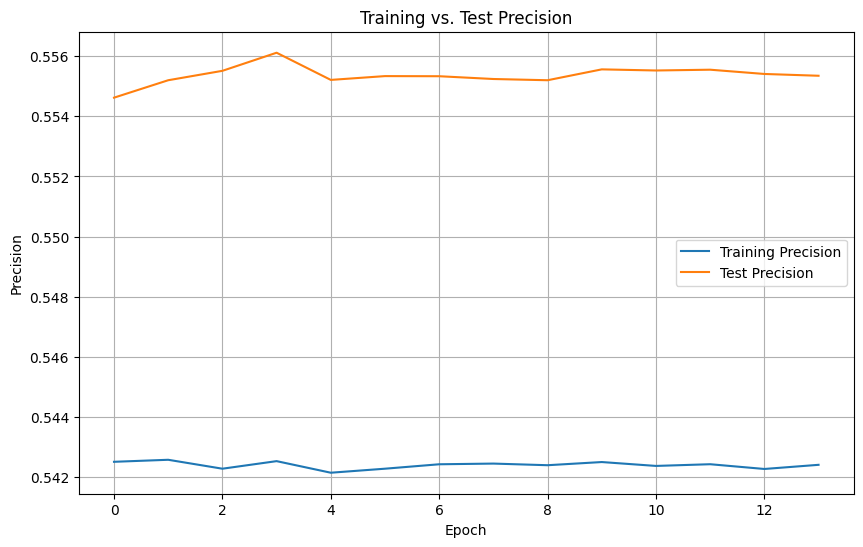

In [344]:
# Learning visualisation for the Deep Neural Network (DNN)
# The model is not actually training, as the precision and accuracy score are not improving on TRAIN/TEST with more Epochs

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(best_history_nn['precision_10'], label='Training Precision')
plt.plot(best_history_nn['val_precision_10'], label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training vs. Test Precision')
plt.legend()
plt.grid(True)
plt.show()

# 2) Different Decision rules to improve precision (varying threshold)

best model1 (clf_best): Decision Tree (max_depth=15)
best model2 (rf_best): Random Forest (n_estimators=200, max_depth=17)

## 2.1. Predicting probabilities (predict_proba), getting the distribution for probabilities, and new decision rules

In [345]:
# y_pred_test = best_lr.predict_proba(X_test)

# predicting probability instead of a lable

y_pred_test = rf_best.predict_proba(X_test)
y_pred_test_class1 = [k[1] for k in y_pred_test] # k[1] is the second element in the list of Class predictions

In [346]:
# example prediction of probabilities
y_pred_test

array([[0.55542573, 0.44457427],
       [0.5051903 , 0.4948097 ],
       [0.46000088, 0.53999912],
       ...,
       [0.46705893, 0.53294107],
       [0.44661125, 0.55338875],
       [0.49467782, 0.50532218]])

In [347]:
y_pred_test_class1_df = pd.DataFrame(y_pred_test_class1, columns=['Class1_probability'])
y_pred_test_class1_df.head()

,Class1_probability
0,0.444574
1,0.494810
2,0.539999
3,0.513030
4,0.521465


In [348]:
# Mean prediction is 0.52, median is 0.58, 75% quantile is 0.75
y_pred_test_class1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class1_probability,29829.0,0.509048,0.044838,0.341161,0.477998,0.50766,0.539354,0.692381


In [349]:
# Unconditional probability of a positive growth is 55.5%
y_test.sum()/y_test.count()

0.5551979617151095

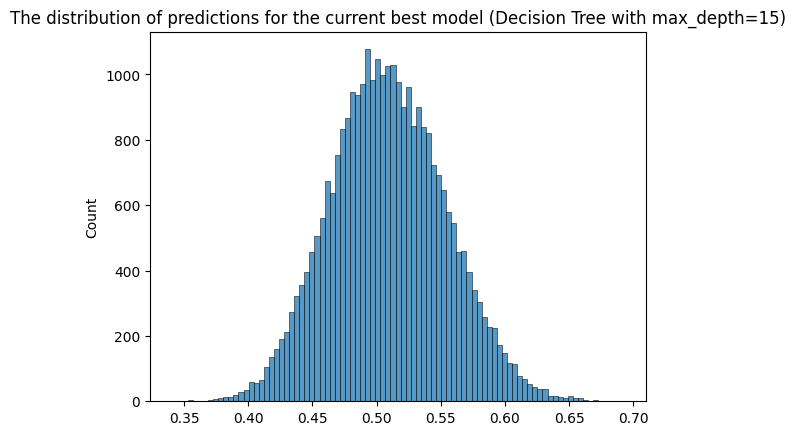

In [350]:
sns.histplot(y_pred_test_class1)

# Add a title
plt.title('The distribution of predictions for the current best model (Decision Tree with max_depth=15)')

# Show the plot
plt.show()

In [351]:
# tpr (True Positive Rate) vs. fpr (False Positive Rate) dataframe
# tp = True Positive
# tn = True Negative
# fp = False Positive
# fn = False Negative
# Decision Rule :  "y_pred>= Threshold" for Class "1"

# when only_even=True --> we'll have a step ==0.02 and leave only even records

def tpr_fpr_dataframe(y_true, y_pred, only_even=False):
    scores = []

    if only_even==False:
      thresholds = np.linspace(0, 1, 101) #[0, 0.01, 0.02, ...0.99,1.0]
    else:
      thresholds = np.linspace(0, 1, 51) #[0, 0.02, 0.04,  ...0.98,1.0]

    for t in thresholds:

        actual_positive = (y_true == 1)
        actual_negative = (y_true == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        if tp + fp > 0:
          precision = tp / (tp + fp)

        if tp + fn > 0:
          recall = tp / (tp + fn)

        if precision+recall > 0:
          f1_score = 2*precision*recall / (precision+recall)

        accuracy = (tp+tn) / (tp+tn+fp+fn)

        scores.append((t, tp, fp, fn, tn, precision, recall, accuracy, f1_score))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn','precision','recall', 'accuracy','f1_score']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores


In [352]:
df_scores = tpr_fpr_dataframe(y_test,
                              y_pred_test_class1,
                              only_even=True)

In [353]:
# full df_scores
df_scores

,threshold,tp,fp,fn,tn,precision,recall,accuracy,f1_score,tpr,fpr
0,0.00,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000
1,0.02,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000
2,0.04,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000
3,0.06,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000
4,0.08,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000
5,0.10,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000
6,0.12,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000
7,0.14,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000
8,0.16,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000
9,0.18,16561,13268,0,0,0.555198,1.000000,0.555198,0.713990,1.000000,1.000000


In [354]:
df_scores[(df_scores.threshold>=0.5) & (df_scores.threshold<=0.8)]

,threshold,tp,fp,fn,tn,precision,recall,accuracy,f1_score,tpr,fpr
25,0.50,9692,7211,6869,6057,0.573389,0.585230,0.527976,0.579249,0.585230,0.543488
26,0.52,6845,4962,9716,8306,0.579741,0.413320,0.507929,0.482586,0.413320,0.373983
27,0.54,4281,3035,12280,10233,0.585156,0.258499,0.486573,0.358588,0.258499,0.228746
28,0.56,2368,1562,14193,11706,0.602545,0.142987,0.471823,0.231126,0.142987,0.117727
29,0.58,1136,677,15425,12591,0.626586,0.068595,0.460190,0.123653,0.068595,0.051025
30,0.60,473,222,16088,13046,0.680576,0.028561,0.453217,0.054822,0.028561,0.016732
31,0.62,184,56,16377,13212,0.766667,0.011110,0.449093,0.021903,0.011110,0.004221
32,0.64,64,15,16497,13253,0.810127,0.003865,0.446445,0.007692,0.003865,0.001131
33,0.66,12,3,16549,13265,0.800000,0.000725,0.445104,0.001448,0.000725,0.000226
34,0.68,1,0,16560,13268,1.000000,0.000060,0.444836,0.000121,0.000060,0.000000


<Axes: title={'center': 'Precision vs. Recall for the Best Model (Decision Tree with max_depth=15)'}, xlabel='threshold'>

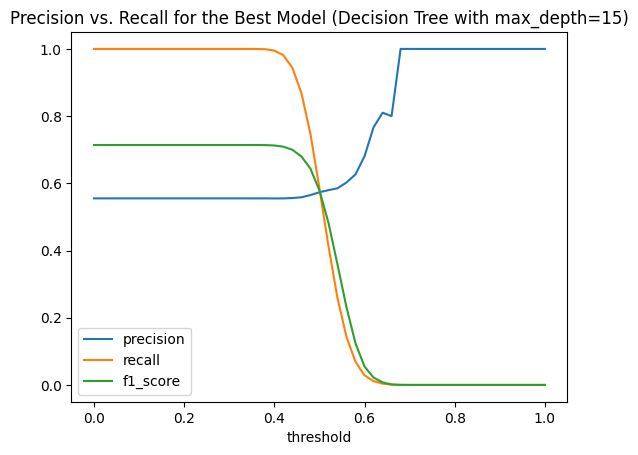

In [355]:
# Try to find high Precision score points

df_scores.plot.line(x='threshold',
                    y=['precision','recall', 'f1_score'],
                    title = 'Precision vs. Recall for the Best Model (Decision Tree with max_depth=15)')

## 2.2) [Code Snippet 6] Defining new columns with Predictions in new_df: pred7..pred10
* pred7 and pred8 are 2 decision rules for the Decision Tree (best model with max_depth=15)
* pred9 and pred10 are 2 decision rules for the Random Forest (second best model)

In [356]:
# adding Decision Tree predictors (clf_best) to the dataset for 2 new rules: Threshold = 0.66 and 0.78


y_pred_all = clf_best.predict_proba(X_all)
y_pred_all_class1 = [k[1] for k in y_pred_all] #list of predictions for class "1"
y_pred_all_class1_array = np.array(y_pred_all_class1) # (Numpy Array) np.array of predictions for class "1" , converted from a list

# defining a new prediction vector is easy now, as the dimensions will match
new_df['proba_pred7'] = y_pred_all_class1_array
new_df['pred7_clf_best_rule_66'] = (y_pred_all_class1_array >= 0.66).astype(int)

new_df['proba_pred8'] = y_pred_all_class1_array
new_df['pred8_clf_best_rule_78'] = (y_pred_all_class1_array >= 0.78).astype(int)

In [357]:
# adding Random Forest predictors (rf_best)
rf_best

RandomForestClassifier(max_depth=17, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [358]:
# adding Random Forest predictors (rf_best) to the dataset for 2 new rules: Threshold = 0.66 and 0.78

y_pred_all = rf_best.predict_proba(X_all)
y_pred_all_class1 = [k[1] for k in y_pred_all] #list of predictions for class "1"
y_pred_all_class1_array = np.array(y_pred_all_class1) # (Numpy Array) np.array of predictions for class "1" , converted from a list

# defining a new prediction vector is easy now, as the dimensions will match
new_df['proba_pred9'] = y_pred_all_class1_array
new_df['pred9_rf_best_rule_55'] = (y_pred_all_class1_array >= 0.55).astype(int)

new_df['proba_pred10'] = y_pred_all_class1_array
new_df['pred10_rf_best_rule_60'] = (y_pred_all_class1_array >= 0.6).astype(int)

# new predictors
new_df['proba_pred11'] = y_pred_all_class1_array
new_df['pred12_rf_best_rule_51'] = (y_pred_all_class1_array >= 0.51).astype(int)

new_df['proba_pred12'] = y_pred_all_class1_array
new_df['pred13_rf_best_rule_52'] = (y_pred_all_class1_array >= 0.52).astype(int)

new_df['proba_pred13'] = y_pred_all_class1_array
new_df['pred14_rf_best_rule_53'] = (y_pred_all_class1_array >= 0.53).astype(int)

new_df['proba_pred14'] = y_pred_all_class1_array
new_df['pred15_rf_best_rule_54'] = (y_pred_all_class1_array >= 0.54).astype(int)

new_df['proba_pred15'] = y_pred_all_class1_array
new_df['pred15_rf_best_rule_56'] = (y_pred_all_class1_array >= 0.56).astype(int)

new_df['proba_pred16'] = y_pred_all_class1_array
new_df['pred11_rf_best_rule_57'] = (y_pred_all_class1_array >= 0.57).astype(int)

new_df['proba_pred17'] = y_pred_all_class1_array
new_df['pred11_rf_best_rule_58'] = (y_pred_all_class1_array >= 0.58).astype(int)

new_df['proba_pred18'] = y_pred_all_class1_array
new_df['pred11_rf_best_rule_59'] = (y_pred_all_class1_array >= 0.59).astype(int)


In [359]:
# new prediction is added --> need to recalculate the correctness
PREDICTIONS, IS_CORRECT = get_predictions_correctness(new_df, to_predict='is_positive_growth_5d_future')

Prediction columns founded: ['pred0_manual_cci', 'pred1_manual_prev_g1', 'pred2_manual_prev_g1_and_snp', 'pred3_manual_gdp_and_fastd', 'pred4_manual_gdp_and_wti30d', 'pred5_clf_10', 'pred6_clf_best', 'pred7_clf_best_rule_66', 'pred8_clf_best_rule_78', 'pred9_rf_best_rule_55', 'pred10_rf_best_rule_60', 'pred12_rf_best_rule_51', 'pred13_rf_best_rule_52', 'pred14_rf_best_rule_53', 'pred15_rf_best_rule_54', 'pred15_rf_best_rule_56', 'pred11_rf_best_rule_57', 'pred11_rf_best_rule_58', 'pred11_rf_best_rule_59']
Created columns is_correct: ['is_correct_pred0', 'is_correct_pred1', 'is_correct_pred2', 'is_correct_pred3', 'is_correct_pred4', 'is_correct_pred5', 'is_correct_pred6', 'is_correct_pred7', 'is_correct_pred8', 'is_correct_pred9', 'is_correct_pred10', 'is_correct_pred12', 'is_correct_pred13', 'is_correct_pred14', 'is_correct_pred15', 'is_correct_pred11']
Precision on TEST set for each prediction:
Prediction column:pred0_manual_cci , is_correct_column: is_correct_pred0
is_correct_pred0
1

In [360]:
PREDICTIONS

['pred0_manual_cci',
 'pred1_manual_prev_g1',
 'pred2_manual_prev_g1_and_snp',
 'pred3_manual_gdp_and_fastd',
 'pred4_manual_gdp_and_wti30d',
 'pred5_clf_10',
 'pred6_clf_best',
 'pred7_clf_best_rule_66',
 'pred8_clf_best_rule_78',
 'pred9_rf_best_rule_55',
 'pred10_rf_best_rule_60',
 'pred12_rf_best_rule_51',
 'pred13_rf_best_rule_52',
 'pred14_rf_best_rule_53',
 'pred15_rf_best_rule_54',
 'pred15_rf_best_rule_56',
 'pred11_rf_best_rule_57',
 'pred11_rf_best_rule_58',
 'pred11_rf_best_rule_59']

<Axes: >

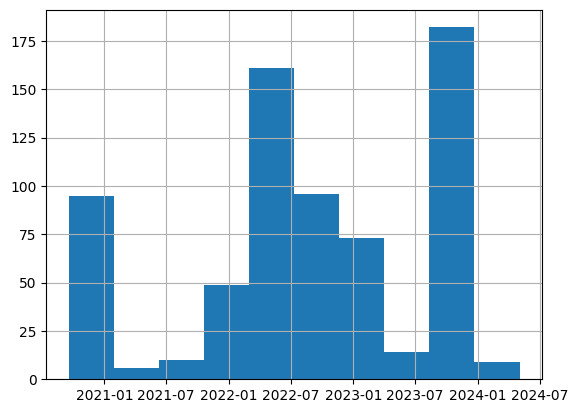

In [361]:
# When did it predict to trade for the "rare" prediction pred10? (only 2%)
new_df[(new_df.split=='test')&(new_df.pred10_rf_best_rule_60==1)].Date.hist()

In [362]:
new_df[(new_df.split=='test')&(new_df.pred10_rf_best_rule_60==1)].sort_values(by='Date')

,Open,High,Low,Close,Adj Close_x,Volume,Ticker,Year,Month,Weekday,...,pred11_rf_best_rule_59,is_correct_pred7,is_correct_pred8,is_correct_pred9,is_correct_pred10,is_correct_pred12,is_correct_pred13,is_correct_pred14,is_correct_pred15,is_correct_pred11
5326,756.000000,759.599976,744.000000,744.000000,726.495850,85106.0,RMS.PA,2020,September,4,...,1,1,1,0,0,0,0,0,0,0
5327,276.000000,276.100006,269.600006,271.100006,256.523193,590993.0,OR.PA,2020,September,0,...,1,0,0,1,1,1,1,1,1,1
4823,47.689999,48.369999,47.570000,48.270000,47.062443,1151700.0,HDB,2020,September,1,...,1,0,0,1,1,1,1,1,1,1
5420,13.770000,13.810000,13.560000,13.590000,12.568239,7495000.0,INFY,2020,September,2,...,1,0,0,1,1,1,1,1,1,1
6298,155.300003,155.639999,151.830002,152.110001,143.006088,449500.0,SAP,2020,September,2,...,1,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,22.600000,23.049999,22.600000,22.740000,22.740000,86700.0,IDEXY,2024,May,2,...,1,1,1,0,0,0,0,0,0,0
7204,181.699997,183.429993,179.149994,180.070007,180.070007,622200.0,SAP,2024,May,2,...,1,1,1,0,0,0,0,0,0,0
7041,396.609985,402.320007,396.350006,398.579987,398.579987,2605000.0,BRK-B,2024,May,2,...,1,1,1,0,0,0,0,0,0,0
4057,268.149994,270.910004,266.709991,267.320007,267.320007,6119900.0,V,2024,May,2,...,1,1,1,0,0,0,0,0,0,0


In [363]:
# Pred 10: How many positive prediction per day (out of 33 stocks possible)
pred10_daily_positive_count = pd.DataFrame(new_df[(new_df.split=='test')&(new_df.pred10_rf_best_rule_60==1)].groupby('Date')['pred10_rf_best_rule_60'].count())

In [364]:
# Pred 9: How many positive prediction per day (out of 33 stocks possible)
pred9_daily_positive_count = pd.DataFrame(new_df[(new_df.split=='test')&(new_df.pred9_rf_best_rule_55==1)].groupby('Date')['pred9_rf_best_rule_55'].count())

In [365]:
# Unique trading days on Test (4 years)
new_df[(new_df.split=='test')].Date.nunique()

947

In [366]:
pred10_daily_positive_count

,pred10_rf_best_rule_60
Date,
2020-09-18,1
2020-09-21,1
2020-09-22,1
2020-09-23,6
2020-09-24,4
...,...
2023-11-13,1
2023-11-17,1
2024-01-08,1


array([[<Axes: title={'center': 'pred10_rf_best_rule_60'}>]], dtype=object)

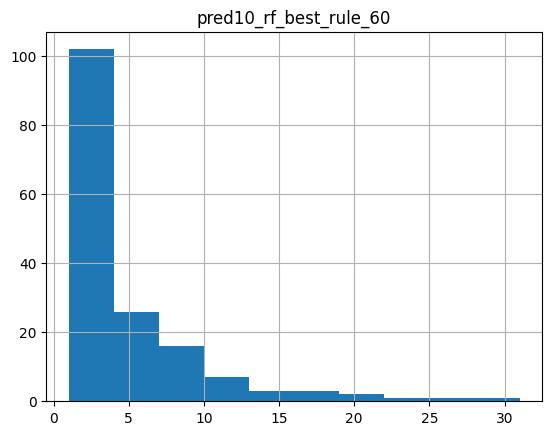

In [367]:
pred10_daily_positive_count.hist()

In [368]:
# 75% cases we have not more than 6 bets of $100
pred10_daily_positive_count.describe().T

,count,mean,std,min,25%,50%,75%,max
pred10_rf_best_rule_60,162.0,4.290123,4.998984,1.0,1.0,2.0,6.0,31.0


array([[<Axes: title={'center': 'pred9_rf_best_rule_55'}>]], dtype=object)

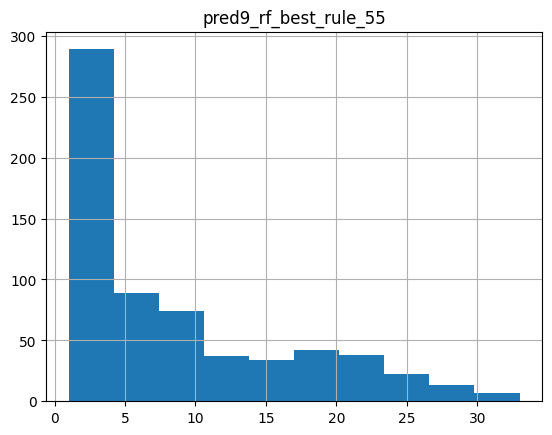

In [369]:
pred9_daily_positive_count.hist()

In [370]:
pred9_daily_positive_count.describe().T

,count,mean,std,min,25%,50%,75%,max
pred9_rf_best_rule_55,645.0,8.474419,7.903025,1.0,2.0,6.0,13.0,33.0


## 2.3) Agg. stats on ALL predictions

In [371]:
# let's review the Predictions:
PREDICTIONS, IS_CORRECT = get_predictions_correctness(new_df, to_predict=to_predict)


Prediction columns founded: ['pred0_manual_cci', 'pred1_manual_prev_g1', 'pred2_manual_prev_g1_and_snp', 'pred3_manual_gdp_and_fastd', 'pred4_manual_gdp_and_wti30d', 'pred5_clf_10', 'pred6_clf_best', 'pred7_clf_best_rule_66', 'pred8_clf_best_rule_78', 'pred9_rf_best_rule_55', 'pred10_rf_best_rule_60', 'pred12_rf_best_rule_51', 'pred13_rf_best_rule_52', 'pred14_rf_best_rule_53', 'pred15_rf_best_rule_54', 'pred15_rf_best_rule_56', 'pred11_rf_best_rule_57', 'pred11_rf_best_rule_58', 'pred11_rf_best_rule_59']
Created columns is_correct: ['is_correct_pred0', 'is_correct_pred1', 'is_correct_pred2', 'is_correct_pred3', 'is_correct_pred4', 'is_correct_pred5', 'is_correct_pred6', 'is_correct_pred7', 'is_correct_pred8', 'is_correct_pred9', 'is_correct_pred10', 'is_correct_pred12', 'is_correct_pred13', 'is_correct_pred14', 'is_correct_pred15', 'is_correct_pred11']
Precision on TEST set for each prediction:
Prediction column:pred0_manual_cci , is_correct_column: is_correct_pred0
is_correct_pred0
1

In [372]:
# Extract number from the prediction column

# Example string
example_string = "pred10_rf_best_rule_60"

# Split the string by '_'
parts = example_string.split('_')

# Extract the part with 'pred' and remove the 'pred' prefix
pred_number = parts[0].replace('pred', '')

# Print the result
print(pred_number)

# Print in one line
print(int(example_string.split('_')[0].replace('pred', '')))


10
10


In [373]:
# all predictions
PREDICTIONS

['pred0_manual_cci',
 'pred1_manual_prev_g1',
 'pred2_manual_prev_g1_and_snp',
 'pred3_manual_gdp_and_fastd',
 'pred4_manual_gdp_and_wti30d',
 'pred5_clf_10',
 'pred6_clf_best',
 'pred7_clf_best_rule_66',
 'pred8_clf_best_rule_78',
 'pred9_rf_best_rule_55',
 'pred10_rf_best_rule_60',
 'pred12_rf_best_rule_51',
 'pred13_rf_best_rule_52',
 'pred14_rf_best_rule_53',
 'pred15_rf_best_rule_54',
 'pred15_rf_best_rule_56',
 'pred11_rf_best_rule_57',
 'pred11_rf_best_rule_58',
 'pred11_rf_best_rule_59']

In [374]:
# all predictions on MODELS (not-manual predictions)
PREDICTIONS_ON_MODELS = [p for p in PREDICTIONS if int(p.split('_')[0].replace('pred', ''))>=5]
PREDICTIONS_ON_MODELS

['pred5_clf_10',
 'pred6_clf_best',
 'pred7_clf_best_rule_66',
 'pred8_clf_best_rule_78',
 'pred9_rf_best_rule_55',
 'pred10_rf_best_rule_60',
 'pred12_rf_best_rule_51',
 'pred13_rf_best_rule_52',
 'pred14_rf_best_rule_53',
 'pred15_rf_best_rule_54',
 'pred15_rf_best_rule_56',
 'pred11_rf_best_rule_57',
 'pred11_rf_best_rule_58',
 'pred11_rf_best_rule_59']

In [375]:
# all predictions on Models - correctness
IS_CORRECT_ON_MODELS = [p for p in IS_CORRECT if int(p.replace('is_correct_pred', ''))>=5]
IS_CORRECT_ON_MODELS

['is_correct_pred5',
 'is_correct_pred6',
 'is_correct_pred7',
 'is_correct_pred8',
 'is_correct_pred9',
 'is_correct_pred10',
 'is_correct_pred12',
 'is_correct_pred13',
 'is_correct_pred14',
 'is_correct_pred15',
 'is_correct_pred11']

In [376]:
# predictions on models
# pred10_rf_best_rule_60: ONLY 2% of TEST cases predicted with high confidence of growth
new_df.groupby('split')[PREDICTIONS_ON_MODELS].agg(['count','sum','mean']).T

split                                 test          train    validation
pred5_clf_10           count  29829.000000  123458.000000  29388.000000
                       sum    25644.000000   98448.000000  27563.000000
                       mean       0.859700       0.797421      0.937900
pred6_clf_best         count  29829.000000  123458.000000  29388.000000
                       sum    19828.000000   78085.000000  21163.000000
                       mean       0.664722       0.632482      0.720124
pred7_clf_best_rule_66 count  29829.000000  123458.000000  29388.000000
                       sum     8504.000000   31404.000000   6415.000000
                       mean       0.285092       0.254370      0.218286
pred8_clf_best_rule_78 count  29829.000000  123458.000000  29388.000000
                       sum     5419.000000   23345.000000   3751.000000
                       mean       0.181669       0.189093      0.127637
pred9_rf_best_rule_55  count  29829.000000  123458.000000  29388.000000
                       sum     5466.000000   63447.000000  17685.000000
                       mean       0.183244       0.513916      0.601776
pred10_rf_best_rule_60 count  29829.000000  123458.000000  29388.000000
                       sum      695.000000   48759.000000  14427.000000
                       mean       0.023299       0.394944      0.490915
pred12_rf_best_rule_51 count  29829.000000  123458.000000  29388.000000
                       sum    14315.000000   73457.000000  19899.000000
                       mean       0.479902       0.594996      0.677113
pred13_rf_best_rule_52 count  29829.000000  123458.000000  29388.000000
                       sum    11807.000000   71100.000000  19343.000000
                       mean       0.395823       0.575904      0.658194
pred14_rf_best_rule_53 count  29829.000000  123458.000000  29388.000000
                       sum     9501.000000   68681.000000  18817.000000
                       mean       0.318516       0.556311      0.640295
pred15_rf_best_rule_54 count  29829.000000  123458.000000  29388.000000
                       sum     7316.000000   66104.000000  18248.000000
                       mean       0.245265       0.535437      0.620934
pred15_rf_best_rule_56 count  29829.000000  123458.000000  29388.000000
                       sum     3930.000000   60614.000000  17075.000000
                       mean       0.131751       0.490969      0.581019
pred11_rf_best_rule_57 count  29829.000000  123458.000000  29388.000000
                       sum     2725.000000   57755.000000  16468.000000
                       mean       0.091354       0.467811      0.560365
pred11_rf_best_rule_58 count  29829.000000  123458.000000  29388.000000
                       sum     1813.000000   54855.000000  15817.000000
                       mean       0.060780       0.444321      0.538213
pred11_rf_best_rule_59 count  29829.000000  123458.000000  29388.000000
                       sum     1180.000000   51829.000000  15133.000000
                       mean       0.039559       0.419811      0.514938

In [377]:
# 10 predictions stats (check TEST set)
new_df.groupby('split')[PREDICTIONS].agg(['count','sum','mean']).T

split                                       test          train    validation
pred0_manual_cci             count  29829.000000  123458.000000  29388.000000
                             sum      799.000000    3162.000000    875.000000
                             mean       0.026786       0.025612      0.029774
pred1_manual_prev_g1         count  29829.000000  123458.000000  29388.000000
                             sum    15601.000000   62117.000000  15585.000000
                             mean       0.523015       0.503143      0.530318
pred2_manual_prev_g1_and_snp count  29829.000000  123458.000000  29388.000000
                             sum    10455.000000   41609.000000  10902.000000
                             mean       0.350498       0.337030      0.370968
pred3_manual_gdp_and_fastd   count  29829.000000  123458.000000  29388.000000
                             sum    29822.000000  107032.000000  29388.000000
                             mean       0.999765       0.866951      1.000000
pred4_manual_gdp_and_wti30d  count  29829.000000  123458.000000  29388.000000
                             sum        0.000000    5673.000000      0.000000
                             mean       0.000000       0.045951      0.000000
pred5_clf_10                 count  29829.000000  123458.000000  29388.000000
                             sum    25644.000000   98448.000000  27563.000000
                             mean       0.859700       0.797421      0.937900
pred6_clf_best               count  29829.000000  123458.000000  29388.000000
                             sum    19828.000000   78085.000000  21163.000000
                             mean       0.664722       0.632482      0.720124
pred7_clf_best_rule_66       count  29829.000000  123458.000000  29388.000000
                             sum     8504.000000   31404.000000   6415.000000
                             mean       0.285092       0.254370      0.218286
pred8_clf_best_rule_78       count  29829.000000  123458.000000  29388.000000
                             sum     5419.000000   23345.000000   3751.000000
                             mean       0.181669       0.189093      0.127637
pred9_rf_best_rule_55        count  29829.000000  123458.000000  29388.000000
                             sum     5466.000000   63447.000000  17685.000000
                             mean       0.183244       0.513916      0.601776
pred10_rf_best_rule_60       count  29829.000000  123458.000000  29388.000000
                             sum      695.000000   48759.000000  14427.000000
                             mean       0.023299       0.394944      0.490915
pred12_rf_best_rule_51       count  29829.000000  123458.000000  29388.000000
                             sum    14315.000000   73457.000000  19899.000000
                             mean       0.479902       0.594996      0.677113
pred13_rf_best_rule_52       count  29829.000000  123458.000000  29388.000000
                             sum    11807.000000   71100.000000  19343.000000
                             mean       0.395823       0.575904      0.658194
pred14_rf_best_rule_53       count  29829.000000  123458.000000  29388.000000
                             sum     9501.000000   68681.000000  18817.000000
                             mean       0.318516       0.556311      0.640295
pred15_rf_best_rule_54       count  29829.000000  123458.000000  29388.000000
                             sum     7316.000000   66104.000000  18248.000000
                             mean       0.245265       0.535437      0.620934
pred15_rf_best_rule_56       count  29829.000000  123458.000000  29388.000000
                             sum     3930.000000   60614.000000  17075.000000
                             mean       0.131751       0.490969      0.581019
pred11_rf_best_rule_57       count  29829.000000  123458.000000  29388.000000
                             sum     2725.000000   57755.000000  16468.000000
                      

# 3) Trading Simulations

* create simulation 1 features: like "sim1_pred0" ... "sim1_predLast"

## 3.1) Investing $100 on every positive prediction
* fees = 0.1% for each buy and sell operation ==> 0.2% for buy+sell operation

In [378]:
# current prediction
pred = 'pred6_clf_best'

In [379]:
# Total Number of Investment Opportunities
new_df[new_df.split=='test'].Close.count()

29829

In [380]:
# Total Number of Days (~4 years of trading)
new_df[new_df.split=='test'].Date.nunique()

947

In [381]:
# check actual future growth with 'growth_future_5d', correctness of the prediction with 'is_positive_growth_5d_future'
TO_PREDICT

['growth_future_5d', 'is_positive_growth_5d_future']

In [382]:
new_df[['growth_future_5d','is_positive_growth_5d_future',pred]]

,growth_future_5d,is_positive_growth_5d_future,pred6_clf_best
3490,0.963003,0,1
3491,0.971143,0,1
3492,0.929709,0,1
3493,0.980114,0,1
3494,1.007291,1,1
...,...,...,...
5422,NaN,0,0
5423,NaN,0,0
5424,NaN,0,0
5425,NaN,0,0


In [383]:
# GROSS REVENUE: ONLY when current_prediction equals to 1: invest $100 into that stock (buy), and sell in 1week (sell)
new_df['sim1_gross_rev_pred6'] = new_df[pred] * 100 * (new_df['growth_future_5d']-1)

In [384]:
# FEES: 0.1% for each operation , 0.2% for buy+sell ONLY when current_prediction equals to one
new_df['sim1_fees_pred6'] = -new_df[pred] * 100 * 0.002

In [385]:
# NET REVENUE: GROSS_REVENUE + FEES
new_df['sim1_net_rev_pred6'] = new_df['sim1_gross_rev_pred6'] + new_df['sim1_fees_pred6']

In [386]:
COLUMNS_FIN_RESULT = ['Date','Ticker','Close']+TO_PREDICT+ [pred,  'sim1_gross_rev_pred6','sim1_fees_pred6','sim1_net_rev_pred6']
new_df[(new_df.split=='test')&(new_df[pred]==1)][COLUMNS_FIN_RESULT]

,Date,Ticker,Close,growth_future_5d,is_positive_growth_5d_future,pred6_clf_best,sim1_gross_rev_pred6,sim1_fees_pred6,sim1_net_rev_pred6
8702,2020-09-21,MSFT,202.539993,1.034067,1,1,3.406741,-0.2,3.206741
8703,2020-09-22,MSFT,207.419998,0.999228,0,1,-0.077153,-0.2,-0.277153
8704,2020-09-23,MSFT,200.589996,1.048557,1,1,4.855687,-0.2,4.655687
8705,2020-09-24,MSFT,203.190002,1.045623,1,1,4.562258,-0.2,4.362258
8706,2020-09-25,MSFT,207.820007,0.992157,0,1,-0.784335,-0.2,-0.984335
...,...,...,...,...,...,...,...,...,...
5417,2024-04-23,LT.NS,3610.149902,0.995610,0,1,-0.439036,-0.2,-0.639036
5418,2024-04-24,LT.NS,3634.850098,0.990275,0,1,-0.972532,-0.2,-1.172532
5419,2024-04-25,LT.NS,3652.300049,0.958245,0,1,-4.175451,-0.2,-4.375451
5420,2024-04-26,LT.NS,3605.199951,0.960640,0,1,-3.935979,-0.2,-4.135979


In [387]:
# DAILY INVESTMENTS COUNT
filter_test_and_positive_pred = (new_df.split=='test')&(new_df[pred]==1)
df_investments_count_daily = pd.DataFrame(new_df[filter_test_and_positive_pred].groupby('Date')[pred].count())
sim1_avg_investments_per_day = df_investments_count_daily[pred].quantile(0.75)  # 75% case - how many $100 investments per day do we have?
print(sim1_avg_investments_per_day)

33.0


In [388]:
# Distribution: how many times do we trade daily (for the current Prediction)?
df_investments_count_daily.describe().T

,count,mean,std,min,25%,50%,75%,max
pred6_clf_best,809.0,24.509271,11.989175,1.0,13.0,32.0,33.0,33.0


In [389]:
new_df[(new_df.split=='test')&(new_df[pred]==1)][['sim1_gross_rev_pred6','sim1_fees_pred6','sim1_net_rev_pred6']].sum()

sim1_gross_rev_pred6    14477.431798
sim1_fees_pred6         -3965.600000
sim1_net_rev_pred6      10511.831798
dtype: float64

### 3.1.2 Calculate fin. results for all fields
* Simplified and approximate calculation

In [390]:
# Calculate fin. result for ALL predictions (manual and produced by models)

sim1_results = [] # results in Array

# Iterate over all predictions
for pred in PREDICTIONS:
  print(f'Calculating sumulation for prediction {pred}:')
  print(f"    Count times of investment {len(new_df[(new_df.split=='test')&(new_df[pred]==1)])} out of {len(new_df[(new_df.split=='test')])} TEST records")

  # Prefix: e.g. pred1 or pred10
  pred_prefix= pred.split('_')[0]

  # Fin. result columns: define new records for EACH positive prediction
  new_df['sim1_gross_rev_'+pred_prefix] = new_df[pred] * 100 * (new_df['growth_future_5d']-1)
  new_df['sim1_fees_'+pred_prefix] = -new_df[pred] * 100 * 0.002
  new_df['sim1_net_rev_'+pred_prefix] = new_df['sim1_gross_rev_'+pred_prefix] + new_df['sim1_fees_'+pred_prefix]

  # calculate agg. results for each PREDICTION columns (pred) on TEST
  filter_test_and_positive_pred = (new_df.split=='test')&(new_df[pred]==1) # filter records on TEST set, when current prediction is 1 (we invest $100 for 1 week ahead - 5 periods)
  sim1_count_investments = len(new_df[filter_test_and_positive_pred])
  sim1_gross_rev = new_df[filter_test_and_positive_pred]['sim1_gross_rev_'+pred_prefix].sum()
  sim1_fees = new_df[filter_test_and_positive_pred]['sim1_fees_'+pred_prefix].sum()
  sim1_net_rev = new_df[filter_test_and_positive_pred]['sim1_net_rev_'+pred_prefix].sum()

  if sim1_gross_rev>0:
    sim1_fees_percentage = -sim1_fees/sim1_gross_rev
  else:
    sim1_fees_percentage = None

  if sim1_count_investments>0:
    sim1_average_net_revenue = sim1_net_rev/sim1_count_investments
  else:
    sim1_average_net_revenue = None

  # APPROXIMATE CAPITAL REQUIRED and CAGR Calculation
  df_investments_count_daily = pd.DataFrame(new_df[filter_test_and_positive_pred].groupby('Date')[pred].count())
  sim1_avg_investments_per_day = df_investments_count_daily[pred].mean()
  sim1_q75_investments_per_day = df_investments_count_daily[pred].quantile(0.75)  # 75% case - how many $100 investments per day do we have?
  # df_investments_count_daily[pred].mean()
  sim1_capital = 100 * 5 * sim1_q75_investments_per_day # 5 days in a row with positive predictions
  # CAGR: average growth per year. E.g. if you have 1.5 return (50% growth in 4 years) --> (1.5)**(1/4) = 1.106 or 10.6% average
  sim1_CAGR = ((sim1_capital+sim1_net_rev)/sim1_capital)**(1/4)

  # append to DF
  sim1_results.append((pred,sim1_count_investments,sim1_gross_rev,sim1_fees,sim1_net_rev,sim1_fees_percentage,sim1_average_net_revenue,sim1_avg_investments_per_day,sim1_capital,sim1_CAGR))


  # output for all predictions with some positive predictions
  if  sim1_count_investments>1:
    print(f"    Financial Result: \n {new_df[filter_test_and_positive_pred][['sim1_gross_rev_'+pred_prefix,'sim1_fees_'+pred_prefix,'sim1_net_rev_'+pred_prefix]].sum()}")
    print(f"        Count Investments in 4 years (on TEST): {sim1_count_investments}")
    print(f"        Gross Revenue: ${int(sim1_gross_rev)}")
    print(f"        Fees (0.2% for buy+sell): ${int(-sim1_fees)}")
    print(f"        Net Revenue: ${int(sim1_net_rev)}")
    print(f"        Fees are {int(-100.0*sim1_fees/sim1_gross_rev)} % from Gross Revenue")
    print(f"        Capital Required : ${int(sim1_capital)} (Vbegin)")
    print(f"        Final value (Vbegin + Net_revenue) : ${int(sim1_capital + sim1_net_rev)} (Vfinal)")

    print(f"        Average CAGR on TEST (4 years) : {np.round(sim1_CAGR,3)}, or {np.round(100.0*(sim1_CAGR-1),1)}% ")

    print(f"        Average daily stats: ")
    print(f"            Average net revenue per investment: ${np.round(sim1_net_rev/sim1_count_investments,2)} ")
    print(f"            Average investments per day: {int(np.round(sim1_avg_investments_per_day))} ")
    print(f"            Q75 investments per day: {int(np.round(sim1_q75_investments_per_day))} ")
    print('=============================================+')


# results in a DataFrame from an Array
columns_simulation = ['prediction', 'sim1_count_investments', 'sim1_gross_rev', 'sim1_fees', 'sim1_net_rev', 'sim1_fees_percentage','sim1_average_net_revenue','sim1_avg_investments_per_day','sim1_capital','sim1_CAGR']

df_sim1_results = pd.DataFrame(sim1_results,columns=columns_simulation)

Calculating sumulation for prediction pred0_manual_cci:
    Count times of investment 799 out of 29829 TEST records
    Financial Result: 
 sim1_gross_rev_pred0    309.04589
sim1_fees_pred0        -159.80000
sim1_net_rev_pred0      149.84589
dtype: float64
        Count Investments in 4 years (on TEST): 799
        Gross Revenue: $309
        Fees (0.2% for buy+sell): $159
        Net Revenue: $149
        Fees are 51 % from Gross Revenue
        Capital Required : $1000 (Vbegin)
        Final value (Vbegin + Net_revenue) : $1149 (Vfinal)
        Average CAGR on TEST (4 years) : 1.036, or 3.6% 
        Average daily stats: 
            Average net revenue per investment: $0.19 
            Average investments per day: 2 
            Q75 investments per day: 2 
=============================================+
Calculating sumulation for prediction pred1_manual_prev_g1:
    Count times of investment 15601 out of 29829 TEST records
    Financial Result: 
 sim1_gross_rev_pred1    6913.217124


In [391]:
df_sim1_results['sim1_growth_capital_4y'] = (df_sim1_results.sim1_net_rev+df_sim1_results.sim1_capital) / df_sim1_results.sim1_capital

In [392]:
# final comparison
df_sim1_results

,prediction,sim1_count_investments,sim1_gross_rev,sim1_fees,sim1_net_rev,sim1_fees_percentage,sim1_average_net_revenue,sim1_avg_investments_per_day,sim1_capital,sim1_CAGR,sim1_growth_capital_4y
0,pred0_manual_cci,799,309.045890,-159.8,149.845890,0.517075,0.187542,1.866822,1000.0,1.035523,1.149846
1,pred1_manual_prev_g1,15601,6913.217124,-3120.2,3812.817124,0.451338,0.244396,16.526483,11000.0,1.077237,1.346620
2,pred2_manual_prev_g1_and_snp,10455,4213.424501,-2091.0,2139.624501,0.496271,0.204651,21.918239,13000.0,1.038826,1.164587
3,pred3_manual_gdp_and_fastd,29822,14893.285316,-5964.4,8961.885316,0.400476,0.300513,31.491024,16500.0,1.114555,1.543145
4,pred4_manual_gdp_and_wti30d,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,pred5_clf_10,25644,15578.953119,-5128.8,10483.153119,0.329213,0.408796,31.311355,16500.0,1.130843,1.635343
6,pred6_clf_best,19828,14477.431798,-3965.6,10511.831798,0.273916,0.530151,24.509271,16500.0,1.131143,1.637081
7,pred7_clf_best_rule_66,8504,6977.651882,-1700.8,5276.851882,0.243750,0.620514,18.608315,16000.0,1.073858,1.329803
8,pred8_clf_best_rule_78,5419,4659.937647,-1083.8,3576.137647,0.232578,0.659926,15.891496,14500.0,1.056658,1.246630
9,pred9_rf_best_rule_55,5466,5150.760675,-1093.2,4064.360675,0.212240,0.743571,8.474419,6500.0,1.129100,1.625286


In [393]:
# Create the scatter plot
fig = px.scatter(
    df_sim1_results.dropna(),
    x='sim1_avg_investments_per_day',
    y='sim1_CAGR',
    size='sim1_growth_capital_4y',  # Use the 'size' parameter for sim1_CAGR
    text='prediction',
    title='Compound Annual Growth vs. Time spent (Average investments per day)',
    labels={'sim1_capital': 'Initial Capital Requirement', 'growth_capital_4y': '4-Year Capital Growth'}
)

# Update the layout to improve readability of the annotations
fig.update_traces(textposition='top center')

# Show the plot
fig.show()

In [394]:
# ANSWER : best rule is pred14_rf_best_rule_53 (THRESHOLD=0.53), with CAGR = 1.1376 - the new global best

## 3.2. Advanced Simulation
* to_predict = 'is_positive_growth_5d_future'
* invest ~20% of capital each day (sell positions from 5 days ago), REINVEST PREVIOUS GAINS
* use predict_proba predictions
* select top1..3..x predictions > threshold (0.53)
* invest proportionally the prediction
* stop loss y%
* take profit z%
* Not included: portfolio optimization

### 3.2.1) [Code Snippet 1] Define rank of prediction (pred_14_rf_best_rule_53)
*  Current best prediction pred_14_rf_best_rule_53, with CAGR = 1.1376 (13.76% average capital growth with simple simulation)

In [395]:
# https://stackoverflow.com/questions/17775935/sql-like-window-functions-in-pandas-row-numbering-in-python-pandas-dataframe
# rank of prediction

new_df["pred14_rank"] = new_df.groupby("Date")["proba_pred14"].rank(method="first", ascending=False)

<ipython-input-395-f317ee16e759>:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [396]:
# CHECK RANK FOR 1 DAY:
  # we have predictions for all 33 stocks
first_trading_day_2024 = new_df[new_df.Date>='2024-01-04'].Date.unique().astype(str)[0]
first_trading_day_2024
print(f'First trading day in 2024: {first_trading_day_2024}, count predictions = {len(new_df[new_df.Date==first_trading_day_2024])}')

First trading day in 2024: 2024-01-04, count predictions = 33


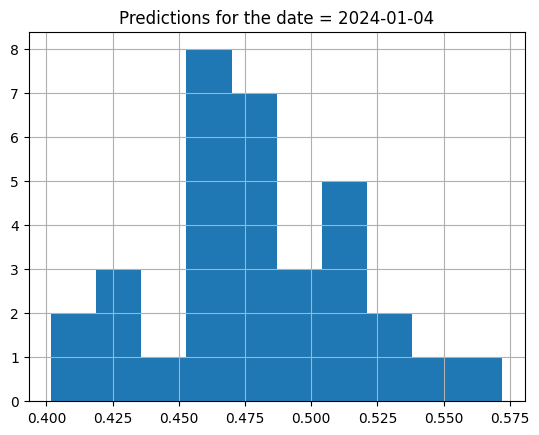

In [397]:
new_df[new_df.Date==first_trading_day_2024].proba_pred14.hist()
plt.title(f'Predictions for the date = {first_trading_day_2024}')
# Show the plot
plt.show()

In [398]:
new_df[new_df.Date==first_trading_day_2024][['Date','Ticker','proba_pred14','pred14_rank']].sort_values(by='pred14_rank').head(5)

,Date,Ticker,proba_pred14,pred14_rank
6172,2024-01-04,RMS.PA,0.572040,1.0
4877,2024-01-04,GOOG,0.540646,2.0
8242,2024-01-04,CDI.PA,0.528151,3.0
6703,2024-01-04,AMZN,0.523443,4.0
6172,2024-01-04,MC.PA,0.518024,5.0


### 3.2.2 Define Min(Low) for the next 5 days and Max(High) for the next 5 days
* Assymetric! distributions for Max_High_Next_5 / Adj_close_today vs. Min_Low_Next_5/Adj_close_today

In [399]:
# Sort the DataFrame by Ticker and Date
new_df = new_df.sort_values(by=['Ticker', 'Date'])

In [400]:
new_df['growth_future_5d'].describe().T

count    182510.000000
mean          1.004208
std           0.049970
min           0.412383
25%           0.980342
50%           1.003817
75%           1.027308
max           3.018887
Name: growth_future_5d, dtype: float64

In [401]:
# take profit if growth >=8%
new_df['growth_future_5d'].quantile(0.95)

1.0770682018177788

In [402]:
# stop loss when -5%
new_df['growth_future_5d'].quantile(0.1)

0.9527185761055379

In [403]:
new_df[['Date','High','Low','Adj Close_x','Ticker']].tail(10)

,Date,High,Low,Adj Close_x,Ticker
4052,2024-04-24,283.000000,274.489990,275.019989,V
4053,2024-04-25,276.220001,270.489990,275.160004,V
4054,2024-04-26,276.769989,273.829987,274.519989,V
4055,2024-04-29,274.470001,271.089996,271.839996,V
4056,2024-04-30,272.079987,268.579987,268.609985,V
4057,2024-05-01,270.910004,266.709991,267.320007,V
4058,2024-05-02,269.470001,266.649994,267.609985,V
4059,2024-05-03,269.450012,266.500000,268.489990,V
4060,2024-05-06,272.779999,269.570007,272.670013,V
4061,2024-05-07,277.880005,272.834991,276.459991,V


In [404]:
# Define a function to get the rolling max High and min Low for the next 5 days

# Sort the DataFrame: Sorting by Ticker and Date ensures that we are looking at each ticker's data in chronological order.
# Rolling window calculation: We use the rolling method with a window of 5 to calculate the maximum high and minimum low over the next 5 days.
# The shift method is used to align these values correctly with the current row.

def rolling_max_min(df, window=5):
    # high/low in 5 days
    df['Max_High_Next_5'] = df['High'].rolling(window=window, min_periods=1).max().shift(-window+1)
    df['Min_Low_Next_5'] = df['Low'].rolling(window=window, min_periods=1).min().shift(-window+1)

    # low in 1 day (for lower entry)
    df['Min_Low_Next_1'] = df['Low'].rolling(window=1, min_periods=1).min().shift(-1)
    return df

In [405]:
# Apply the function to each group of Ticker
# Important!: need to drop index from groupby operation (reset_index) - so that you can merge that afterwards
result = new_df[['Date','High','Low','Adj Close_x','Ticker']].groupby('Ticker').apply(rolling_max_min).reset_index(drop=True)
result.tail(10)

,Date,High,Low,Adj Close_x,Ticker,Max_High_Next_5,Min_Low_Next_5,Min_Low_Next_1
182665,2024-04-24,283.000000,274.489990,275.019989,V,283.000000,268.579987,270.489990
182666,2024-04-25,276.220001,270.489990,275.160004,V,276.769989,266.709991,273.829987
182667,2024-04-26,276.769989,273.829987,274.519989,V,276.769989,266.649994,271.089996
182668,2024-04-29,274.470001,271.089996,271.839996,V,274.470001,266.500000,268.579987
182669,2024-04-30,272.079987,268.579987,268.609985,V,272.779999,266.500000,266.709991
182670,2024-05-01,270.910004,266.709991,267.320007,V,277.880005,266.500000,266.649994
182671,2024-05-02,269.470001,266.649994,267.609985,V,NaN,NaN,266.500000
182672,2024-05-03,269.450012,266.500000,268.489990,V,NaN,NaN,269.570007
182673,2024-05-06,272.779999,269.570007,272.670013,V,NaN,NaN,272.834991
182674,2024-05-07,277.880005,272.834991,276.459991,V,NaN,NaN,NaN


In [406]:
result[result.Ticker=='AAPL'].tail(10)

,Date,High,Low,Adj Close_x,Ticker,Max_High_Next_5,Min_Low_Next_5,Min_Low_Next_1
6115,2024-04-24,169.300003,166.210007,169.020004,AAPL,176.029999,166.210007,168.149994
6116,2024-04-25,170.610001,168.149994,169.889999,AAPL,176.029999,168.149994,169.179993
6117,2024-04-26,171.339996,169.179993,169.300003,AAPL,176.029999,169.110001,173.100006
6118,2024-04-29,176.029999,173.100006,173.500000,AAPL,187.000000,169.110001,170.000000
6119,2024-04-30,174.990005,170.000000,170.330002,AAPL,187.000000,169.110001,169.110001
6120,2024-05-01,172.710007,169.110001,169.300003,AAPL,187.000000,169.110001,170.889999
6121,2024-05-02,173.419998,170.889999,173.029999,AAPL,NaN,NaN,182.660004
6122,2024-05-03,187.000000,182.660004,183.380005,AAPL,NaN,NaN,180.419998
6123,2024-05-06,184.199997,180.419998,181.710007,AAPL,NaN,NaN,181.320007
6124,2024-05-07,184.899994,181.320007,182.399994,AAPL,NaN,NaN,NaN


In [407]:
# Calculate the ratios + safe divide
result['Ratio_MaxHighNext5_to_AdjClose'] = np.where(result['Adj Close_x'] == 0, np.nan, result['Max_High_Next_5']/result['Adj Close_x'])
result['Ratio_MinLowNext5_to_AdjClose'] =  np.where(result['Adj Close_x'] == 0, np.nan,  result['Min_Low_Next_5']/result['Adj Close_x'])

result['Ratio_MinLowNext1_to_AdjClose'] =  np.where(result['Adj Close_x'] == 0, np.nan,  result['Min_Low_Next_1']/result['Adj Close_x'])

In [408]:
result[result.Ticker=='AAPL'].tail(10)

,Date,High,Low,Adj Close_x,Ticker,Max_High_Next_5,Min_Low_Next_5,Min_Low_Next_1,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose
6115,2024-04-24,169.300003,166.210007,169.020004,AAPL,176.029999,166.210007,168.149994,1.041474,0.983375,0.994853
6116,2024-04-25,170.610001,168.149994,169.889999,AAPL,176.029999,168.149994,169.179993,1.036141,0.989758,0.995821
6117,2024-04-26,171.339996,169.179993,169.300003,AAPL,176.029999,169.110001,173.100006,1.039752,0.998878,1.022445
6118,2024-04-29,176.029999,173.100006,173.500000,AAPL,187.000000,169.110001,170.000000,1.077810,0.974697,0.979827
6119,2024-04-30,174.990005,170.000000,170.330002,AAPL,187.000000,169.110001,169.110001,1.097869,0.992837,0.992837
6120,2024-05-01,172.710007,169.110001,169.300003,AAPL,187.000000,169.110001,170.889999,1.104548,0.998878,1.009392
6121,2024-05-02,173.419998,170.889999,173.029999,AAPL,NaN,NaN,182.660004,NaN,NaN,1.055655
6122,2024-05-03,187.000000,182.660004,183.380005,AAPL,NaN,NaN,180.419998,NaN,NaN,0.983859
6123,2024-05-06,184.199997,180.419998,181.710007,AAPL,NaN,NaN,181.320007,NaN,NaN,0.997854
6124,2024-05-07,184.899994,181.320007,182.399994,AAPL,NaN,NaN,NaN,NaN,NaN,NaN


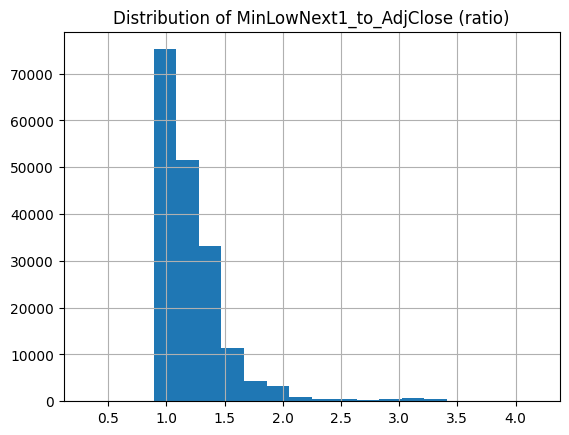

In [409]:
result.Ratio_MinLowNext1_to_AdjClose.hist(bins=20)
plt.title(f'Distribution of MinLowNext1_to_AdjClose (ratio)')
# Show the plot
plt.show()

In [410]:
result.Ratio_MinLowNext1_to_AdjClose.describe().T

count    182642.000000
mean          1.225722
std           0.301893
min           0.311353
25%           1.027546
50%           1.135659
75%           1.327752
max           4.185120
Name: Ratio_MinLowNext1_to_AdjClose, dtype: float64

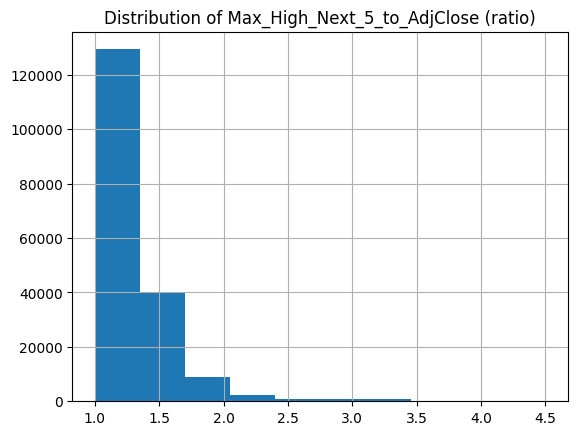

In [411]:
result.Ratio_MaxHighNext5_to_AdjClose.hist()
plt.title(f'Distribution of Max_High_Next_5_to_AdjClose (ratio)')
# Show the plot
plt.show()

In [412]:
result.Ratio_MaxHighNext5_to_AdjClose.describe().T

count    182543.000000
mean          1.282586
std           0.318275
min           1.000000
25%           1.072142
50%           1.188389
75%           1.392367
max           4.505072
Name: Ratio_MaxHighNext5_to_AdjClose, dtype: float64

In [413]:
result[result.Ratio_MaxHighNext5_to_AdjClose>=1.5].tail()

,Date,High,Low,Adj Close_x,Ticker,Max_High_Next_5,Min_Low_Next_5,Min_Low_Next_1,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose
177573,2020-03-20,27.670000,25.420000,19.202631,TTE,36.660000,25.420000,28.170000,1.909113,1.323777,1.466986
177574,2020-03-23,29.580000,28.170000,21.755930,TTE,36.660000,28.170000,31.320000,1.685058,1.294819,1.439607
177575,2020-03-24,33.480000,31.320000,24.906012,TTE,37.500000,31.320000,33.520000,1.505661,1.257528,1.345860
177578,2020-03-27,35.570000,33.369999,27.162100,TTE,41.119999,33.369999,35.770000,1.513874,1.228550,1.316909
177732,2020-11-04,32.830002,31.750000,26.040216,TTE,39.160000,31.750000,32.290001,1.503828,1.219268,1.240005


<Axes: >

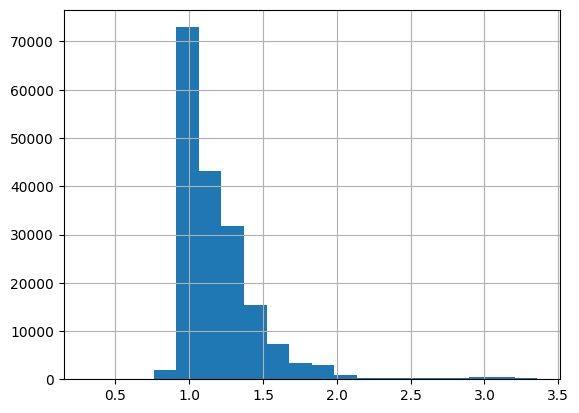

In [414]:
# High intra-day volatility, especially on earlier days after the IPO
result.Ratio_MinLowNext5_to_AdjClose.hist(bins=20)

In [415]:
result.Ratio_MinLowNext5_to_AdjClose.describe().T

count    182543.000000
mean          1.200885
std           0.297079
min           0.302279
25%           1.007737
50%           1.113398
75%           1.300878
max           3.356811
Name: Ratio_MinLowNext5_to_AdjClose, dtype: float64

In [416]:
result[result.Ratio_MinLowNext5_to_AdjClose<=0.9]

,Date,High,Low,Adj Close_x,Ticker,Max_High_Next_5,Min_Low_Next_5,Min_Low_Next_1,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose
184,2000-09-25,0.991071,0.929688,0.808805,AAPL,0.991071,0.453125,0.917411,1.225353,0.560240,1.134280
185,2000-09-26,0.977679,0.917411,0.777624,AAPL,0.977679,0.419643,0.861607,1.257264,0.539647,1.107999
186,2000-09-27,0.941964,0.861607,0.739830,AAPL,0.960938,0.396205,0.859375,1.298864,0.535536,1.161585
187,2000-09-28,0.960938,0.859375,0.808805,AAPL,0.960938,0.390625,0.453125,1.188096,0.482966,0.560240
2597,2010-05-03,9.567143,9.388571,8.053278,AAPL,9.567143,7.116071,9.169643,1.187981,0.883624,1.138622
...,...,...,...,...,...,...,...,...,...,...,...
181627,2020-03-10,182.610001,171.880005,177.536499,V,182.610001,147.979996,170.199997,1.028577,0.833519,0.958676
181628,2020-03-11,178.729996,170.199997,168.154068,V,178.729996,147.979996,156.990005,1.062894,0.880026,0.933608
181629,2020-03-12,172.000000,156.990005,155.640976,V,176.320007,139.800003,162.210007,1.132864,0.898221,1.042206
181630,2020-03-13,176.320007,162.210007,170.954239,V,176.320007,139.800003,147.979996,1.031387,0.817763,0.865612


In [417]:
# ~0.8% STOP LOSS
len(result[result.Ratio_MinLowNext5_to_AdjClose<=0.9])/len(result)

0.008955795812234843

In [418]:
# Merge the results back with the original dataframe
new_df = new_df.merge(result[['Date', 'Ticker', 'Max_High_Next_5', 'Min_Low_Next_5','Ratio_MaxHighNext5_to_AdjClose','Ratio_MinLowNext5_to_AdjClose','Ratio_MinLowNext1_to_AdjClose']], on=['Date', 'Ticker'])

In [419]:
new_df.tail()

,Open,High,Low,Close,Adj Close_x,Volume,Ticker,Year,Month,Weekday,...,sim1_net_rev_pred15,sim1_gross_rev_pred11,sim1_fees_pred11,sim1_net_rev_pred11,pred14_rank,Max_High_Next_5,Min_Low_Next_5,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose
182670,268.149994,270.910004,266.709991,267.320007,267.320007,6119900.0,V,2024,May,2,...,NaN,NaN,-0.2,NaN,6.0,277.880005,266.5,1.039503,0.996932,0.997494
182671,269.350006,269.470001,266.649994,267.609985,267.609985,5061700.0,V,2024,May,3,...,NaN,NaN,0.0,NaN,7.0,NaN,NaN,NaN,NaN,0.995852
182672,269.000000,269.450012,266.500000,268.489990,268.489990,3862000.0,V,2024,May,4,...,NaN,NaN,0.0,NaN,7.0,NaN,NaN,NaN,NaN,1.004023
182673,269.649994,272.779999,269.570007,272.670013,272.670013,3958700.0,V,2024,May,0,...,NaN,NaN,0.0,NaN,22.0,NaN,NaN,NaN,NaN,1.000605
182674,273.720001,277.880005,272.834991,276.459991,276.459991,4965748.0,V,2024,May,1,...,NaN,NaN,0.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN


### 3.2.3) [Code Snippet 2] Generate fin.result for one date

In [1]:
import pandas as pd
import numpy as np

from data_repo import DataRepository

FETCH_REPO = False

repo = DataRepository()

if FETCH_REPO:
  # Fetch All 3 datasets for all dates from APIs
  repo.fetch()
  # save data to a local dir
  repo.persist(data_dir='local_data/')
else:
  # OR Load from disk
  repo.load(data_dir='local_data/')  

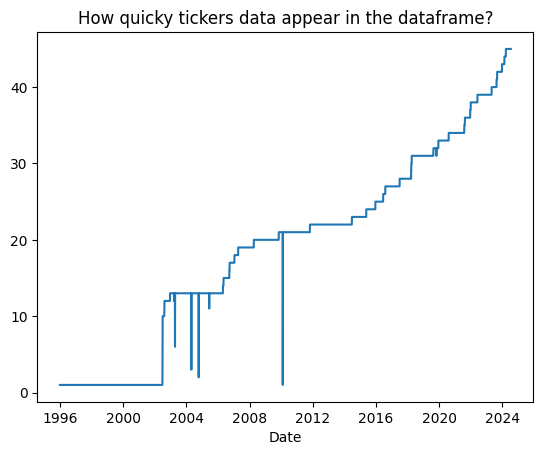

In [2]:
import matplotlib.pyplot as plt
repo.ticker_df.groupby('Date')['Open'].agg('count').plot()
plt.title('How quicky tickers data appear in the dataframe?')
plt.show()

In [3]:
TRANSFORM_DATA = False
from transform import TransformData

transformed =  TransformData(repo = repo)

if TRANSFORM_DATA:
  transformed.transform()
  transformed.persist(data_dir='local_data/')
else:
  transformed.load(data_dir='local_data/')

In [4]:
transformed.transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133458 entries, 0 to 134
Columns: 300 entries, Open to growth_audinr_365d
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), float64(225), int32(65), int64(5), object(2)
memory usage: 273.4+ MB


In [5]:
transformed.transformed_df.tail(2)

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,growth_jpyinr_7d,growth_jpyinr_30d,growth_jpyinr_90d,growth_jpyinr_365d,growth_audinr_1d,growth_audinr_3d,growth_audinr_7d,growth_audinr_30d,growth_audinr_90d,growth_audinr_365d
133,22.01,23.110001,22.01,22.75,22.75,21145.0,INDIA,PRUDMOULI.NS,2024,7,...,1.009124,0.977114,0.934325,0.828681,1.001629,1.011368,1.013887,1.020047,1.045403,0.973294
134,23.57,23.570000,22.25,22.34,22.34,4714.0,INDIA,PRUDMOULI.NS,2024,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
TRAIN_MODEL = True

from train import TrainModel
import warnings

# Suppress all warnings (not recommended in production unless necessary)
warnings.filterwarnings("ignore")

trained = TrainModel(transformed=transformed)

if TRAIN_MODEL:
  trained.prepare_dataframe() # prepare dataframes
  trained.train_random_forest() # train the model
  trained.persist(data_dir='local_data/') # save the model to disk
else:
  trained.prepare_dataframe() # prepare dataframes (incl. for inference)
  trained.load(data_dir='local_data/')


Prepare the dataframe: define feature sets, add dummies, temporal split
length: X_train (70442, 346),  X_validation (27873, 346), X_test (35143, 346)
  X_train_valid = (98315, 346),  all combined: X_all (133458, 346)
{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 150}
{'colsample_bytree': 0.82563541224115, 'learning_rate': 0.0213878759254661, 'max_depth': 25, 'n_estimators': 200, 'subsample': 0.7201685419162034}
Best RandomForest Params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 150}
RandomForest Validation Accuracy: 0.5541204750116601
Best XGBoost Params: {'colsample_bytree': 0.82563541224115, 'learning_rate': 0.0213878759254661, 'max_depth': 25, 'n_estimators': 200, 'subsample': 0.7201685419162034}
XGBoost Validation Accuracy: 1.0


In [7]:
prediction_name='pred_xgp_rf_best'
trained.make_inference(pred_name=prediction_name)
trained.df_full.head()

Making inference


,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,Ticker_UJJIVANSFB.NS,Ticker_VLSFINANCE.NS,Ticker_VOLTAMP.NS,Ticker_WINDLAS.NS,ticker_type_INDIA,split,pred_xgp_rf_best_rf,pred_xgp_rf_best_xgb,pred_xgp_rf_best,pred_xgp_rf_best_rank
0,250.000000,269.950012,250.000000,261.750000,248.795624,49138291.0,INDIA,CDSL.NS,2017,6,...,0,0,0,0,1,validation,0.408868,0.929459,0.669163,23.0
1,262.000000,264.700012,243.149994,262.149994,249.175827,14445613.0,INDIA,CDSL.NS,2017,7,...,0,0,0,0,1,validation,0.407598,0.959884,0.683741,16.0
2,263.500000,270.899994,263.000000,265.299988,252.169907,4484530.0,INDIA,CDSL.NS,2017,7,...,0,0,0,0,1,validation,0.346616,0.916153,0.631384,16.0
3,265.899994,266.500000,262.149994,263.950012,250.886734,1877748.0,INDIA,CDSL.NS,2017,7,...,0,0,0,0,1,validation,0.400430,0.944236,0.672333,13.0
4,264.399994,298.399994,262.399994,293.899994,279.354462,17400331.0,INDIA,CDSL.NS,2017,7,...,0,0,0,0,1,validation,0.400570,0.955518,0.678044,7.0


In [8]:
COLUMNS = ['Adj Close','Ticker','Date',prediction_name, prediction_name+'_rank']
trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS]

,Adj Close,Ticker,Date,pred_xgp_rf_best,pred_xgp_rf_best_rank
963,1139.449951,KSOLVES.NS,2024-07-01 00:00:00+00:00,0.518594,1.0
1126,44.049999,UJJIVANSFB.NS,2024-07-02 00:00:00+00:00,0.563014,1.0
965,1138.949951,KSOLVES.NS,2024-07-03 00:00:00+00:00,0.532989,1.0
711,710.750000,WINDLAS.NS,2024-07-04 00:00:00+00:00,0.582210,1.0
205,159.160004,AEROFLEX.NS,2024-07-05 00:00:00+00:00,0.529758,1.0
294,1313.900024,KIRLPNU.NS,2024-07-08 00:00:00+00:00,0.512081,1.0
5435,108.769997,J&KBANK.NS,2024-07-09 00:00:00+00:00,0.525117,1.0
208,150.529999,AEROFLEX.NS,2024-07-10 00:00:00+00:00,0.525043,1.0
625,398.350006,SUPRIYA.NS,2024-07-11 00:00:00+00:00,0.549410,1.0
210,148.610001,AEROFLEX.NS,2024-07-12 00:00:00+00:00,0.665999,1.0


In [9]:
trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS]

,Adj Close,Ticker,Date,pred_xgp_rf_best,pred_xgp_rf_best_rank
963,1139.449951,KSOLVES.NS,2024-07-01 00:00:00+00:00,0.518594,1.0
1126,44.049999,UJJIVANSFB.NS,2024-07-02 00:00:00+00:00,0.563014,1.0
965,1138.949951,KSOLVES.NS,2024-07-03 00:00:00+00:00,0.532989,1.0
711,710.750000,WINDLAS.NS,2024-07-04 00:00:00+00:00,0.582210,1.0
205,159.160004,AEROFLEX.NS,2024-07-05 00:00:00+00:00,0.529758,1.0
294,1313.900024,KIRLPNU.NS,2024-07-08 00:00:00+00:00,0.512081,1.0
5435,108.769997,J&KBANK.NS,2024-07-09 00:00:00+00:00,0.525117,1.0
208,150.529999,AEROFLEX.NS,2024-07-10 00:00:00+00:00,0.525043,1.0
625,398.350006,SUPRIYA.NS,2024-07-11 00:00:00+00:00,0.549410,1.0
210,148.610001,AEROFLEX.NS,2024-07-12 00:00:00+00:00,0.665999,1.0


In [10]:
from dataclasses import dataclass

@dataclass
class SimulationParams:
    initial_capital: float
    threshold: float
    fees: float
    top_k: int
    portfolio_optimization: bool
    stop_loss: float
    take_profit: float
    lower_entry: float

In [11]:
# Example of initializing with some values
sim_params = SimulationParams(
    initial_capital=100000,        # initial capital = $10k
    threshold=0.53,               # select all binary predictions with probability>=0.53
    fees=0.003,                   # trading fees = 0.2% (buy+sell)
    top_k=5,                     # select top_k predictions
    portfolio_optimization=False, # no portfolio optimizaiton
    stop_loss=0.9,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
    take_profit=1.02,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
    lower_entry= 0.995                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
)

print(sim_params)

SimulationParams(initial_capital=100000, threshold=0.53, fees=0.03, top_k=10, portfolio_optimization=False, stop_loss=0.9, take_profit=1.2, lower_entry=0.995)


In [12]:
new_df = trained.df_full.copy()
print (new_df.shape)
new_df.columns

(133458, 372)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ticker_type',
       'Ticker', 'Year', 'Month_x',
       ...
       'Ticker_UJJIVANSFB.NS', 'Ticker_VLSFINANCE.NS', 'Ticker_VOLTAMP.NS',
       'Ticker_WINDLAS.NS', 'ticker_type_INDIA', 'split',
       'pred_xgp_rf_best_rf', 'pred_xgp_rf_best_xgb', 'pred_xgp_rf_best',
       'pred_xgp_rf_best_rank'],
      dtype='object', length=372)

In [89]:
list(new_df.columns)

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'ticker_type',
 'Ticker',
 'Year',
 'Month_x',
 'Weekday',
 'Date',
 'growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_365d',
 'growth_future_5d',
 'SMA10',
 'SMA20',
 'growing_moving_average',
 'high_minus_low_relative',
 'volatility',
 'is_positive_growth_5d_future',
 'index_x',
 'adx',
 'adxr',
 'apo',
 'aroon_1',
 'aroon_2',
 'aroonosc',
 'bop',
 'cci',
 'cmo',
 'dx',
 'macd',
 'macdsignal',
 'macdhist',
 'macd_ext',
 'macdsignal_ext',
 'macdhist_ext',
 'macd_fix',
 'macdsignal_fix',
 'macdhist_fix',
 'mfi',
 'minus_di',
 'mom',
 'plus_di',
 'dm',
 'ppo',
 'roc',
 'rocp',
 'rocr',
 'rocr100',
 'rsi',
 'slowk',
 'slowd',
 'fastk',
 'fastd',
 'fastk_rsi',
 'fastd_rsi',
 'trix',
 'ultosc',
 'willr',
 'index_y',
 'ad',
 'adosc',
 'obv',
 'atr',
 'natr',
 'ht_dcperiod',
 'ht_dcphase',
 'ht_phasor_inphase',
 'ht_phasor_quadrature',
 'ht_sine_sine',
 'ht_sine_leadsine',
 'ht_trendmod',
 'avgprice',

In [93]:
new_df[new_df.split == 'test'].Date.min()

Timestamp('2020-11-09 00:00:00+0000', tz='UTC')

In [90]:
new_df[[col for col in new_df.columns if 'index' in col]]

,index_x,index_y,index
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
...,...,...,...
133453,134498,134498,134498
133454,134499,134499,134499
133455,134500,134500,134500
133456,134501,134501,134501


In [13]:
# Define a function to get the rolling max High and min Low for the next 5 days

# Sort the DataFrame: Sorting by Ticker and Date ensures that we are looking at each ticker's data in chronological order.
# Rolling window calculation: We use the rolling method with a window of 5 to calculate the maximum high and minimum low over the next 5 days.
# The shift method is used to align these values correctly with the current row.

def rolling_max_min(df, window=5):
    # high/low in 5 days
    df['Max_High_Next_5'] = df['High'].rolling(window=window, min_periods=1).max().shift(-window+1)
    df['Min_Low_Next_5'] = df['Low'].rolling(window=window, min_periods=1).min().shift(-window+1)

    # low in 1 day (for lower entry)
    df['Min_Low_Next_1'] = df['Low'].rolling(window=1, min_periods=1).min().shift(-1)
    return df

result = new_df[['Date','High','Low','Adj Close','Ticker']].groupby('Ticker').apply(rolling_max_min).reset_index(drop=True)
result.tail(10)

# Calculate the ratios + safe divide
result['Ratio_MaxHighNext5_to_AdjClose'] = np.where(result['Adj Close'] == 0, np.nan, result['Max_High_Next_5']/result['Adj Close'])
result['Ratio_MinLowNext5_to_AdjClose'] =  np.where(result['Adj Close'] == 0, np.nan,  result['Min_Low_Next_5']/result['Adj Close'])

result['Ratio_MinLowNext1_to_AdjClose'] =  np.where(result['Adj Close'] == 0, np.nan,  result['Min_Low_Next_1']/result['Adj Close'])

new_df = new_df.merge(result[['Date','Ticker','Max_High_Next_5', 'Min_Low_Next_5', 'Min_Low_Next_1', 'Ratio_MaxHighNext5_to_AdjClose', 'Ratio_MinLowNext5_to_AdjClose', 'Ratio_MinLowNext1_to_AdjClose']],
                        how = 'left',
                        on=['Date','Ticker'])
print (new_df.shape)

(133458, 378)


In [14]:
# sorted array of dates for Simulation
DATES = new_df[new_df.split=='test'].sort_values(by='Date').Date.unique()
print(f' Min date {DATES.min()}, max date {DATES.max()}')

 Min date 2020-11-09 00:00:00+00:00, max date 2024-07-12 00:00:00+00:00


In [15]:
date = DATES[0]
date

Timestamp('2020-11-09 00:00:00+0000', tz='UTC')

In [16]:
# 1. get TOP_K predictions from pred14_rf_best_rule_53, that are higher than THE THRESHOLD
if sim_params.top_k is None:
  one_day_predictions_df = new_df[(new_df.Date==date)&(new_df.pred_xgp_rf_best > sim_params.threshold)]
else:
  one_day_predictions_df = new_df[(new_df.Date==date)&(new_df.pred_xgp_rf_best > sim_params.threshold)&(new_df.pred_xgp_rf_best_rank<=sim_params.top_k)]

In [17]:
one_day_predictions_df[['Date','Ticker','pred_xgp_rf_best','pred_xgp_rf_best_rank']]

,Date,Ticker,pred_xgp_rf_best,pred_xgp_rf_best_rank
3960,2020-11-09 00:00:00+00:00,TRITURBINE.NS,0.605768,7.0
19478,2020-11-09 00:00:00+00:00,J&KBANK.NS,0.598869,8.0
65773,2020-11-09 00:00:00+00:00,SUNDARMHLD.NS,0.635050,1.0
82225,2020-11-09 00:00:00+00:00,TIDEWATER.NS,0.634979,2.0
91708,2020-11-09 00:00:00+00:00,INDNIPPON.NS,0.606572,6.0
100493,2020-11-09 00:00:00+00:00,LINCOLN.NS,0.592518,9.0
108236,2020-11-09 00:00:00+00:00,SANDESH.NS,0.620966,3.0
126648,2020-11-09 00:00:00+00:00,ALBERTDAVD.NS,0.611579,4.0
128906,2020-11-09 00:00:00+00:00,ARROWGREEN.NS,0.609136,5.0
130867,2020-11-09 00:00:00+00:00,MINDTECK.NS,0.590599,10.0


In [18]:
# 2. Get non-normalized weights: probability-threshold + 0.01
one_day_predictions_df['weight'] = one_day_predictions_df.pred_xgp_rf_best - sim_params.threshold +0.01

In [19]:
one_day_predictions_df[['Date','Ticker','Adj Close','pred_xgp_rf_best','pred_xgp_rf_best_rank','weight']]

,Date,Ticker,Adj Close,pred_xgp_rf_best,pred_xgp_rf_best_rank,weight
3960,2020-11-09 00:00:00+00:00,TRITURBINE.NS,69.323647,0.605768,7.0,0.085768
19478,2020-11-09 00:00:00+00:00,J&KBANK.NS,15.600000,0.598869,8.0,0.078869
65773,2020-11-09 00:00:00+00:00,SUNDARMHLD.NS,46.037731,0.635050,1.0,0.115050
82225,2020-11-09 00:00:00+00:00,TIDEWATER.NS,754.154053,0.634979,2.0,0.114979
91708,2020-11-09 00:00:00+00:00,INDNIPPON.NS,321.891235,0.606572,6.0,0.086572
100493,2020-11-09 00:00:00+00:00,LINCOLN.NS,221.702194,0.592518,9.0,0.072518
108236,2020-11-09 00:00:00+00:00,SANDESH.NS,495.128723,0.620966,3.0,0.100966
126648,2020-11-09 00:00:00+00:00,ALBERTDAVD.NS,401.757172,0.611579,4.0,0.091579
128906,2020-11-09 00:00:00+00:00,ARROWGREEN.NS,44.700001,0.609136,5.0,0.089136
130867,2020-11-09 00:00:00+00:00,MINDTECK.NS,28.950001,0.590599,10.0,0.070599


In [20]:
# 3. Get normalized weights
one_day_predictions_df['weight_norm'] = one_day_predictions_df['weight']/one_day_predictions_df['weight'].sum()

In [21]:
one_day_predictions_df[['Date','Ticker','Adj Close','pred_xgp_rf_best','pred_xgp_rf_best_rank','weight','weight_norm']]

,Date,Ticker,Adj Close,pred_xgp_rf_best,pred_xgp_rf_best_rank,weight,weight_norm
3960,2020-11-09 00:00:00+00:00,TRITURBINE.NS,69.323647,0.605768,7.0,0.085768,0.094663
19478,2020-11-09 00:00:00+00:00,J&KBANK.NS,15.600000,0.598869,8.0,0.078869,0.087049
65773,2020-11-09 00:00:00+00:00,SUNDARMHLD.NS,46.037731,0.635050,1.0,0.115050,0.126982
82225,2020-11-09 00:00:00+00:00,TIDEWATER.NS,754.154053,0.634979,2.0,0.114979,0.126903
91708,2020-11-09 00:00:00+00:00,INDNIPPON.NS,321.891235,0.606572,6.0,0.086572,0.095550
100493,2020-11-09 00:00:00+00:00,LINCOLN.NS,221.702194,0.592518,9.0,0.072518,0.080039
108236,2020-11-09 00:00:00+00:00,SANDESH.NS,495.128723,0.620966,3.0,0.100966,0.111437
126648,2020-11-09 00:00:00+00:00,ALBERTDAVD.NS,401.757172,0.611579,4.0,0.091579,0.101076
128906,2020-11-09 00:00:00+00:00,ARROWGREEN.NS,44.700001,0.609136,5.0,0.089136,0.098380
130867,2020-11-09 00:00:00+00:00,MINDTECK.NS,28.950001,0.590599,10.0,0.070599,0.077921


In [22]:
# 4. Capital: either 1/5 of initial, or everything that you can sell from 5 days ago
one_day_predictions_df['investment'] = one_day_predictions_df['weight_norm'] * sim_params.initial_capital/5

In [23]:
# See the allocation of an 'investment' at a price = 'Adj.Close' * sim_params.lower_entry (e.g. 0.995 - try to buy cheaper)
one_day_predictions_df[['Date','Ticker','Adj Close','pred_xgp_rf_best','pred_xgp_rf_best_rank','weight','weight_norm', 'investment']]

,Date,Ticker,Adj Close,pred_xgp_rf_best,pred_xgp_rf_best_rank,weight,weight_norm,investment
3960,2020-11-09 00:00:00+00:00,TRITURBINE.NS,69.323647,0.605768,7.0,0.085768,0.094663,1893.261231
19478,2020-11-09 00:00:00+00:00,J&KBANK.NS,15.600000,0.598869,8.0,0.078869,0.087049,1740.977481
65773,2020-11-09 00:00:00+00:00,SUNDARMHLD.NS,46.037731,0.635050,1.0,0.115050,0.126982,2539.640333
82225,2020-11-09 00:00:00+00:00,TIDEWATER.NS,754.154053,0.634979,2.0,0.114979,0.126903,2538.064755
91708,2020-11-09 00:00:00+00:00,INDNIPPON.NS,321.891235,0.606572,6.0,0.086572,0.095550,1911.006433
100493,2020-11-09 00:00:00+00:00,LINCOLN.NS,221.702194,0.592518,9.0,0.072518,0.080039,1600.776507
108236,2020-11-09 00:00:00+00:00,SANDESH.NS,495.128723,0.620966,3.0,0.100966,0.111437,2228.738293
126648,2020-11-09 00:00:00+00:00,ALBERTDAVD.NS,401.757172,0.611579,4.0,0.091579,0.101076,2021.525746
128906,2020-11-09 00:00:00+00:00,ARROWGREEN.NS,44.700001,0.609136,5.0,0.089136,0.098380,1967.596895
130867,2020-11-09 00:00:00+00:00,MINDTECK.NS,28.950001,0.590599,10.0,0.070599,0.077921,1558.412326


In [24]:
# 5. Lower Entry: the trade is executed only is Low price for next day is lower than bet
one_day_predictions_df['lower_entry'] = (one_day_predictions_df['Ratio_MinLowNext1_to_AdjClose']<=sim_params.lower_entry).astype(int)

In [25]:
one_day_predictions_df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,Max_High_Next_5,Min_Low_Next_5,Min_Low_Next_1,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry
3960,71.949997,71.949997,70.050003,70.099998,69.323647,36898.0,INDIA,TRITURBINE.NS,2020,11,...,72.800003,69.550003,70.449997,1.050147,1.003265,1.016248,0.085768,0.094663,1893.261231,0
19478,14.600000,15.950000,14.550000,15.600000,15.600000,5506954.0,INDIA,J&KBANK.NS,2020,11,...,16.350000,14.550000,15.450000,1.048077,0.932692,0.990385,0.078869,0.087049,1740.977481,1
65773,47.728455,47.728455,46.439697,46.928535,46.037731,25911.0,INDIA,SUNDARMHLD.NS,2020,11,...,49.417171,46.217499,46.217499,1.073406,1.003905,1.003905,0.115050,0.126982,2539.640333,0
82225,862.500000,873.000000,859.609985,870.539978,754.154053,5075.0,INDIA,TIDEWATER.NS,2020,11,...,941.989990,859.609985,862.000000,1.249068,1.139833,1.143003,0.114979,0.126903,2538.064755,0
91708,327.750000,343.700012,327.750000,331.200012,321.891235,22512.0,INDIA,INDNIPPON.NS,2020,11,...,346.299988,327.200012,327.200012,1.075829,1.016492,1.016492,0.086572,0.095550,1911.006433,0
100493,221.500000,225.000000,215.500000,222.550003,221.702194,62675.0,INDIA,LINCOLN.NS,2020,11,...,235.949997,206.050003,206.050003,1.064266,0.929400,0.929400,0.072518,0.080039,1600.776507,1
108236,490.299988,519.849976,490.250000,502.299988,495.128723,704.0,INDIA,SANDESH.NS,2020,11,...,524.750000,490.250000,491.549988,1.059825,0.990147,0.992772,0.100966,0.111437,2228.738293,1
126648,400.149994,409.000000,400.149994,405.799988,401.757172,9131.0,INDIA,ALBERTDAVD.NS,2020,11,...,422.000000,398.000000,398.000000,1.050386,0.990648,0.990648,0.091579,0.101076,2021.525746,1
128906,44.900002,45.849998,43.549999,44.700001,44.700001,6163.0,INDIA,ARROWGREEN.NS,2020,11,...,46.799999,43.549999,45.950001,1.046980,0.974273,1.027964,0.089136,0.098380,1967.596895,0
130867,29.900000,29.900000,28.950001,28.950001,28.950001,2087.0,INDIA,MINDTECK.NS,2020,11,...,30.700001,27.799999,27.799999,1.060449,0.960276,0.960276,0.070599,0.077921,1558.412326,1


In [26]:
# 6. Stop Loss: happens if the current price (or Low price) goes below stop loss threshold during one of the next 5 periods (1 week)
one_day_predictions_df['stop_loss'] = (one_day_predictions_df['Ratio_MinLowNext5_to_AdjClose'] <= sim_params.stop_loss).astype(int)

In [27]:
# 7. Take Profit: take the money if the current Price (or Max_price) goes higher than sim_params.take_profit
one_day_predictions_df['take_profit'] = (one_day_predictions_df['Ratio_MaxHighNext5_to_AdjClose'] >= sim_params.take_profit).astype(int)

In [28]:
one_day_predictions_df.columns[-50:]

Index(['Ticker_FINCABLES.NS', 'Ticker_GPIL.NS', 'Ticker_ICRA.NS',
       'Ticker_INDNIPPON.NS', 'Ticker_J&KBANK.NS', 'Ticker_KAMDHENU.NS',
       'Ticker_KARURVYSYA.NS', 'Ticker_KIRLPNU.NS', 'Ticker_KOTHARIPET.NS',
       'Ticker_KSB.NS', 'Ticker_KSOLVES.NS', 'Ticker_LINCOLN.NS',
       'Ticker_MACPOWER.NS', 'Ticker_MAHAPEXLTD.NS', 'Ticker_MINDTECK.NS',
       'Ticker_NESCO.NS', 'Ticker_NUCLEUS.NS', 'Ticker_PRUDMOULI.NS',
       'Ticker_RATEGAIN.NS', 'Ticker_RPGLIFE.NS', 'Ticker_SANDESH.NS',
       'Ticker_SCILAL.NS', 'Ticker_SHREDIGCEM.NS', 'Ticker_STYLAMIND.NS',
       'Ticker_SUNDARMHLD.NS', 'Ticker_SUPRIYA.NS', 'Ticker_TIDEWATER.NS',
       'Ticker_TRITURBINE.NS', 'Ticker_UJJIVANSFB.NS', 'Ticker_VLSFINANCE.NS',
       'Ticker_VOLTAMP.NS', 'Ticker_WINDLAS.NS', 'ticker_type_INDIA', 'split',
       'pred_xgp_rf_best_rf', 'pred_xgp_rf_best_xgb', 'pred_xgp_rf_best',
       'pred_xgp_rf_best_rank', 'Max_High_Next_5', 'Min_Low_Next_5',
       'Min_Low_Next_1', 'Ratio_MaxHighNext5_to_AdjCl

In [29]:
one_day_predictions_df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,Min_Low_Next_1,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit
3960,71.949997,71.949997,70.050003,70.099998,69.323647,36898.0,INDIA,TRITURBINE.NS,2020,11,...,70.449997,1.050147,1.003265,1.016248,0.085768,0.094663,1893.261231,0,0,0
19478,14.600000,15.950000,14.550000,15.600000,15.600000,5506954.0,INDIA,J&KBANK.NS,2020,11,...,15.450000,1.048077,0.932692,0.990385,0.078869,0.087049,1740.977481,1,0,0
65773,47.728455,47.728455,46.439697,46.928535,46.037731,25911.0,INDIA,SUNDARMHLD.NS,2020,11,...,46.217499,1.073406,1.003905,1.003905,0.115050,0.126982,2539.640333,0,0,0
82225,862.500000,873.000000,859.609985,870.539978,754.154053,5075.0,INDIA,TIDEWATER.NS,2020,11,...,862.000000,1.249068,1.139833,1.143003,0.114979,0.126903,2538.064755,0,0,1
91708,327.750000,343.700012,327.750000,331.200012,321.891235,22512.0,INDIA,INDNIPPON.NS,2020,11,...,327.200012,1.075829,1.016492,1.016492,0.086572,0.095550,1911.006433,0,0,0
100493,221.500000,225.000000,215.500000,222.550003,221.702194,62675.0,INDIA,LINCOLN.NS,2020,11,...,206.050003,1.064266,0.929400,0.929400,0.072518,0.080039,1600.776507,1,0,0
108236,490.299988,519.849976,490.250000,502.299988,495.128723,704.0,INDIA,SANDESH.NS,2020,11,...,491.549988,1.059825,0.990147,0.992772,0.100966,0.111437,2228.738293,1,0,0
126648,400.149994,409.000000,400.149994,405.799988,401.757172,9131.0,INDIA,ALBERTDAVD.NS,2020,11,...,398.000000,1.050386,0.990648,0.990648,0.091579,0.101076,2021.525746,1,0,0
128906,44.900002,45.849998,43.549999,44.700001,44.700001,6163.0,INDIA,ARROWGREEN.NS,2020,11,...,45.950001,1.046980,0.974273,1.027964,0.089136,0.098380,1967.596895,0,0,0
130867,29.900000,29.900000,28.950001,28.950001,28.950001,2087.0,INDIA,MINDTECK.NS,2020,11,...,27.799999,1.060449,0.960276,0.960276,0.070599,0.077921,1558.412326,1,0,0


In [30]:
# future_gross_return, depending on lower_entry, take_profit, stop_loss

import random

def get_future_gross_return(row, sim_params:SimulationParams):
  if row['lower_entry']==0: # no trade, investment is untouched, no fees
    return row['investment']

  # buy trade is filled for ALL next cases:
  if row['take_profit']==1 and row['stop_loss']==1:
    if random.random()>0.5: #assume take_profit event was first
      return  row['investment']*(sim_params.take_profit+(1-sim_params.lower_entry))
    else: #assume stop_loss event was first
      return row['investment']*(sim_params.stop_loss+(1-sim_params.lower_entry))

  if row['take_profit']==1: # take some good profit, pay fees
    return  row['investment']*(sim_params.take_profit+(1-sim_params.lower_entry))

  if row['stop_loss']==1: # fix the loss, pay fees
      return row['investment']*(sim_params.stop_loss+(1-sim_params.lower_entry))

  # no stop_loss and no take_profit
  if pd.isna(row['growth_future_5d']):
    return row['investment'] # no information on growth in 5 days --> return the same investment in 5 days
  else:
    return row['investment']*(row['growth_future_5d']+(1-sim_params.lower_entry))

In [31]:
# fees, depending on lower_entry, take_profit, stop_loss

def get_fees(row, sim_params:SimulationParams):
  if row['lower_entry']==0: # no trade ==> no fees
    return 0

  # pay fees in all other cases
  return -row['investment']*sim_params.fees


In [32]:
# 8. calculate future returns (when the order is executed + stop_loss True/False + take_profit True/False)
one_day_predictions_df['future_gross_return'] = one_day_predictions_df.apply(lambda row: get_future_gross_return(row,sim_params=sim_params), axis=1)
one_day_predictions_df['fees'] =  one_day_predictions_df.apply(lambda row: get_fees(row,sim_params=sim_params), axis=1)
one_day_predictions_df['future_net_return'] = one_day_predictions_df['future_gross_return'] + one_day_predictions_df['fees']

# OLD code when no stop_loss, take_profit, and if order executed
# one_day_predictions_df['investment'] * one_day_predictions_df['growth_future_5d']
# one_day_predictions_df['fees'] =   - one_day_predictions_df['investment'] * sim_params.fees


In [33]:
# result
one_day_predictions_df

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return
3960,71.949997,71.949997,70.050003,70.099998,69.323647,36898.0,INDIA,TRITURBINE.NS,2020,11,...,1.016248,0.085768,0.094663,1893.261231,0,0,0,1893.261231,0.000000,1893.261231
19478,14.600000,15.950000,14.550000,15.600000,15.600000,5506954.0,INDIA,J&KBANK.NS,2020,11,...,0.990385,0.078869,0.087049,1740.977481,1,0,0,1749.682369,-52.229324,1697.453044
65773,47.728455,47.728455,46.439697,46.928535,46.037731,25911.0,INDIA,SUNDARMHLD.NS,2020,11,...,1.003905,0.115050,0.126982,2539.640333,0,0,0,2539.640333,0.000000,2539.640333
82225,862.500000,873.000000,859.609985,870.539978,754.154053,5075.0,INDIA,TIDEWATER.NS,2020,11,...,1.143003,0.114979,0.126903,2538.064755,0,0,1,2538.064755,0.000000,2538.064755
91708,327.750000,343.700012,327.750000,331.200012,321.891235,22512.0,INDIA,INDNIPPON.NS,2020,11,...,1.016492,0.086572,0.095550,1911.006433,0,0,0,1911.006433,0.000000,1911.006433
100493,221.500000,225.000000,215.500000,222.550003,221.702194,62675.0,INDIA,LINCOLN.NS,2020,11,...,0.929400,0.072518,0.080039,1600.776507,1,0,0,1677.472489,-48.023295,1629.449194
108236,490.299988,519.849976,490.250000,502.299988,495.128723,704.0,INDIA,SANDESH.NS,2020,11,...,0.992772,0.100966,0.111437,2228.738293,1,0,0,2301.779133,-66.862149,2234.916984
126648,400.149994,409.000000,400.149994,405.799988,401.757172,9131.0,INDIA,ALBERTDAVD.NS,2020,11,...,0.990648,0.091579,0.101076,2021.525746,1,0,0,2079.954717,-60.645772,2019.308945
128906,44.900002,45.849998,43.549999,44.700001,44.700001,6163.0,INDIA,ARROWGREEN.NS,2020,11,...,1.027964,0.089136,0.098380,1967.596895,0,0,0,1967.596895,0.000000,1967.596895
130867,29.900000,29.900000,28.950001,28.950001,28.950001,2087.0,INDIA,MINDTECK.NS,2020,11,...,0.960276,0.070599,0.077921,1558.412326,1,0,0,1733.080923,-46.752370,1686.328553


### 3.2.4 [Code Snippet 3] Wrap up one day simulation into a function

In [34]:
# Simulation Parameters
sim_params = SimulationParams(
    initial_capital=10000,                 # initial capital = $10k
    threshold=0.53,                        # select all binary predictions with probability>=0.53
    fees=0.002,                            # trading fees = 0.2% (buy+sell)
    top_k=10,                              # select top_k predictions
    portfolio_optimization=False,          # no portfolio optimizaiton
    stop_loss=0.9,                         # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
    take_profit=1.2,                       # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
    lower_entry= 0.995                     # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
)

In [35]:
[col for col in new_df.columns if 'growth' in col.lower()]

['growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_365d',
 'growth_future_5d',
 'is_positive_growth_5d_future',
 'growth_snp500_1d',
 'growth_snp500_3d',
 'growth_snp500_7d',
 'growth_snp500_30d',
 'growth_snp500_90d',
 'growth_snp500_365d',
 'growth_dax_1d',
 'growth_dax_3d',
 'growth_dax_7d',
 'growth_dax_30d',
 'growth_dax_90d',
 'growth_dax_365d',
 'growth_dji_1d',
 'growth_dji_3d',
 'growth_dji_7d',
 'growth_dji_30d',
 'growth_dji_90d',
 'growth_dji_365d',
 'growth_epi_1d',
 'growth_epi_3d',
 'growth_epi_7d',
 'growth_epi_30d',
 'growth_epi_90d',
 'growth_epi_365d',
 'growth_gold_1d',
 'growth_gold_3d',
 'growth_gold_7d',
 'growth_gold_30d',
 'growth_gold_90d',
 'growth_gold_365d',
 'growth_wti_oil_1d',
 'growth_wti_oil_3d',
 'growth_wti_oil_7d',
 'growth_wti_oil_30d',
 'growth_wti_oil_90d',
 'growth_wti_oil_365d',
 'growth_brent_oil_1d',
 'growth_brent_oil_3d',
 'growth_brent_oil_7d',
 'growth_brent_oil_30d',
 'growth_brent_oil_90d',
 'growth_brent_o

In [36]:
def one_date_simulation(date:str, invest_sum:float, df:pd.DataFrame, sim_params:SimulationParams, predictor:str='pred_xgp_rf_best'):
  # 1. get TOP_K (or ALL) predictions from the predictor (pred14_rf_best_rule_53 by default), that are higher than THE THRESHOLD
  if sim_params.top_k is None:
    one_day_predictions_df = df[(df.Date==date)&(df[predictor] > sim_params.threshold)]
  else:
    one_day_predictions_df = df[(df.Date==date)&(df[predictor] > sim_params.threshold)&(df.pred_xgp_rf_best_rank<=sim_params.top_k)]

  FIELDS = ['Adj Close', 'Ticker', 'Date', predictor , 'growth_future_5d', 'Ratio_MaxHighNext5_to_AdjClose','Ratio_MinLowNext5_to_AdjClose','Ratio_MinLowNext1_to_AdjClose']
  result_df = one_day_predictions_df[FIELDS].copy()

  # 2. Get non-normalized weights: probability-threshold + 0.01
  result_df['weight'] = result_df[predictor] - sim_params.threshold +0.01

  # 3. Get normalized weights
  result_df['weight_norm'] = result_df['weight']/result_df['weight'].sum()

  # 4. Make bets to allocate 'invest_sum' across all suitable predictions
  result_df['investment'] = result_df['weight_norm'] * invest_sum

  # 5. Lower Entry: the trade is executed only is Low price for next day is lower than the bet (Adj_Close_today * sim_params.lower_entry)
    # [ONLY TRADES with lower_entry==1 are filled by the exchange]
  result_df['lower_entry'] = (result_df['Ratio_MinLowNext1_to_AdjClose'] <= sim_params.lower_entry).astype(int)

  # 6. Stop Loss: happens if the current price (or Low price) goes below stop loss threshold during one of the next 5 periods (1 week)
  result_df['stop_loss'] = (result_df['Ratio_MinLowNext5_to_AdjClose'] <= sim_params.stop_loss).astype(int)

  # 7. Take Profit: take the money if the current Price (or Max_price) goes higher than sim_params.take_profit
  result_df['take_profit'] = (result_df['Ratio_MaxHighNext5_to_AdjClose'] >= sim_params.take_profit).astype(int)

  # 8. Calculate future returns (when the order is executed + stop_loss True/False + take_profit True/False)
  result_df['future_gross_return'] = result_df.apply(lambda row: get_future_gross_return(row,sim_params=sim_params), axis=1)
  result_df['fees'] =  result_df.apply(lambda row: get_fees(row,sim_params=sim_params), axis=1)
  result_df['future_net_return'] = result_df['future_gross_return'] + result_df['fees']

  return result_df

In [37]:
r = one_date_simulation(date='2020-09-14', invest_sum=sim_params.initial_capital/5, df=new_df, sim_params=sim_params, predictor='pred_xgp_rf_best')

In [38]:
r

,Adj Close,Ticker,Date,pred_xgp_rf_best,growth_future_5d,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return
38001,550.125305,CAPLIPOINT.NS,2020-09-14 00:00:00+00:00,0.635203,1.026086,1.099386,0.983321,1.003408,0.115203,0.094893,189.785717,0,0,0,189.785717,0.000000,189.785717
63882,2676.997314,ICRA.NS,2020-09-14 00:00:00+00:00,0.668665,1.008042,1.055287,1.012702,1.012702,0.148665,0.122456,244.912114,0,0,0,244.912114,0.000000,244.912114
71081,543.991394,NUCLEUS.NS,2020-09-14 00:00:00+00:00,0.656858,1.171663,1.137886,0.948453,0.985677,0.136858,0.112731,225.461198,1,0,0,265.291818,-0.450922,264.840896
77875,364.611359,RPGLIFE.NS,2020-09-14 00:00:00+00:00,0.646421,1.065088,1.170287,1.003809,1.019716,0.126421,0.104134,208.267063,0,0,0,208.267063,0.000000,208.267063
92881,44.493187,SHREDIGCEM.NS,2020-09-14 00:00:00+00:00,0.617462,1.011790,1.212545,1.039485,1.051846,0.097462,0.080280,160.559942,0,0,1,160.559942,0.000000,160.559942
100454,234.553055,LINCOLN.NS,2020-09-14 00:00:00+00:00,0.629664,1.119346,1.159652,0.980588,0.998495,0.109664,0.090330,180.660699,0,0,0,180.660699,0.000000,180.660699
102009,82.789337,MACPOWER.NS,2020-09-14 00:00:00+00:00,0.646387,1.045181,1.215132,0.924032,1.052672,0.126387,0.104105,208.210653,0,0,1,208.210653,0.000000,208.210653
108197,513.118164,SANDESH.NS,2020-09-14 00:00:00+00:00,0.654240,1.003650,1.069929,0.999965,0.999965,0.134240,0.110574,221.147481,0,0,0,221.147481,0.000000,221.147481
126609,419.924347,ALBERTDAVD.NS,2020-09-14 00:00:00+00:00,0.639937,1.014971,1.114129,0.993036,1.006134,0.119937,0.098792,197.584400,0,0,0,197.584400,0.000000,197.584400
128867,44.900002,ARROWGREEN.NS,2020-09-14 00:00:00+00:00,0.619193,1.094655,1.114699,0.961025,1.013363,0.099193,0.081705,163.410731,0,0,0,163.410731,0.000000,163.410731


In [39]:
# initial investment
r.investment.sum()

1999.9999999999995

In [40]:
# result in 5 days (returns+fees)
r.future_net_return.sum()

2039.3796973790202

### 3.2.5 [Code snippet 4] Generate fin result for ALL days

In [41]:
all_dates = new_df[new_df.split=='test'].sort_values(by='Date').Date.unique()
all_dates

<DatetimeArray>
['2020-11-09 00:00:00+00:00', '2020-11-10 00:00:00+00:00',
 '2020-11-11 00:00:00+00:00', '2020-11-12 00:00:00+00:00',
 '2020-11-13 00:00:00+00:00', '2020-11-14 00:00:00+00:00',
 '2020-11-17 00:00:00+00:00', '2020-11-18 00:00:00+00:00',
 '2020-11-19 00:00:00+00:00', '2020-11-20 00:00:00+00:00',
 ...
 '2024-07-01 00:00:00+00:00', '2024-07-02 00:00:00+00:00',
 '2024-07-03 00:00:00+00:00', '2024-07-04 00:00:00+00:00',
 '2024-07-05 00:00:00+00:00', '2024-07-08 00:00:00+00:00',
 '2024-07-09 00:00:00+00:00', '2024-07-10 00:00:00+00:00',
 '2024-07-11 00:00:00+00:00', '2024-07-12 00:00:00+00:00']
Length: 908, dtype: datetime64[ns, UTC]

In [42]:
# simulate for all dates but last 5
all_dates[0:-5]

<DatetimeArray>
['2020-11-09 00:00:00+00:00', '2020-11-10 00:00:00+00:00',
 '2020-11-11 00:00:00+00:00', '2020-11-12 00:00:00+00:00',
 '2020-11-13 00:00:00+00:00', '2020-11-14 00:00:00+00:00',
 '2020-11-17 00:00:00+00:00', '2020-11-18 00:00:00+00:00',
 '2020-11-19 00:00:00+00:00', '2020-11-20 00:00:00+00:00',
 ...
 '2024-06-24 00:00:00+00:00', '2024-06-25 00:00:00+00:00',
 '2024-06-26 00:00:00+00:00', '2024-06-27 00:00:00+00:00',
 '2024-06-28 00:00:00+00:00', '2024-07-01 00:00:00+00:00',
 '2024-07-02 00:00:00+00:00', '2024-07-03 00:00:00+00:00',
 '2024-07-04 00:00:00+00:00', '2024-07-05 00:00:00+00:00']
Length: 903, dtype: datetime64[ns, UTC]

In [43]:
# these last days we only "sell" the positions
all_dates[-5:]

<DatetimeArray>
['2024-07-08 00:00:00+00:00', '2024-07-09 00:00:00+00:00',
 '2024-07-10 00:00:00+00:00', '2024-07-11 00:00:00+00:00',
 '2024-07-12 00:00:00+00:00']
Length: 5, dtype: datetime64[ns, UTC]

In [44]:
capital= 5 * [sim_params.initial_capital/5]
capital[-5]

2000.0

In [45]:
def simulate(df:pd.DataFrame, sim_params:SimulationParams):

  simulation_df = None

  # all dates for simulation
  all_dates = df[df.split=='test'].sort_values(by='Date').Date.unique()

  # arrays of dates and capital available (capital for the first 5 days)
  dates = []
  capital= 5 * [sim_params.initial_capital/5]  # first 5 periods trade with 1/5 of the initial_capital. e.g. [2000,2000,2000,2000,2000]

  for current_date in all_dates[0:-5]:  #growth_future_5d is not defined for the last 5 days : ALL, but last 5 dates

    current_invest_sum = capital[-5]    # take the value or everything that you can sell from 5 days ago

    one_day_simulation_results = one_date_simulation(date = current_date,  # one day simulation result
                                    invest_sum = current_invest_sum,
                                    df = df,
                                    sim_params=sim_params,
                                    predictor='pred_xgp_rf_best')

    # add capital available in 5 days
    if len(one_day_simulation_results)==0:  #no predictions -> no trades
      capital.append(current_invest_sum)
    else:
      capital.append(one_day_simulation_results.future_net_return.sum())
    dates.append(current_date)

    if simulation_df is None:
      simulation_df = one_day_simulation_results
    else:
      simulation_df = pd.concat([simulation_df, one_day_simulation_results], ignore_index=True)

  # add last 5 days to make the count of data points equal for dates/capital arrays
  dates.extend(all_dates[-5:])
  capital_df = pd.DataFrame({'capital':capital}, index=pd.to_datetime(dates))

  # results:
  print(f'============================================================================================')
  print(f'SIMULATION STARTED')
  print(f'Simulations params: {sim_params}')
  print(f' Count bids {len(simulation_df)} in total, avg.bids per day {len(simulation_df)/simulation_df.Date.nunique()},  filled bids {len(simulation_df[simulation_df.lower_entry==1])}, fill bids percent = {len(simulation_df[simulation_df.lower_entry==1])/len(simulation_df)}')
  stop_loss_filter = (simulation_df.lower_entry==1)&(simulation_df.stop_loss==1)
  print(f'  Stop loss events: count = {len(simulation_df[stop_loss_filter])}, net loss = {simulation_df[stop_loss_filter].future_net_return.sum()-simulation_df[stop_loss_filter].investment.sum()} ')
  take_profit_filter = (simulation_df.lower_entry==1)&(simulation_df.take_profit==1)
  print(f'  Take profit events: count = {len(simulation_df[take_profit_filter])}, net profit = {simulation_df[take_profit_filter].future_net_return.sum()-simulation_df[take_profit_filter].investment.sum()} ')
  print(f'  Start capital = {sim_params.initial_capital}, Resulting capital: {capital_df[-5:].capital.sum()} ')
  print(f'  CAGR in 4 years: {np.round((capital_df[-5:].capital.sum()/sim_params.initial_capital)**(1/4),3)} or {np.round(((capital_df[-5:].capital.sum()/sim_params.initial_capital)**(1/4)-1)*100.0,2)} % of avg. growth per year')
  print(f'============================================================================================')
  return simulation_df,capital_df

In [102]:
# One initial simulation
sim_params = SimulationParams(
    initial_capital = 100000,        # initial capital = $10k
    threshold = 0.53,               # select all binary predictions with probability>=0.53
    fees = 0.003,                   # trading fees = 0.2% (buy+sell)
    top_k = 5,                      # select top_k=5 predictions
    portfolio_optimization = False, # no portfolio optimization
    stop_loss = 0.9,                # automatic sell (with loss) if price (any of next 5 days) is lower than -20% from Adj.Close
    take_profit = 1.015,              # automatic sell (with profit) if price (any of next 5 days) is higher than +30% from Adj.Close
    lower_entry = 0.99               # buy next day with the price = [Adj.Close] * 0.99 (try to buy cheaper)
)

res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.9, take_profit=1.015, lower_entry=0.99)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 596, fill bids percent = 0.4616576297443842
  Stop loss events: count = 49, net loss = -13561.341450797336 
  Take profit events: count = 564, net profit = 83908.14100353606 
  Start capital = 100000, Resulting capital: 177877.3767196564 
  CAGR in 4 years: 1.155 or 15.49 % of avg. growth per year


In [103]:
res.loc[:, res.columns[-8:]].mean()

weight_norm               0.309063
investment             7927.248622
lower_entry               0.461658
stop_loss                 0.047250
take_profit               0.965918
future_gross_return    7999.432015
fees                    -11.860096
future_net_return      7987.571919
dtype: float64

In [ ]:
res.loc[:, res.columns[-8:]].mean()

weight_norm               0.309063
investment             7689.681803
lower_entry               0.461658
stop_loss                 0.047250
take_profit               0.965918
future_gross_return    7754.606950
fees                    -11.447812
future_net_return      7743.159139
dtype: float64

### 3.2.5 [Code Snippet 5] Find optimal parameters of simulation

In [73]:
# BEST PREVIOUS CAGR is 2.11%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.99)
# iterate over lower_entry
  # best lower_entry ==0.98
for lower_entry in [0.97,0.98,0.99,1,1.01,1.02,1.03]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 100000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.53
      fees = 0.003,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.3,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = lower_entry                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.97)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 216, fill bids percent = 0.16731216111541442
  Stop loss events: count = 7, net loss = -11539.25671800835 
  Take profit events: count = 2, net profit = 1646.9186655214307 
  Start capital = 100000, Resulting capital: 101599.43994998084 
  CAGR in 4 years: 1.004 or 0.4 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.98)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 327, fill bids percent = 0.2532920216886135
  Stop loss events: count = 7, net loss = -12654.086239149066 
  Take profit events: count = 3, net profit = 7672.

In [74]:
# BEST PREVIOUS is CAGR 2.11%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.99 ==> lower_entry=0.98)

# iterate over lower_entry ++ take profit of 5%
  # best lower_entry ==0.99
for lower_entry in [0.97,0.98,0.99,1,1.01,1.02,1.03]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 100000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.53
      fees = 0.003,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.05,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = lower_entry                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.05, lower_entry=0.97)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 216, fill bids percent = 0.16731216111541442
  Stop loss events: count = 7, net loss = -9072.542492370456 
  Take profit events: count = 97, net profit = 46406.09047814133 
  Start capital = 100000, Resulting capital: 136540.44257214497 
  CAGR in 4 years: 1.081 or 8.1 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.05, lower_entry=0.98)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 327, fill bids percent = 0.2532920216886135
  Stop loss events: count = 7, net loss = -9696.929345610042 
  Take profit events: count = 141, net profit = 64

In [75]:
# BEST PREVIOUS is CAGR 10.08%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3 ==> 1.05, lower_entry=0.98)

# iterate over lower_entry ++ take profit of 4%
  # best lower_entry ==0.98
for lower_entry in [0.97,0.98,0.99,1]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 100000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.53
      fees = 0.003,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.04,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = lower_entry                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.04, lower_entry=0.97)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 216, fill bids percent = 0.16731216111541442
  Stop loss events: count = 7, net loss = -11432.866973464188 
  Take profit events: count = 119, net profit = 50898.08690145193 
  Start capital = 100000, Resulting capital: 140953.6488408014 
  CAGR in 4 years: 1.09 or 8.96 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.04, lower_entry=0.98)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 327, fill bids percent = 0.2532920216886135
  Stop loss events: count = 7, net loss = -11322.609054382978 
  Take profit events: count = 181, net profit = 

In [76]:
# BEST PREVIOUS is CAGR 12.83%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.05 ==> 1.04, lower_entry=0.98)
# BEST PREVIOUS is CAGR 12.54%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.05 ==> 1.04, lower_entry=0.99)

# iterate over lower_entry ++ take profit of 2.5%
  # best lower_entry ==0.98
for lower_entry in [0.97,0.98,0.99,1,1.01,1.02,1.03]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 100000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.53
      fees = 0.003,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.025,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = lower_entry                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.025, lower_entry=0.97)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 216, fill bids percent = 0.16731216111541442
  Stop loss events: count = 7, net loss = -2401.2685780319152 
  Take profit events: count = 184, net profit = 73179.60630468628 
  Start capital = 100000, Resulting capital: 170591.5440638412 
  CAGR in 4 years: 1.143 or 14.29 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.025, lower_entry=0.98)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 327, fill bids percent = 0.2532920216886135
  Stop loss events: count = 7, net loss = -6881.705015544969 
  Take profit events: count = 269, net profit

In [77]:
# BEST PREVIOUS is CAGR 15.54%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.04 ==> 1.025, lower_entry=0.98)
# BEST PREVIOUS is CAGR 19.49%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.04 ==> 1.025, lower_entry=0.99)

# iterate over lower_entry ++ take profit of 2%
  # best lower_entry ==0.98
for lower_entry in [0.97,0.98,0.99,1, 1.005]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 100000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.53
      fees = 0.003,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.02,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = lower_entry                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.02, lower_entry=0.97)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 216, fill bids percent = 0.16731216111541442
  Stop loss events: count = 7, net loss = -4840.6213890107465 
  Take profit events: count = 197, net profit = 64464.77972659469 
  Start capital = 100000, Resulting capital: 163545.48818420636 
  CAGR in 4 years: 1.131 or 13.09 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.02, lower_entry=0.98)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 327, fill bids percent = 0.2532920216886135
  Stop loss events: count = 7, net loss = -6533.141099398723 
  Take profit events: count = 295, net profit 

In [78]:
# BEST PREVIOUS is CAGR 15.64%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.025 ==> 1.02, lower_entry=0.98)
# BEST PREVIOUS is CAGR 18.74%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.025 ==> 1.02, lower_entry=0.99)

# iterate over lower_entry ++ take profit of 1.5%
  # best lower_entry ==0.99 , take_profit= 1.015
for lower_entry in [0.97,0.98,0.99,1, 1.005]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 100000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.53
      fees = 0.003,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.015,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = lower_entry                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.015, lower_entry=0.97)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 216, fill bids percent = 0.16731216111541442
  Stop loss events: count = 7, net loss = -7326.915037137107 
  Take profit events: count = 208, net profit = 56404.22263612109 
  Start capital = 100000, Resulting capital: 155756.38606542148 
  CAGR in 4 years: 1.117 or 11.71 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.015, lower_entry=0.98)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 327, fill bids percent = 0.2532920216886135
  Stop loss events: count = 7, net loss = -9746.13684655576 
  Take profit events: count = 312, net profit 

In [79]:
# BEST PREVIOUS is CAGR 13.31%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.02 ==> 1.015, lower_entry=0.98)
# BEST PREVIOUS is CAGR 18.08%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.02 ==> 1.015, lower_entry=0.99)

# iterate over lower_entry ++ take profit of 1% ==> not optimal, as there are no data points with CAGR >18.08%
for lower_entry in [0.97,0.98,0.99,1, 1.005]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 100000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.53
      fees = 0.003,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.01,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = lower_entry                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.01, lower_entry=0.97)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 216, fill bids percent = 0.16731216111541442
  Stop loss events: count = 7, net loss = -7676.518124434166 
  Take profit events: count = 215, net profit = 51877.147698251996 
  Start capital = 100000, Resulting capital: 151312.27472980798 
  CAGR in 4 years: 1.109 or 10.91 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.01, lower_entry=0.98)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 327, fill bids percent = 0.2532920216886135
  Stop loss events: count = 7, net loss = -6588.033935796004 
  Take profit events: count = 326, net profit 

In [81]:
# BEST PREVIOUS is CAGR 13.31%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.02 ==> 1.015, lower_entry=0.98)
# BEST PREVIOUS is CAGR 18.08%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.02 ==> 1.015, lower_entry=0.99)

# iterate over stop_loss AND lower_entry
for stop_loss in [0.8,0.85,0.9,0.95]:
  for lower_entry in [0.98,0.99]:
    # One simulation
    sim_params = SimulationParams(
        initial_capital = 100000,        # initial capital = $10k
        threshold = 0.53,               # select all binary predictions with probability>=0.53
        fees = 0.003,                   # trading fees = 0.2% (buy+sell)
        top_k = 5,                     # select top_k predictions
        portfolio_optimization = False, # no portfolio optimization
        stop_loss = stop_loss,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
        take_profit = 1.015,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
        lower_entry = lower_entry                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
    )

    res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.015, lower_entry=0.98)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 327, fill bids percent = 0.2532920216886135
  Stop loss events: count = 7, net loss = -5548.121100920864 
  Take profit events: count = 312, net profit = 75841.00892946962 
  Start capital = 100000, Resulting capital: 173322.33443322423 
  CAGR in 4 years: 1.147 or 14.74 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.015, lower_entry=0.99)
 Count bids 1291 in total, avg.bids per day 3.235588972431078,  filled bids 596, fill bids percent = 0.4616576297443842
  Stop loss events: count = 7, net loss = -10247.133707060391 
  Take profit events: count = 564, net profit

In [83]:
# BEST PREVIOUS is CAGR 17.06%  (top_k=5, portfolio_optimization=False, stop_loss=0.9, take_profit = 1.015, lower_entry=0.99)

# iterate over top_k
for top_k in [1,2,3,4,5,6,7,8,10,15,20,33]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 100000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.53
      fees = 0.003,                     # trading fees = 0.2% (buy+sell)
      top_k = top_k,                    # select top_k predictions
      portfolio_optimization = False,   # no portfolio optimization
      stop_loss = 0.9,                 # automatic sell (with loss) if price (any of next 5 days) is lower than
      take_profit = 1.015,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = 0.99                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=1, portfolio_optimization=False, stop_loss=0.9, take_profit=1.015, lower_entry=0.99)
 Count bids 399 in total, avg.bids per day 1.0,  filled bids 194, fill bids percent = 0.48621553884711777
  Stop loss events: count = 19, net loss = -15399.193340434984 
  Take profit events: count = 186, net profit = 81505.05576690007 
  Start capital = 100000, Resulting capital: 175845.42362634576 
  CAGR in 4 years: 1.152 or 15.15 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=100000, threshold=0.53, fees=0.003, top_k=2, portfolio_optimization=False, stop_loss=0.9, take_profit=1.015, lower_entry=0.99)
 Count bids 683 in total, avg.bids per day 1.7117794486215538,  filled bids 325, fill bids percent = 0.47584187408491946
  Stop loss events: count = 31, net loss = -21765.901723465882 
  Take profit events: count = 314, net profit = 70648.4

In [56]:
# BEST PREVIOUS CAGR is 27.18%:  threshold=0.53, fees=0.002, top_k=2, portfolio_optimization=False, stop_loss=0.8, take_profit=1.015, lower_entry=0.99 (invest in max 2 position DAILY)

# iterate over lower_entry
for stop_loss in [0.8, 0.81, 0.83, 0.78, 0.86]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 10000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.53
      fees = 0.002,                   # trading fees = 0.2% (buy+sell)
      top_k = 2,                      # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = stop_loss,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.015,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = 0.99                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=2, portfolio_optimization=False, stop_loss=0.8, take_profit=1.015, lower_entry=0.99)
 Count bids 683 in total, avg.bids per day 1.7117794486215538,  filled bids 325, fill bids percent = 0.47584187408491946
  Stop loss events: count = 7, net loss = -796.7202007215074 
  Take profit events: count = 314, net profit = 11086.772615573253 
  Start capital = 10000, Resulting capital: 20422.1979717646 
  CAGR in 4 years: 1.195 or 19.54 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=2, portfolio_optimization=False, stop_loss=0.81, take_profit=1.015, lower_entry=0.99)
 Count bids 683 in total, avg.bids per day 1.7117794486215538,  filled bids 325, fill bids percent = 0.47584187408491946
  Stop loss events: count = 8, net loss = -813.7725373271696 
  Take profit events: count = 314, net profit =

### 3.2.6 Explore the best simulation params (top_k=1)

In [57]:
sim_params = SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=2, portfolio_optimization=False, stop_loss=0.78, take_profit=1.015, lower_entry=0.99)

res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=2, portfolio_optimization=False, stop_loss=0.78, take_profit=1.015, lower_entry=0.99)
 Count bids 683 in total, avg.bids per day 1.7117794486215538,  filled bids 325, fill bids percent = 0.47584187408491946
  Stop loss events: count = 4, net loss = -647.0079435259549 
  Take profit events: count = 314, net profit = 11420.825664186734 
  Start capital = 10000, Resulting capital: 20760.637744909425 
  CAGR in 4 years: 1.2 or 20.04 % of avg. growth per year


In [58]:
res[res.Date=='2024-04-30']
# .future_net_return.sum()

,Adj Close,Ticker,Date,pred_xgp_rf_best,growth_future_5d,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return


In [59]:
# number of bids (out of 900+ trading days)
len(res)

683

In [60]:
# filled deals
res.lower_entry.sum()

325

In [61]:
# stop loss (regardless of a filled bid)

res.stop_loss.sum()

4

In [62]:
# take profit (regardless of a filled bid)
res.take_profit.sum()

665

In [63]:
res[(res.stop_loss==1)&(res.lower_entry==1)]

,Adj Close,Ticker,Date,pred_xgp_rf_best,growth_future_5d,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return
232,1372.400024,STYLAMIND.NS,2021-08-06 00:00:00+00:00,0.567757,0.797289,1.027397,0.750510,0.921743,0.047757,1.000000,2231.912234,1,1,1,1763.210665,-4.463824,1758.746840
262,396.950012,RATEGAIN.NS,2021-12-22 00:00:00+00:00,0.557194,0.966117,1.035395,0.749213,0.947474,0.037194,0.701156,1643.348594,1,1,1,1684.432309,-3.286697,1681.145611
351,84.199997,KOTHARIPET.NS,2022-06-15 00:00:00+00:00,0.541676,0.912114,1.020190,0.778504,0.944181,0.021676,0.399772,1164.388756,1,1,1,919.867117,-2.328778,917.538340
542,269.350006,MACPOWER.NS,2023-08-10 00:00:00+00:00,0.596436,0.905513,1.026545,0.770002,0.887321,0.076436,0.573027,1530.906466,1,1,1,1569.179127,-3.061813,1566.117314


In [64]:
# could take profit, but the bid was not executed
res[(res.take_profit==1)&(res.lower_entry==0)]

,Adj Close,Ticker,Date,pred_xgp_rf_best,growth_future_5d,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return
0,46.037731,SUNDARMHLD.NS,2020-11-09 00:00:00+00:00,0.635050,1.054924,1.073406,1.003905,1.003905,0.115050,0.500155,1000.310293,0,0,1,1000.310293,0.0,1000.310293
1,754.154053,TIDEWATER.NS,2020-11-09 00:00:00+00:00,0.634979,1.041239,1.249068,1.139833,1.143003,0.114979,0.499845,999.689707,0,0,1,999.689707,0.0,999.689707
2,45.906944,SUNDARMHLD.NS,2020-11-10 00:00:00+00:00,0.568783,1.043685,1.083240,1.006765,1.024190,0.048783,0.580341,1160.681212,0,0,1,1160.681212,0.0,1160.681212
3,219.859238,LINCOLN.NS,2020-11-10 00:00:00+00:00,0.555276,1.035569,1.073187,0.937191,0.990634,0.035276,0.419659,839.318788,0,0,1,839.318788,0.0,839.318788
4,346.898834,RPGLIFE.NS,2020-11-11 00:00:00+00:00,0.590465,0.985493,1.034596,0.994526,0.994526,0.070465,0.538385,1076.770211,0,0,1,1076.770211,0.0,1076.770211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,435.450012,FDC.NS,2024-06-06 00:00:00+00:00,0.570839,1.050178,1.065909,0.992881,0.996785,0.050839,0.580161,2142.351229,0,0,1,2142.351229,0.0,2142.351229
676,168.600006,MAHAPEXLTD.NS,2024-06-19 00:00:00+00:00,0.598981,1.000652,1.046382,0.984579,0.995255,0.078981,0.452983,2101.046255,0,0,1,2101.046255,0.0,2101.046255
679,44.049999,UJJIVANSFB.NS,2024-07-02 00:00:00+00:00,0.563014,1.027696,1.030420,0.993871,1.002043,0.043014,1.000000,3688.158537,0,0,1,3688.158537,0.0,3688.158537
680,1138.949951,KSOLVES.NS,2024-07-03 00:00:00+00:00,0.532989,0.995303,1.051451,0.985996,0.990430,0.012989,1.000000,4804.620431,0,0,1,4804.620431,0.0,4804.620431


In [65]:
res[(res.take_profit==1) &(res.lower_entry==1)]

,Adj Close,Ticker,Date,pred_xgp_rf_best,growth_future_5d,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return
21,237.740860,LINCOLN.NS,2020-12-01 00:00:00+00:00,0.559623,0.962707,1.025907,0.957555,0.980269,0.039623,0.471462,942.924069,1,0,1,966.497170,-1.885848,964.611322
25,235.997528,LINCOLN.NS,2020-12-03 00:00:00+00:00,0.577354,1.022583,1.033485,0.964629,0.977553,0.057354,0.553827,1107.654857,1,0,1,1135.346228,-2.215310,1133.130919
26,230.767517,LINCOLN.NS,2020-12-04 00:00:00+00:00,0.573588,1.041658,1.055175,0.986491,0.986491,0.053588,0.449483,898.966307,1,0,1,921.440465,-1.797933,919.642532
28,37.718616,KARURVYSYA.NS,2020-12-07 00:00:00+00:00,0.534854,1.257218,1.309698,0.988902,0.988902,0.014854,0.390507,781.013615,1,0,1,800.538955,-1.562027,798.976928
40,515.266602,CDSL.NS,2020-12-18 00:00:00+00:00,0.554896,1.011951,1.028109,0.921853,0.921853,0.034896,0.379887,767.627846,1,0,1,786.818542,-1.535256,785.283286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,675.650024,INDNIPPON.NS,2024-06-07 00:00:00+00:00,0.542172,1.172501,1.078517,0.976689,0.986827,0.022172,1.000000,3354.750963,1,0,1,3438.619737,-6.709502,3431.910235
675,270.450012,SUNDARMHLD.NS,2024-06-19 00:00:00+00:00,0.615376,0.989277,1.040673,0.980588,0.980588,0.095376,0.547017,2537.196878,1,0,1,2600.626800,-5.074394,2595.552407
677,116.949997,J&KBANK.NS,2024-06-26 00:00:00+00:00,0.537084,0.979222,1.018811,0.972210,0.972210,0.017084,0.444892,2089.477491,1,0,1,2141.714428,-4.178955,2137.535473
678,43.889999,UJJIVANSFB.NS,2024-06-26 00:00:00+00:00,0.541317,1.007975,1.043518,0.979722,0.979722,0.021317,0.555108,2607.121171,1,0,1,2672.299200,-5.214242,2667.084958


In [66]:
res[res.Date=='2024-04-30'].future_net_return.sum()

0.0

In [67]:
# last 20 days
capital[-20:]

,capital
2024-06-14 00:00:00+00:00,3431.910235
2024-06-18 00:00:00+00:00,3688.158537
2024-06-19 00:00:00+00:00,4638.243134
2024-06-20 00:00:00+00:00,5090.626336
2024-06-21 00:00:00+00:00,3692.683332
2024-06-24 00:00:00+00:00,3431.910235
2024-06-25 00:00:00+00:00,3688.158537
2024-06-26 00:00:00+00:00,4696.598662
2024-06-27 00:00:00+00:00,5090.626336
2024-06-28 00:00:00+00:00,3692.683332


capital    20760.637745
dtype: float64


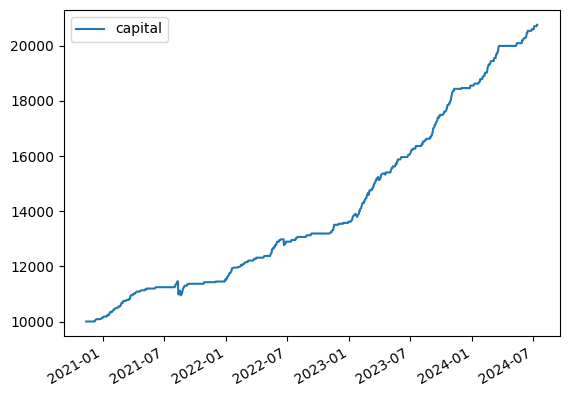

In [68]:
capital.rolling(5).sum().plot.line()
print(capital[-5:].sum())

### Debug optimal strategy with k=6 max trades per day

In [93]:
sim_params = SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=4, portfolio_optimization=False, stop_loss=0.8, take_profit=1.015, lower_entry=0.99)

res, capital_6trades = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=4, portfolio_optimization=False, stop_loss=0.8, take_profit=1.015, lower_entry=0.99)
 Count bids 3135 in total, avg.bids per day 3.570615034168565,  filled bids 1359, fill bids percent = 0.43349282296650715
  Stop loss events: count = 9, net loss = -1177.2194588077036 
  Take profit events: count = 1038, net profit = 20595.723632425186 
  Start capital = 10000, Resulting capital: 24537.96273147143 
  CAGR in 4 years: 1.252 or 25.16 % of avg. growth per year


In [94]:
# actual loss if wait till the end (0.848) vs. stop_loss (0.86) --> only a very slight defence
filter_stop_loss = (res.lower_entry==1) & (res.stop_loss==1)
print(f'Average real close price if not stop_loss: {res[filter_stop_loss].growth_future_5d.mean()}')
res[filter_stop_loss].head(10)

Average real close price if not stop_loss: 0.8659235300738499


,Adj Close,Ticker,Date,pred_xgp_rf_best,growth_future_5d,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return
632,1381.400024,STYLAMIND.NS,2021-08-05 00:00:00+00:00,0.668807,0.826951,1.027870,0.745620,0.963009,0.148807,0.455137,1063.598565,1,1,1,861.514837,-2.127197,859.387640
636,1372.400024,STYLAMIND.NS,2021-08-06 00:00:00+00:00,0.633692,0.797289,1.027397,0.750510,0.921743,0.113692,0.455216,987.518523,1,1,1,1012.206486,-1.975037,1010.231449
640,1297.099976,STYLAMIND.NS,2021-08-09 00:00:00+00:00,0.592545,0.843690,1.078213,0.794079,0.818904,0.072545,0.299782,712.890683,1,1,1,730.712950,-1.425781,729.287168
861,396.950012,RATEGAIN.NS,2021-12-22 00:00:00+00:00,0.662502,0.966117,1.035395,0.749213,0.947474,0.142502,0.543209,1507.703163,1,1,1,1221.239562,-3.015406,1218.224156
865,382.700012,RATEGAIN.NS,2021-12-23 00:00:00+00:00,0.627583,0.974262,1.073948,0.777110,0.944081,0.107583,0.465141,1135.854110,1,1,1,920.041829,-2.271708,917.770121
1031,63.799999,SHREDIGCEM.NS,2022-02-21 00:00:00+00:00,0.592168,1.023511,1.045455,0.738244,0.939655,0.072168,0.261471,721.500248,1,1,1,584.415201,-1.443000,582.972201
1669,130.009995,META,2022-10-21 00:00:00+00:00,0.542419,0.763018,1.064149,0.741328,0.958157,0.022419,0.203130,628.427344,1,1,1,644.138027,-1.256855,642.881173
1680,129.820007,META,2022-10-26 00:00:00+00:00,0.565320,0.697427,1.044138,0.713295,0.742413,0.045320,0.277980,952.792687,1,1,1,771.762076,-1.905585,769.856491
2851,148.050003,KOTHARIPET.NS,2024-02-08 00:00:00+00:00,0.550544,0.901047,1.012833,0.772036,0.934144,0.030544,0.210919,1028.877786,1,1,0,833.391007,-2.057756,831.333251


In [95]:
filter_take_profit = (res.lower_entry==1) & (res.take_profit==1) & (res.stop_loss==0)
print(f'Average real close price if not take_profit: {res[filter_take_profit].growth_future_5d.mean()}')
res[filter_take_profit].head(10)

Average real close price if not take_profit: 1.0008510866937135


,Adj Close,Ticker,Date,pred_xgp_rf_best,growth_future_5d,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return
3,307.075836,EIMCOELECO.NS,2020-11-06 00:00:00+00:00,0.633923,0.988717,1.025480,0.964257,0.970444,0.113923,0.270983,541.966359,1,0,1,555.515518,-1.083933,554.431585
4,470.463104,CAPLIPOINT.NS,2020-11-09 00:00:00+00:00,0.593333,1.027202,1.047904,0.930466,0.936630,0.073333,0.212613,425.225551,1,0,1,435.856190,-0.850451,435.005739
10,446.561493,CAPLIPOINT.NS,2020-11-10 00:00:00+00:00,0.578487,1.051740,1.098841,0.980268,0.980268,0.058487,0.247903,495.806185,1,0,1,508.201340,-0.991612,507.209728
40,205.967651,V,2020-11-19 00:00:00+00:00,0.621741,1.016525,1.038124,0.989524,0.989524,0.101741,0.313658,631.226057,1,0,1,647.006708,-1.262452,645.744256
44,87.109497,GOOG,2020-11-20 00:00:00+00:00,0.552960,1.010648,1.035478,0.985955,0.985955,0.032960,0.242234,486.836348,1,0,1,499.007257,-0.973673,498.033584
45,154.970001,AMZN,2020-11-20 00:00:00+00:00,0.553409,1.022146,1.037681,0.989049,0.989049,0.033409,0.245532,493.464417,1,0,1,505.801028,-0.986929,504.814099
49,13.026076,NVDA,2020-11-23 00:00:00+00:00,0.624485,1.019026,1.029665,0.989170,0.989170,0.104485,0.264010,531.030754,1,0,1,544.306523,-1.062062,543.244462
51,59.548477,MACPOWER.NS,2020-11-23 00:00:00+00:00,0.622699,1.038526,1.091548,0.959722,0.973157,0.102699,0.259496,521.951198,1,0,1,534.999978,-1.043902,533.956075
65,89.659500,GOOG,2020-11-27 00:00:00+00:00,0.610499,1.019407,1.030120,0.978703,0.978703,0.090499,0.299975,609.646941,1,0,1,624.888114,-1.219294,623.668820
66,13.146275,NVDA,2020-11-27 00:00:00+00:00,0.631093,1.025424,1.040105,0.986762,0.986762,0.111093,0.368238,748.379550,1,0,1,767.089038,-1.496759,765.592279


In [96]:
# predicted growth is -2..-3% negative on mean and median, realised growth is -1..-2% negative
filter_no_stop_loss_no_take_profit = (res.lower_entry==1) & (res.take_profit==0) & (res.stop_loss==0)
print(f'Average real close price if no take_profit or stop loss: {res[filter_no_stop_loss_no_take_profit].growth_future_5d.mean()}')
res['realised_profit'] = res.future_net_return/res.investment
res[filter_no_stop_loss_no_take_profit][['growth_future_5d','realised_profit']].describe().T

Average real close price if no take_profit or stop loss: 0.9727672203873166


,count,mean,std,min,25%,50%,75%,max
growth_future_5d,320.0,0.972767,0.031111,0.80106,0.957168,0.97656,0.994222,1.031675
realised_profit,320.0,0.980767,0.031111,0.80906,0.965168,0.98456,1.002222,1.039675


capital    24537.962731
dtype: float64


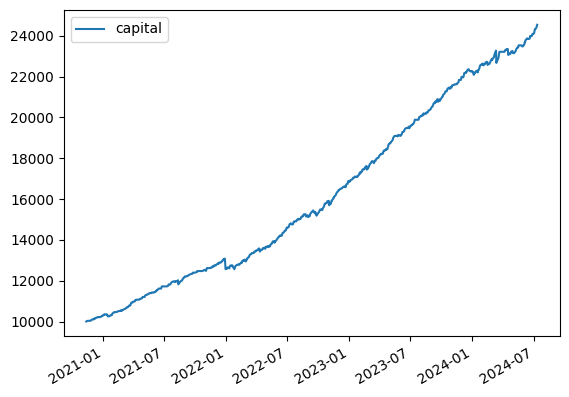

In [97]:
capital_6trades.rolling(5).sum().plot.line()
print(capital_6trades[-5:].sum())

### Debug optimal strategy with k=2 max trades per day

In [87]:
sim_params = SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=2, portfolio_optimization=False, stop_loss=0.78, take_profit=1.015, lower_entry=0.99)

res, capital_1_trade = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=2, portfolio_optimization=False, stop_loss=0.78, take_profit=1.015, lower_entry=0.99)
 Count bids 1691 in total, avg.bids per day 1.9259681093394077,  filled bids 735, fill bids percent = 0.43465405085748077
  Stop loss events: count = 6, net loss = -857.0067169733629 
  Take profit events: count = 580, net profit = 21640.145844783634 
  Start capital = 10000, Resulting capital: 25446.540043302924 
  CAGR in 4 years: 1.263 or 26.3 % of avg. growth per year


In [88]:
# NO STOP LOSS events
filter_stop_loss = (res.lower_entry==1) & (res.stop_loss==1)
print(f'Average real close price if not stop_loss: {res[filter_stop_loss].growth_future_5d.mean()}')
res[filter_stop_loss].head(10)

Average real close price if not stop_loss: 0.88092614703125


,Adj Close,Ticker,Date,pred_xgp_rf_best,growth_future_5d,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return
347,1381.400024,STYLAMIND.NS,2021-08-05 00:00:00+00:00,0.668807,0.826951,1.027870,0.745620,0.963009,0.148807,0.690362,1618.213445,1,1,1,1658.668781,-3.236427,1655.432354
349,1372.400024,STYLAMIND.NS,2021-08-06 00:00:00+00:00,0.633692,0.797289,1.027397,0.750510,0.921743,0.113692,0.633608,1365.443362,1,1,1,1078.700256,-2.730887,1075.969369
480,396.950012,RATEGAIN.NS,2021-12-22 00:00:00+00:00,0.662502,0.966117,1.035395,0.749213,0.947474,0.142502,0.714085,2010.425536,1,1,1,2060.686174,-4.020851,2056.665323
482,382.700012,RATEGAIN.NS,2021-12-23 00:00:00+00:00,0.627583,0.974262,1.073948,0.777110,0.944081,0.107583,0.641571,1779.850395,1,1,1,1406.081812,-3.559701,1402.522111
566,63.799999,SHREDIGCEM.NS,2022-02-21 00:00:00+00:00,0.592168,1.023511,1.045455,0.738244,0.939655,0.072168,0.497969,1438.434643,1,1,1,1136.363368,-2.876869,1133.486499
905,129.820007,META,2022-10-26 00:00:00+00:00,0.565320,0.697427,1.044138,0.713295,0.742413,0.045320,0.360571,1360.217699,1,1,1,1394.223141,-2.720435,1391.502706


In [89]:
# actual growth of 0.4% if no take profit vs. take_profit 1.5% (+1% from lower entry)
filter_take_profit = (res.lower_entry==1) & (res.take_profit==1) & (res.stop_loss==0)
print(f'Average real close price if not take_profit: {res[filter_take_profit].growth_future_5d.mean()}')
res[filter_take_profit].head(5)

Average real close price if not take_profit: 1.001845454400836


,Adj Close,Ticker,Date,pred_xgp_rf_best,growth_future_5d,Ratio_MaxHighNext5_to_AdjClose,Ratio_MinLowNext5_to_AdjClose,Ratio_MinLowNext1_to_AdjClose,weight,weight_norm,investment,lower_entry,stop_loss,take_profit,future_gross_return,fees,future_net_return
1,307.075836,EIMCOELECO.NS,2020-11-06 00:00:00+00:00,0.633923,0.988717,1.025480,0.964257,0.970444,0.113923,0.503586,1007.172178,1,0,1,1032.351482,-2.014344,1030.337138
5,446.561493,CAPLIPOINT.NS,2020-11-10 00:00:00+00:00,0.578487,1.051740,1.098841,0.980268,0.980268,0.058487,0.467554,935.107497,1,0,1,958.485185,-1.870215,956.614970
20,205.967651,V,2020-11-19 00:00:00+00:00,0.621741,1.016525,1.038124,0.989524,0.989524,0.101741,0.552800,1118.405777,1,0,1,1146.365922,-2.236812,1144.129110
22,154.970001,AMZN,2020-11-20 00:00:00+00:00,0.553409,1.022146,1.037681,0.989049,0.989049,0.033409,0.450607,901.213344,1,0,1,923.743678,-1.802427,921.941251
24,13.026076,NVDA,2020-11-23 00:00:00+00:00,0.624485,1.019026,1.029665,0.989170,0.989170,0.104485,0.504311,1019.469171,1,0,1,1044.955900,-2.038938,1042.916962


In [90]:
# predicted growth is -2..-3% negative on mean and median, realised growth is -1..-2% negative
filter_no_stop_loss_no_take_profit = (res.lower_entry==1) & (res.take_profit==0) & (res.stop_loss==0)
print(f'Average real close price if no take_profit or stop loss: {res[filter_no_stop_loss_no_take_profit].growth_future_5d.mean()}')
res['realised_profit'] = res.future_net_return/res.investment
res[filter_no_stop_loss_no_take_profit][['growth_future_5d','realised_profit']].describe().T

Average real close price if no take_profit or stop loss: 0.9696724382000861


,count,mean,std,min,25%,50%,75%,max
growth_future_5d,155.0,0.969672,0.032829,0.80106,0.951441,0.974254,0.992404,1.027882
realised_profit,155.0,0.977672,0.032829,0.80906,0.959441,0.982254,1.000404,1.035882


capital    25446.540043
dtype: float64


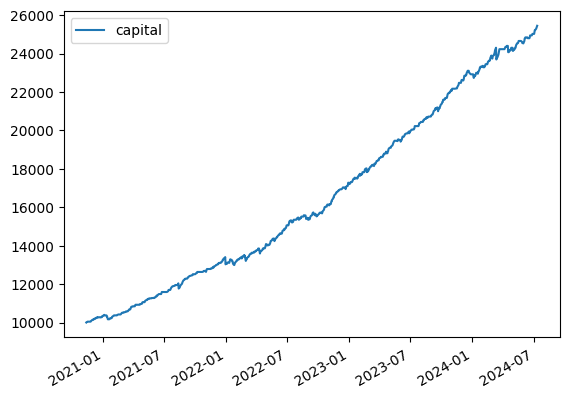

In [91]:
capital_1_trade.rolling(5).sum().plot.line()
print(capital_1_trade[-5:].sum())

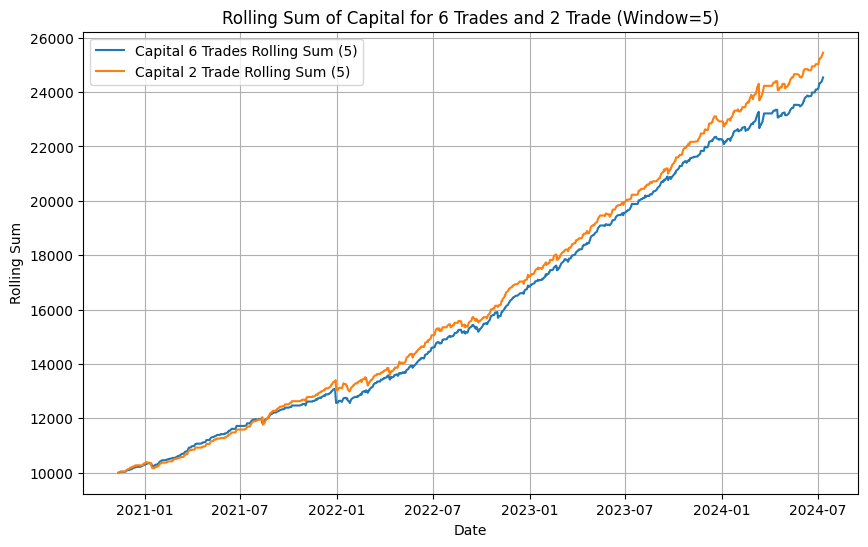

Capital 6 Trades Ending Sum: capital    24537.962731
dtype: float64
Capital 1 Trade Ending Sum: capital    25446.540043
dtype: float64


In [100]:
import matplotlib.pyplot as plt

# Assuming capital_6trades and capital_1_trade are defined and have the same index
capital_6trades_rolling = capital_6trades.rolling(5).sum()
capital_1_trade_rolling = capital_1_trade.rolling(5).sum()

# Plot the rolling sums on the same graph
plt.figure(figsize=(10, 6))
plt.plot(capital_6trades_rolling, label='Capital 6 Trades Rolling Sum (5)')
plt.plot(capital_1_trade_rolling, label='Capital 2 Trade Rolling Sum (5)')
plt.legend(loc='best')
plt.title('Rolling Sum of Capital for 6 Trades and 2 Trade (Window=5)')
plt.xlabel('Date')
plt.ylabel('Rolling Sum')
plt.grid(True)
plt.show()

# Print the ending values
print(f"Capital 6 Trades Ending Sum: {capital_6trades[-5:].sum()}")
print(f"Capital 1 Trade Ending Sum: {capital_1_trade[-5:].sum()}")